# Individual Assigment - Banking Lending and Analytics

### Sebastian Rodriguez - 24629709
### UTS - Spring 2023

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams.update({'font.size': 16})

In [3]:
from dcr import *
df = pd.read_csv('dcr.csv', low_memory=False)

## Data preparation

In [4]:
df.head()

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0   4    25         -2          25       119       NaN      61031.10   
1   4    26         -2          25       119       NaN      60882.42   
2   4    27         -2          25       119       NaN      60729.80   
3   4    28         -2          25       119       NaN      60576.14   
4   4    29         -2          25       119       NaN      60424.39   

    LTV_time  interest_rate_time  rate_time  ...  FICO_orig_time  \
0  33.911009              10.500        5.9  ...             587   
1  34.007232              10.500        5.9  ...             587   
2  34.335349              10.500        5.9  ...             587   
3  34.672545              10.875        5.9  ...             587   
4  34.951639              10.875        5.9  ...             587   

   LTV_orig_time  Interest_Rate_orig_time  state_orig_time  hpi_orig_time  \
0           81.8                     10.5               KY          97.99   
1           81.8                     10.5               KY          97.99   
2           81.8                     10.5               KY          97.99   
3           81.8                     10.5               KY          97.99   
4           81.8                     10.5               KY          97.99   

   default_time  payoff_time  status_time  lgd_time  recovery_res  
0             0            0            0       NaN           NaN  
1             0            0            0       NaN           NaN  
2             0            0            0       NaN           NaN  
3             0            0            0       NaN           NaN  
4             0            0            0       NaN           NaN  

[5 rows x 28 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62178 entries, 0 to 62177
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62178 non-null  int64  
 1   time                     62178 non-null  int64  
 2   orig_time                62178 non-null  int64  
 3   first_time               62178 non-null  int64  
 4   mat_time                 62178 non-null  int64  
 5   res_time                 1160 non-null   float64
 6   balance_time             62178 non-null  float64
 7   LTV_time                 62153 non-null  float64
 8   interest_rate_time       62178 non-null  float64
 9   rate_time                62178 non-null  float64
 10  hpi_time                 62178 non-null  float64
 11  gdp_time                 62178 non-null  float64
 12  uer_time                 62178 non-null  float64
 13  REtype_CO_orig_time      62178 non-null  int64  
 14  REtype_PU_orig_time   

### Creating new features

1) Define a be created to assigned Q 1 to 4 into year 2001, values 5 to 8 to years 2002 and so on.

2) Finally, a new column call time_year will be created.

In [6]:
# Define a function to map 'time' values to 'time_year'

def time_to_year(time):
    return 2001 + (time - 1) // 4

# Create a new funtion call time_year

df.loc[:,'time_year'] = df['time'].apply(time_to_year)

In [7]:
df.query('time ==60')

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
34         4    60         -2          25       119       NaN      52686.35   
52     20442    60         59          59       177       NaN     609509.45   
54     20443    60         59          59       177       NaN     627841.96   
56     20444    60         59          59       177       NaN     311520.28   
58     20445    60         59          59       177       NaN     623212.14   
...      ...   ...        ...         ...       ...       ...           ...   
62136  49946    60         26          52       146       NaN     107209.45   
62145  49949    60         25          52       146       NaN      50520.57   
62154  49952    60         26          52       146       NaN      42782.26   
62163  49956    60         26          52       147       NaN      77290.92   
62172  49971    60         25          52       145       NaN      35763.49   

         LTV_time  interest_rate_time  rate_time  ...  LTV_orig_time  \
34      34.898842              10.500       5.90  ...           81.8   
52      78.252157               4.625       2.17  ...           80.0   
54      73.451425               4.500       2.17  ...           75.0   
56      35.479149               4.500       2.17  ...           80.0   
58      78.482503               4.750       2.17  ...           80.0   
...           ...                 ...        ...  ...            ...   
62136   92.799583               2.000       4.64  ...           85.0   
62145  105.661502               5.500       5.15  ...           90.0   
62154   22.058167               1.998       4.64  ...           85.0   
62163   89.859052               9.980       4.64  ...           80.0   
62172   77.517650               7.750       5.15  ...           75.0   

       Interest_Rate_orig_time  state_orig_time  hpi_orig_time  default_time  \
34                      10.500               CO          97.99             0   
52                       4.625               CA         187.65             0   
54                       4.500               AL         187.65             0   
56                       4.500               NJ         187.65             0   
58                       4.750               CA         187.65             0   
...                        ...              ...            ...           ...   
62136                    2.000               PA         225.10             0   
62145                    5.500               VA         226.29             0   
62154                    1.998               AZ         225.10             0   
62163                    9.980               GA         225.10             0   
62172                    7.750               OK         226.29             0   

       payoff_time  status_time  lgd_time  recovery_res  time_year  
34               0            0       NaN           NaN       2015  
52               0            0       NaN           NaN       2015  
54               0            0       NaN           NaN       2015  
56               0            0       NaN           NaN       2015  
58               0            0       NaN           NaN       2015  
...            ...          ...       ...           ...        ...  
62136            0            0       NaN           NaN       2015  
62145            0            0       NaN           NaN       2015  
62154            0            0       NaN           NaN       2015  
62163            0            0       NaN           NaN       2015  
62172            0            0       NaN           NaN       2015  

[829 rows x 29 columns]

In [8]:
df = df.rename(columns = {'state_orig_time': 'State'})

In [9]:
df.head()

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0   4    25         -2          25       119       NaN      61031.10   
1   4    26         -2          25       119       NaN      60882.42   
2   4    27         -2          25       119       NaN      60729.80   
3   4    28         -2          25       119       NaN      60576.14   
4   4    29         -2          25       119       NaN      60424.39   

    LTV_time  interest_rate_time  rate_time  ...  LTV_orig_time  \
0  33.911009              10.500        5.9  ...           81.8   
1  34.007232              10.500        5.9  ...           81.8   
2  34.335349              10.500        5.9  ...           81.8   
3  34.672545              10.875        5.9  ...           81.8   
4  34.951639              10.875        5.9  ...           81.8   

   Interest_Rate_orig_time  State  hpi_orig_time  default_time  payoff_time  \
0                     10.5     KY          97.99             0            0   
1                     10.5     KY          97.99             0            0   
2                     10.5     KY          97.99             0            0   
3                     10.5     KY          97.99             0            0   
4                     10.5     KY          97.99             0            0   

   status_time  lgd_time  recovery_res  time_year  
0            0       NaN           NaN       2007  
1            0       NaN           NaN       2007  
2            0       NaN           NaN       2007  
3            0       NaN           NaN       2007  
4            0       NaN           NaN       2008  

[5 rows x 29 columns]

## 1. Importing U.S Median Income data

In [10]:
df_income = pd.read_csv('US_Income.csv', low_memory=False)

In [11]:
df_income.sample(5)

State  Time2  Medium Income  Income Growth
647     Tennessee   2003          37520          0.013
554          Ohio   2015          53300          0.074
201         Idaho   2007          49180          0.064
41         Alaska   2012          63650          0.108
533  North Dakota   2009          50080          0.009

In [12]:
#Replace State name for a two-letter abbreviation

state_abbreviation = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'American Samoa': 'AS',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands': 'MP', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Trust Territories': 'TT', 'Utah': 'UT',
    'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'}

In [13]:
df_income['State'] = df_income['State'].replace(state_abbreviation)

In [14]:
df_income.sample(5)

State  Time2  Medium Income  Income Growth
111    CT   2007          64140          0.028
642    SD   2013          54450          0.102
56     AZ   2012          47040         -0.032
275    KY   2006          39490          0.076
340    MA   2011          63310          0.039

In [15]:
df_income = df_income.rename(columns = {'Time2': 'time_year'})
df_income = df_income.rename(columns = {'Income Growth': 'Income_Growth'})

In [16]:
df_income.sample(5)

State  time_year  Medium Income  Income_Growth
415    MT       2011          40280         -0.024
723    WA       2004          49920          0.051
313    ME       2014          51710          0.032
719    VA       2015          61490         -0.071
152    FL       2003          38970          0.025

### 1-B 

Describe the data using the describe method in pandas and plot the time series using matplotlib. Interpret all outputs economically.


Now that we have imported the Income dataset, lets proceed explore and provide some insights

In [17]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          780 non-null    object 
 1   time_year      780 non-null    int64  
 2   Medium Income  780 non-null    int64  
 3   Income_Growth  780 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 24.5+ KB


In [18]:
# Data describe
df_income.describe().round(2)

time_year  Medium Income  Income_Growth
count     780.00         780.00         780.00
mean     2008.00       49055.55           0.02
std         4.32        8642.44           0.05
min      2001.00       29360.00          -0.14
25%      2004.00       42587.50          -0.01
50%      2008.00       48140.00           0.02
75%      2012.00       54817.50           0.06
max      2015.00       76170.00           0.18

The average medium income in U.S is $49.055 with a average growth rate of 2 % per year from 2001 to 2015.

In [19]:
# Lets see the U.S medium income by year
US_income = df_income.query("State =='U.S'")

US_income

State  time_year  Medium Income  Income_Growth
0    U.S       2001          42230          0.006
1    U.S       2002          42410          0.004
2    U.S       2003          43320          0.021
3    U.S       2004          44330          0.023
4    U.S       2005          46330          0.045
..   ...        ...            ...            ...
10   U.S       2011          50050          0.016
11   U.S       2012          51020          0.019
12   U.S       2013          51940          0.018
13   U.S       2014          53660          0.033
14   U.S       2015          56520          0.053

[15 rows x 4 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

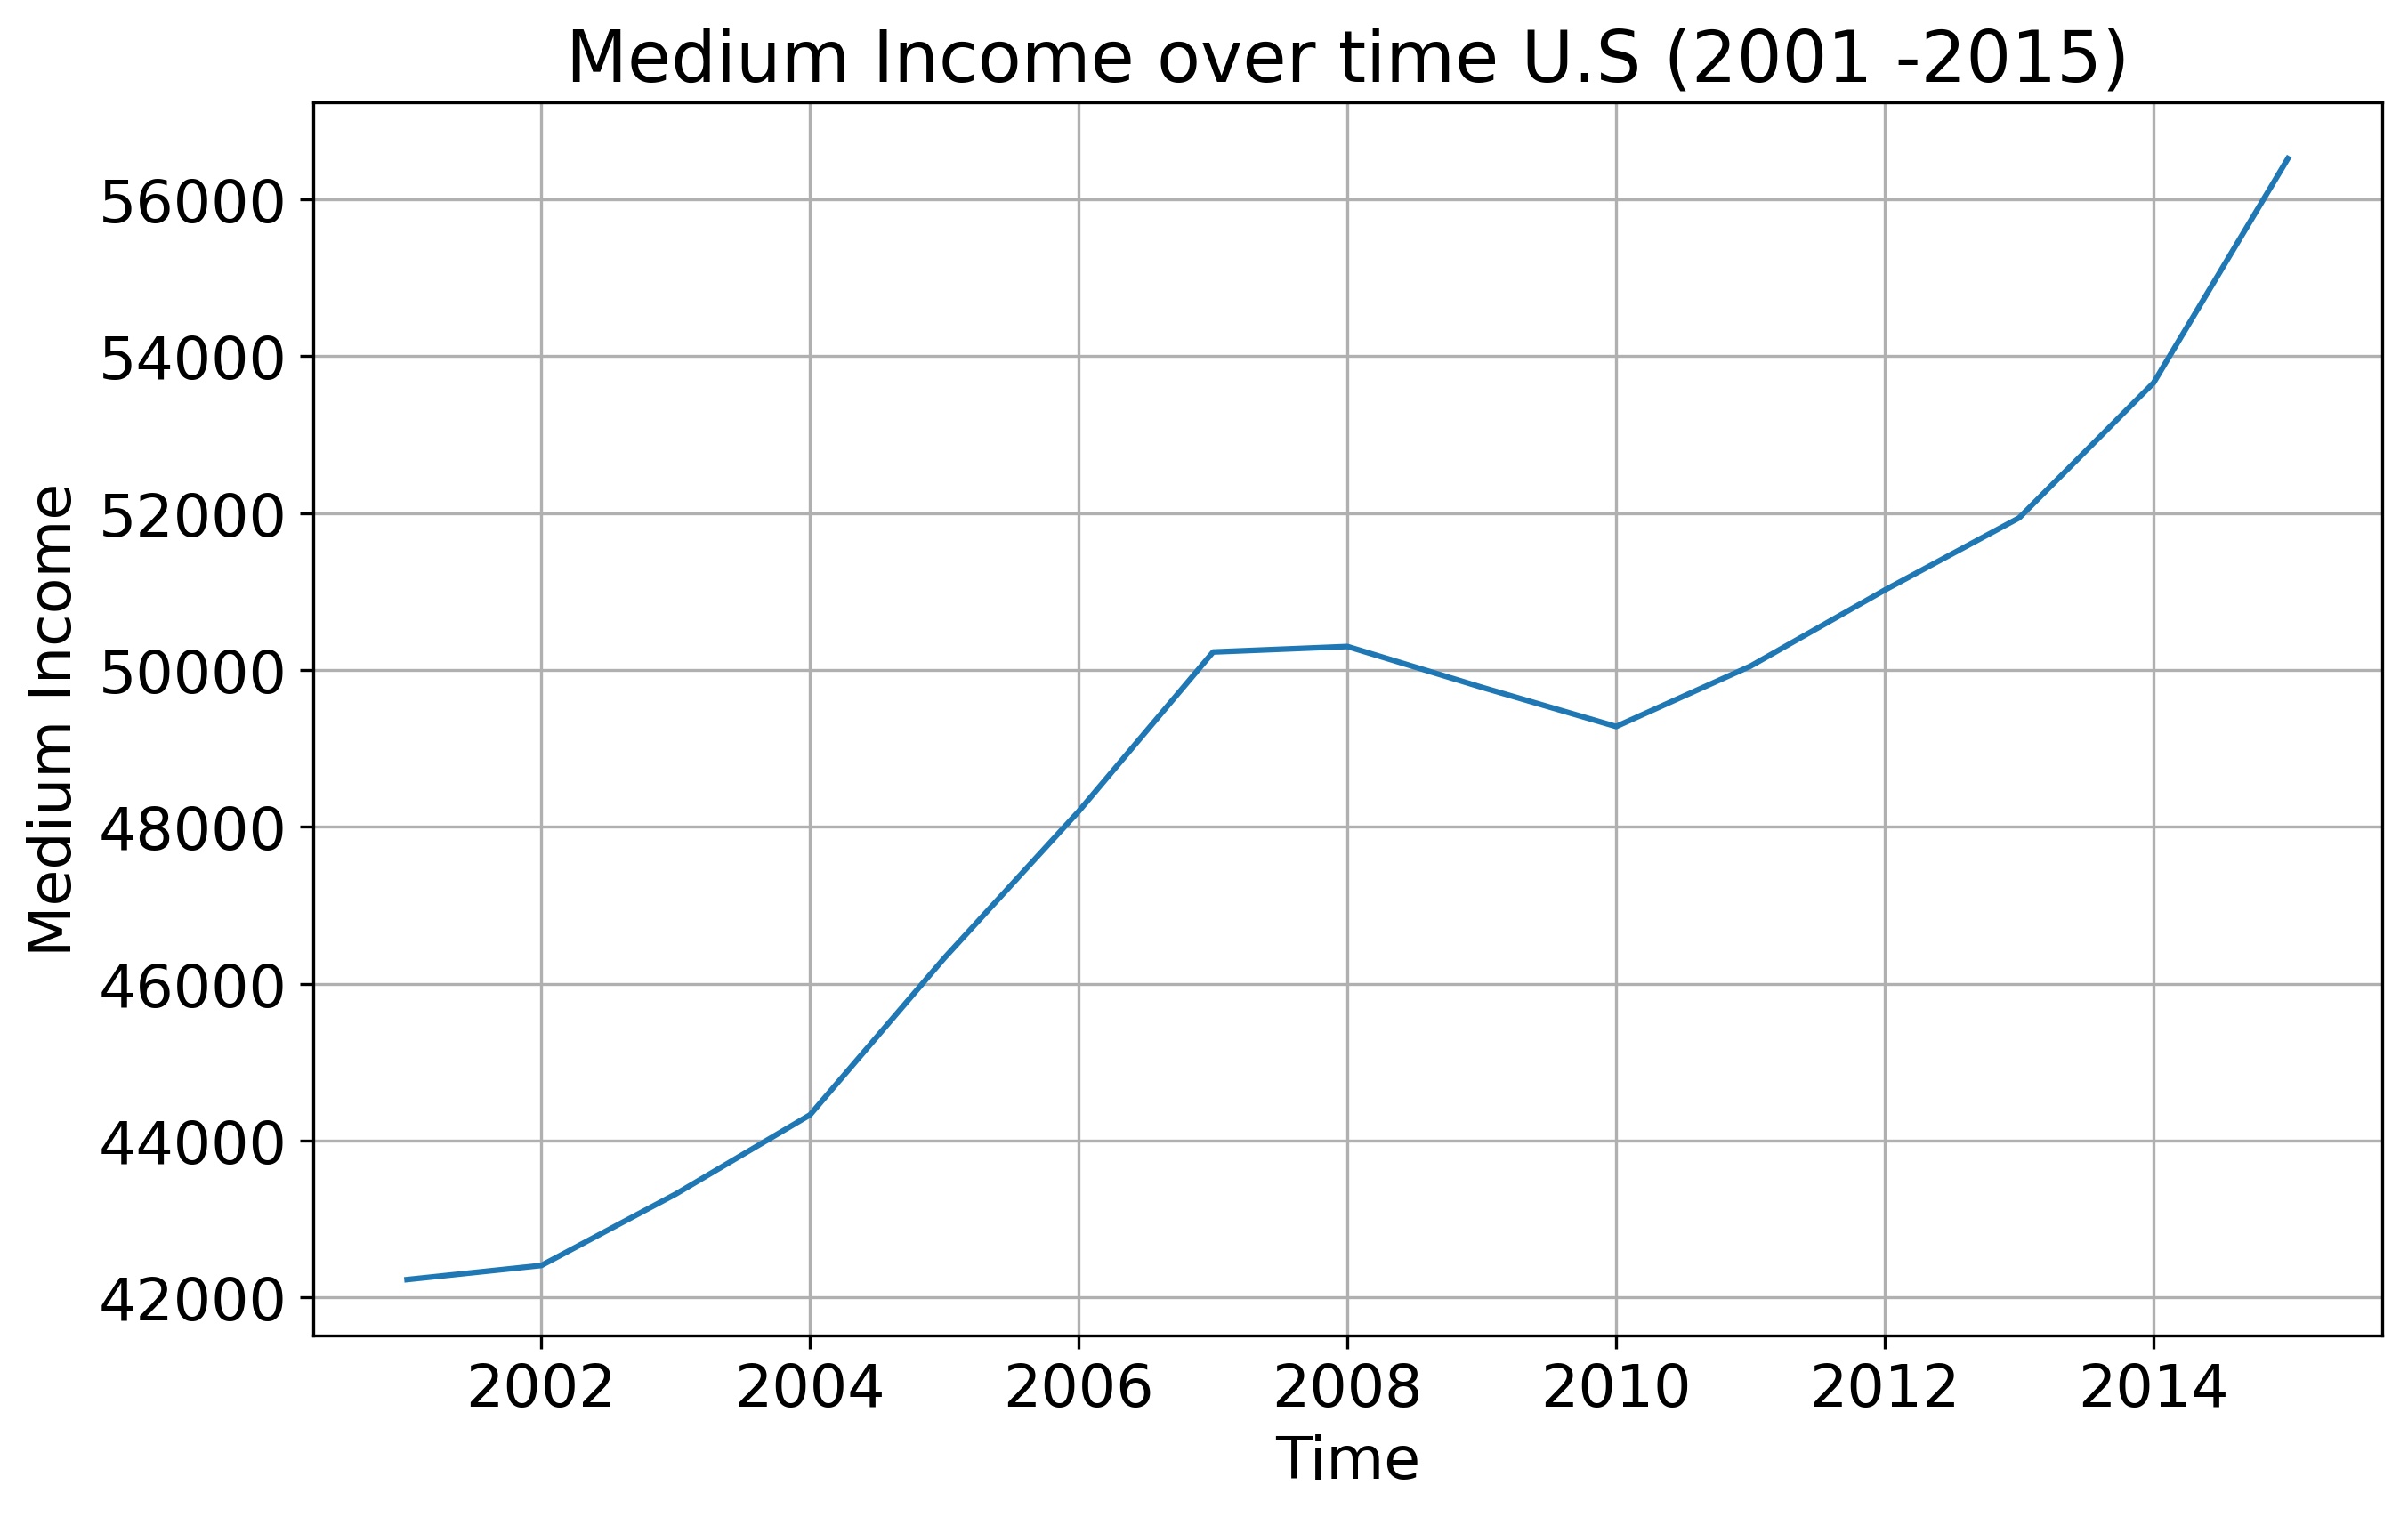

In [20]:
# Now we plot the Medium Income in U.S by time

plt.figure(figsize=(10, 6))
plt.plot('time_year', 'Medium Income', data=US_income) 
plt.title("Medium Income over time U.S (2001 -2015)")
plt.xlabel('Time')
plt.ylabel('Medium Income')
plt.grid(True)
plt.show

These time series show the medium income average in the U.S. from 2001 to 2015. Overall, we can observe an uptrend in the medium income, which has gone from $42,230 to $56,520 in a 15-year period. Also, we can observe the impact of the great economic crisis (2008-2010) on the U.S. economy and the medium income.

In a broad context, an uptrend in the medium income for a country like the U.S. is a sign of economic stability and confidence, which can be seen in a higher borrowing capacity and a reduction of credit risk. This leads to lower interest rates making borrowing more affordable and attractive. Ultimately, an uptrend medium income can bring along an increase in profits from loan interest for financial institutions.

### Analyze information by region

### West States

In [21]:
# create a list of the states in the west regions of U.S
west_states = ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

#Create a new df that contains income data of all the states in West states list
West_data = df_income[df_income['State'].isin(west_states)]

#Finally, lets calculate the average income for the west region

West_income = West_data.groupby('time_year')['Medium Income'].mean().reset_index(drop=False)

West_income['State'] = 'West'


### Midwest States

In [22]:
# create a list of the states in the Midwest regions of U.S
midwest_states = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']

#Create a new df that contains income data of all the states in Midwest states list
Midwest_data = df_income[df_income['State'].isin(midwest_states)]

#Finally, lets calculate the average income for the Midwest region

Midwest_income = Midwest_data.groupby('time_year')['Medium Income'].mean().reset_index(drop=False)

Midwest_income['State'] = 'Midwest'


### Northeast States

In [23]:
# create a list of the states in the Northeast regions of U.S
northeast_states = ['CT', 'DE', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT', 'DC']

#Create a new df that contains income data of all the states in Northeast states list
northeast_data = df_income[df_income['State'].isin(northeast_states)]

#Finally, lets calculate the average income for the Northeast region

northeast_income = northeast_data.groupby('time_year')['Medium Income'].mean().reset_index(drop=False)

northeast_income['State'] = 'Northeast'


### South States

In [24]:
# create a list of the states in the South regions of U.S
south_states = ['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']

#Create a new df that contains income data of all the states in South states list
south_data = df_income[df_income['State'].isin(south_states)]

#Finally, lets calculate the average income for the South region

south_income = south_data.groupby('time_year')['Medium Income'].mean().reset_index(drop=False)

south_income['State'] = 'South'

south_income

time_year  Medium Income  State
0        2001   36962.857143  South
1        2002   37111.428571  South
2        2003   37845.714286  South
3        2004   38746.428571  South
4        2005   39905.714286  South
..        ...            ...    ...
10       2011   44721.428571  South
11       2012   45068.571429  South
12       2013   45099.285714  South
13       2014   46131.428571  South
14       2015   47686.428571  South

[15 rows x 3 columns]

In [25]:
# lets combine data from the data sets into a single df

regions = [US_income, south_income, northeast_income, Midwest_income, West_income]

combined_df = pd.concat(regions)


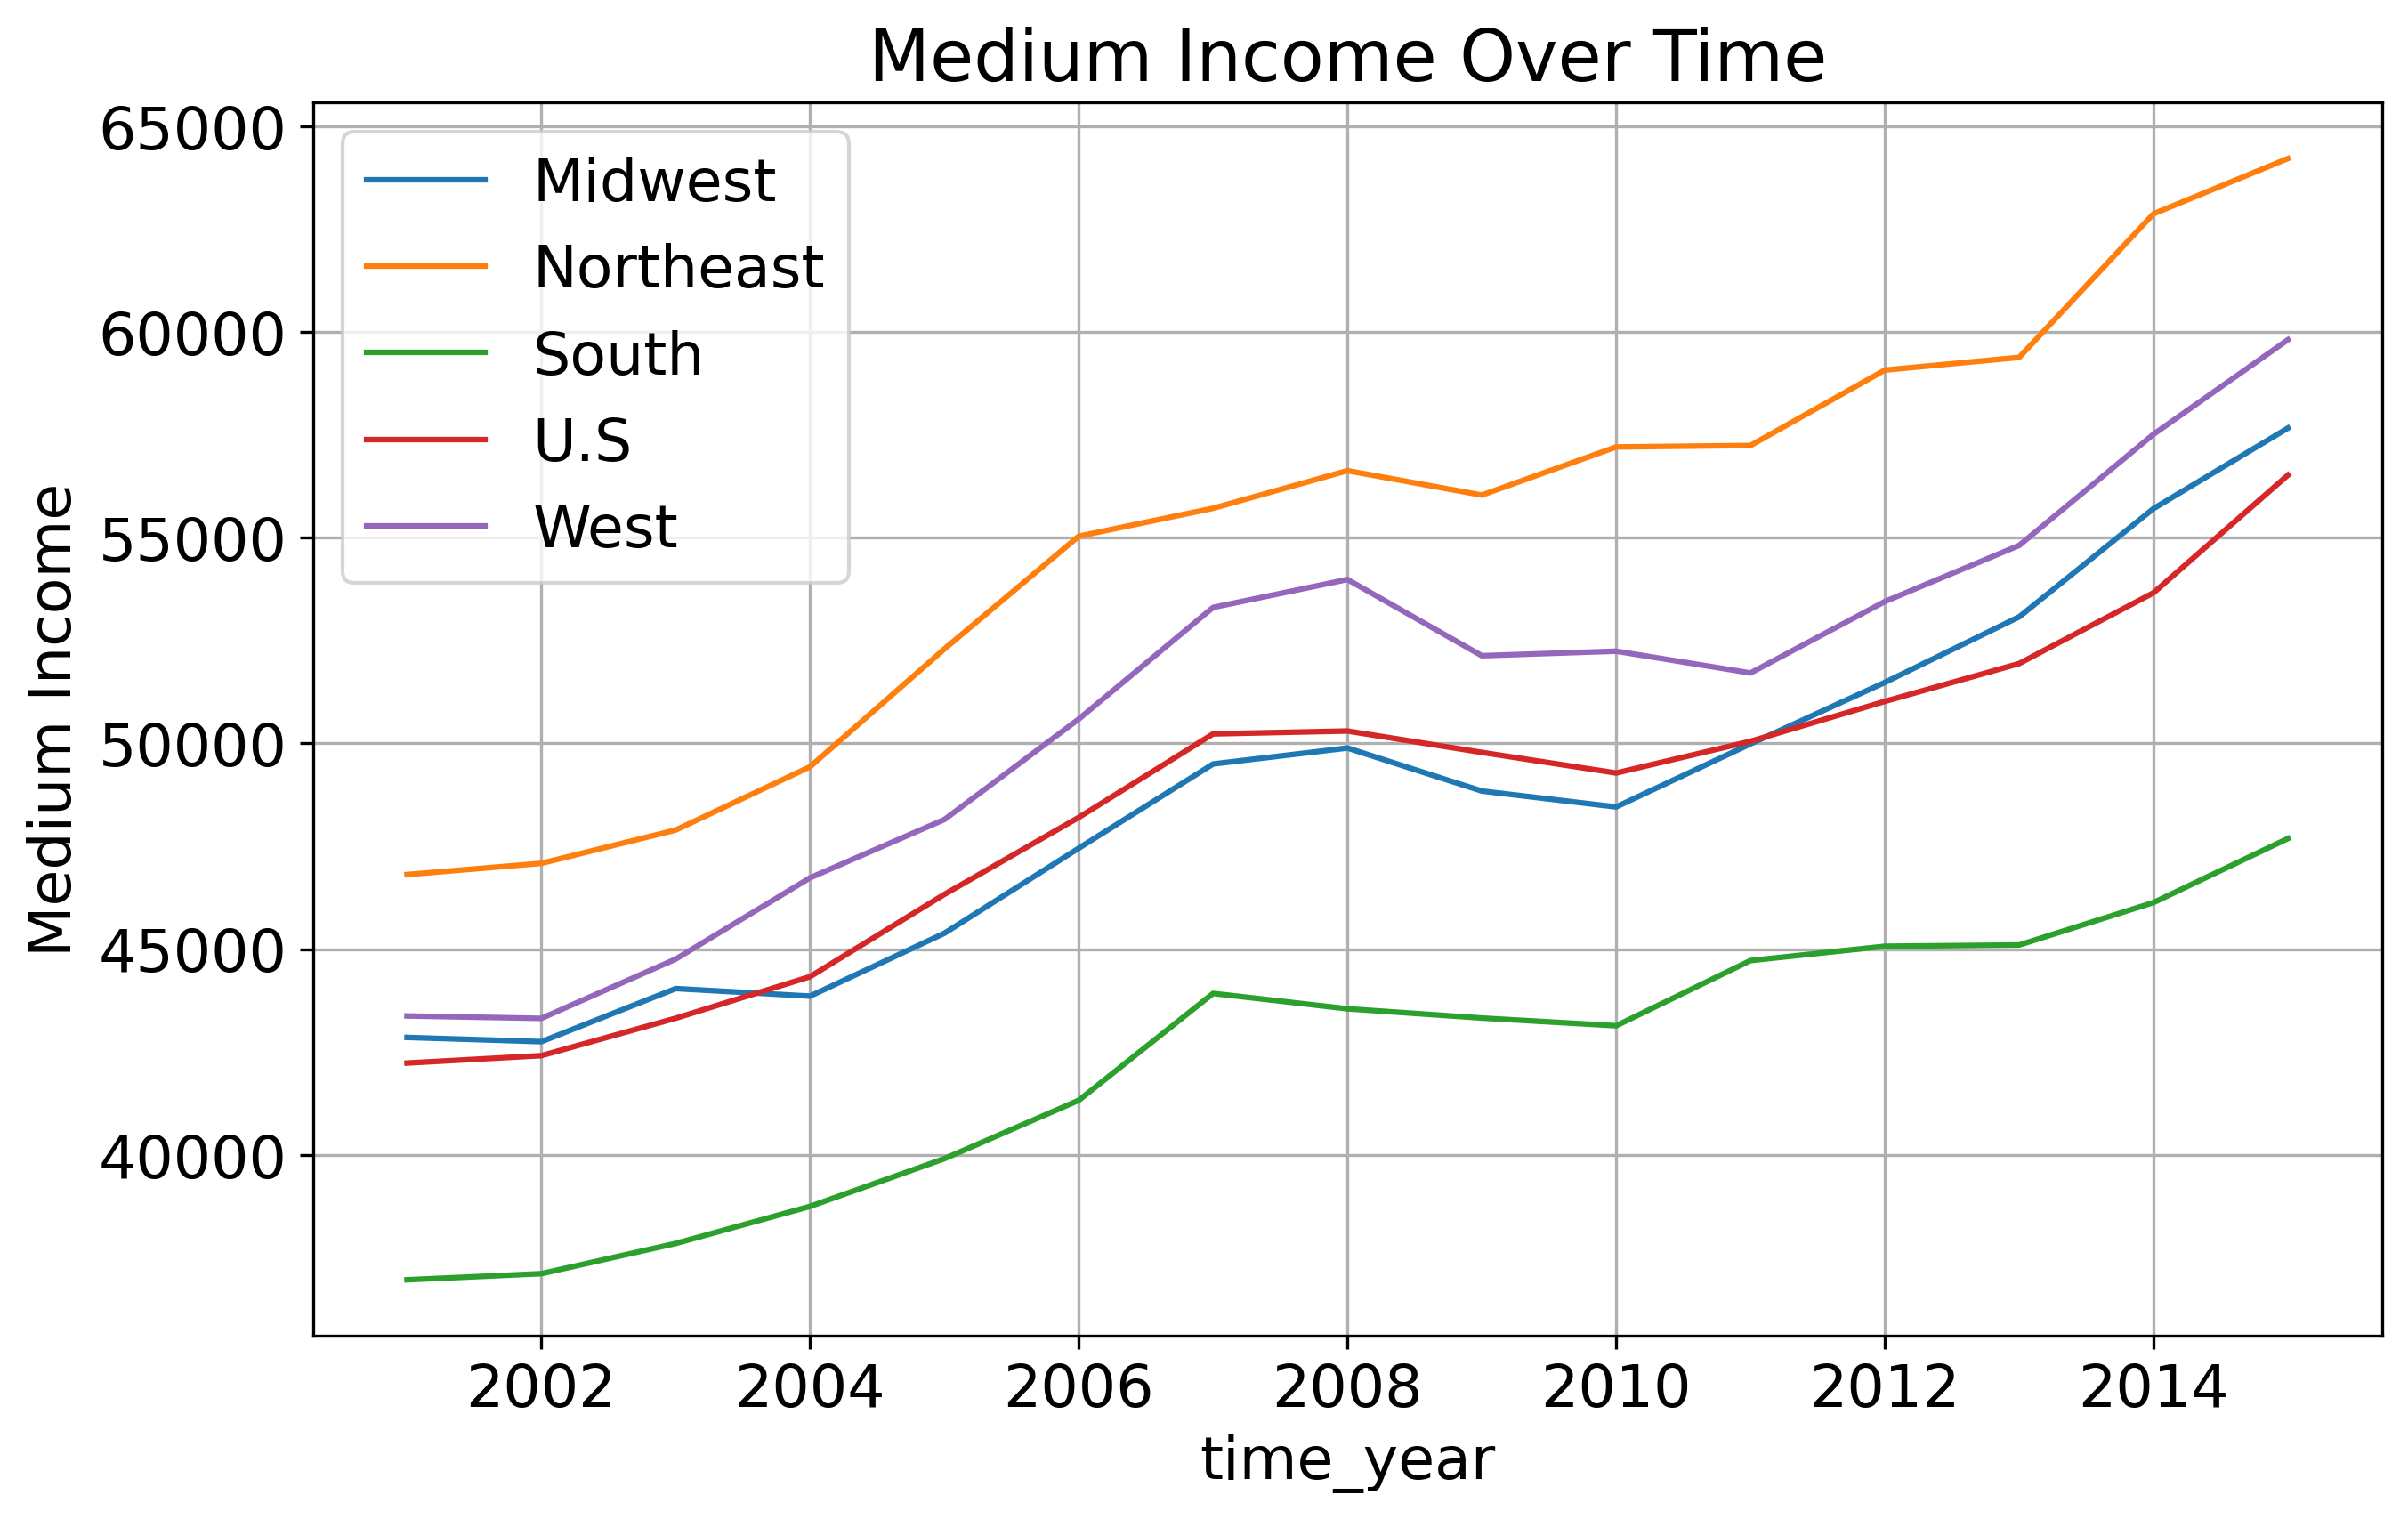

In [26]:
plt.figure(figsize=(10, 6))  

# Group the data by the region and year, and calculate the mean
grouped = combined_df.groupby(['State', 'time_year'])['Medium Income'].mean()

# Plot the time series for each region
for region, data in grouped.groupby(level=0):
    plt.plot(data.index.get_level_values('time_year'), data.values, label=region)

plt.title('Medium Income Over Time')
plt.xlabel('time_year')
plt.ylabel('Medium Income')
plt.legend()
plt.grid(True)

plt.show()


On the other hand, I have decided to quickly compare the medium income across the different regions of the U.S. (west, Midwest, Northeast and south) against the medium average of the county (on red).  This plot groups the stats by region and provides an overview of the medium income for the different regions in America. Surprisingly we found that the southern region has the lowest medium income, whereas the Northeast has the highest medium income of the country. This information provides value for financial institutions in the decision-making process of evaluating credit risk in the country.

### 1-C Merging dcr and income dataset

The two dataset would be merge by 'State' and 'Time'. The income dataset was previously preprocessed in Excel and the income growth was calculated using the percentage change  formula:

(( V2 - V1 ) /V1) × 100




In [27]:
#Merge dcr and income dataset by 'time' and 'state'

mergedData = pd.merge(df, df_income, on=['State', 'time_year'])

print ("DONE")

DONE


In [28]:
#Drop 'Medium Income'

mergedData = mergedData.drop('Medium Income', axis=1)

In [29]:
mergedData.sample(10)

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
9814   17837    40          9          24       109       NaN      89552.47   
10183  44944    40         26          28       146       NaN     243171.67   
50100  40147    42         17          24       138       NaN      76666.83   
38037   3027    44         22          24       142       NaN      73328.16   
6938   36029    26         23          25       143       NaN      88574.40   
6048    9982    54         28          30       109       NaN     630300.00   
25073  31103    42         22          25       143       NaN     440248.92   
15832  39454    27         20          22       140       NaN    1471692.16   
60776  45374    38         31          31       148       NaN     151026.85   
41021  33083    47         21          30       141       NaN      83386.13   

         LTV_time  interest_rate_time  rate_time  ...  \
9814    62.384421               9.000       4.86  ...   
10183  106.254125               3.750       4.64  ...   
50100   68.362050               2.500       4.62  ...   
38037  124.079803               9.600       4.34  ...   
6938    68.755252               8.550       4.39  ...   
6048    97.647386               6.125       4.65  ...   
25073  100.979566               5.250       4.34  ...   
15832   50.710444               5.625       4.50  ...   
60776   74.013500               6.400       4.04  ...   
41021  101.245965               3.000       3.94  ...   

       Interest_Rate_orig_time  State  hpi_orig_time  default_time  \
9814                     9.000     FL         132.76             0   
10183                    6.500     FL         225.10             0   
50100                    5.375     NM         179.45             0   
38037                    9.600     TX         216.77             0   
6938                     8.550     TX         221.91             0   
6048                     6.125     FL         219.67             0   
25073                    5.250     CA         216.77             0   
15832                    5.625     CA         199.21             0   
60776                    6.400     DC         200.67             0   
41021                    6.500     VA         208.86             0   

       payoff_time  status_time  lgd_time  recovery_res  time_year  \
9814             0            0       NaN           NaN       2010   
10183            0            0       NaN           NaN       2010   
50100            0            0       NaN           NaN       2011   
38037            0            0       NaN           NaN       2011   
6938             0            0       NaN           NaN       2007   
6048             0            0       NaN           NaN       2014   
25073            0            0       NaN           NaN       2011   
15832            0            0       NaN           NaN       2007   
60776            0            0       NaN           NaN       2010   
41021            0            0       NaN           NaN       2012   

       Income_Growth  
9814          -0.034  
10183         -0.034  
50100         -0.070  
38037          0.038  
6938           0.063  
6048          -0.037  
25073         -0.017  
15832          0.007  
60776          0.071  
41021          0.032  

[10 rows x 30 columns]

In [30]:
#Here we are calculatint the mean Income growth percentage by time period
incomegrowth = mergedData.groupby('time')['Income_Growth'].mean().reset_index(drop=False)

incomegrowth

time  Income_Growth
0      1       0.030611
1      2       0.011755
2      3       0.004511
3      4       0.004444
4      5       0.000055
..   ...            ...
55    56       0.029267
56    57       0.051322
57    58       0.051124
58    59       0.051471
59    60       0.051376

[60 rows x 2 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

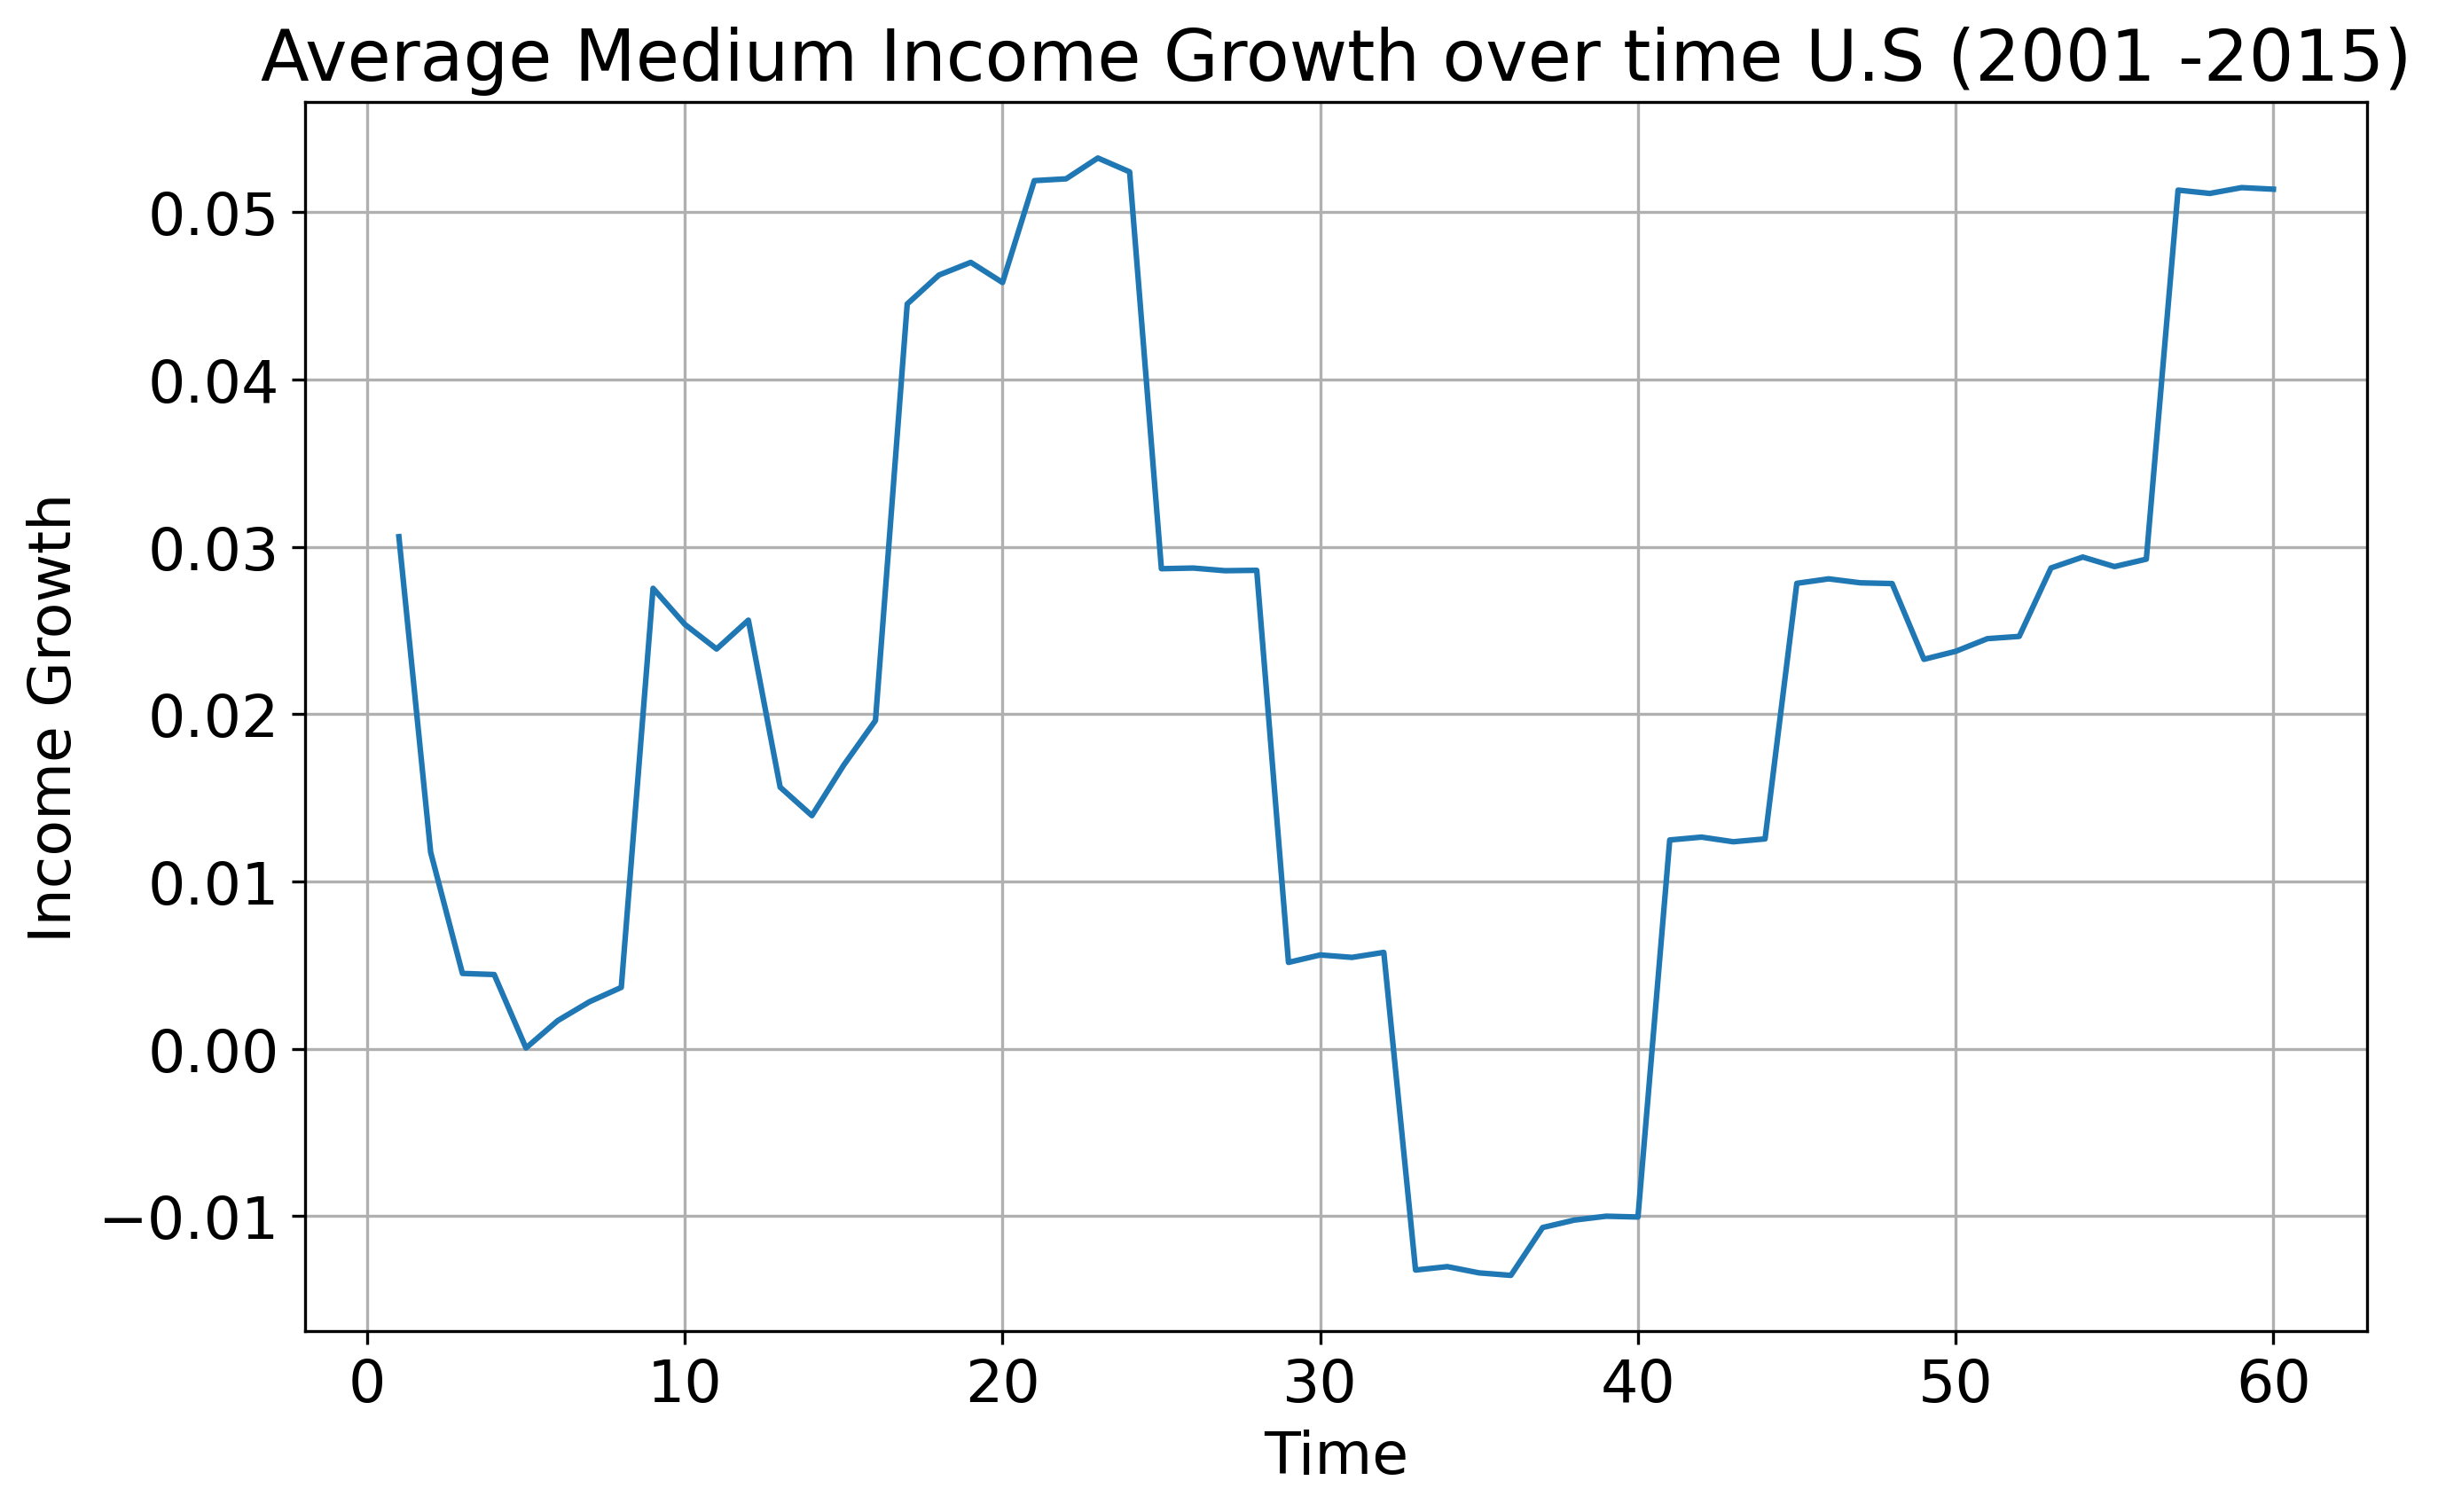

In [31]:
# Now we plot the average income growth percentage for analysis

plt.figure(figsize=(10, 6))
plt.plot('time', 'Income_Growth', data=incomegrowth) 
plt.title("Average Medium Income Growth over time U.S (2001 -2015)")
plt.xlabel('Time')
plt.ylabel('Income Growth')
plt.grid(True)
plt.show

This plot illustrates the average medium income growth in the U.S. over a period of 60 quarters (15 years). In the context of mortgages, understanding the relationship between income growth and its impact on borrowers' spending is crucial. Ultimately, it is essential for financial institutions to accurately comprehend borrowers' income behavior in order to effectively assess credit risk. The main difference in the growth rate are associated with economic events, such as the great crisis between 30 - 40 quarter (2008 - 2010).

## 2. Probability of Default (PD) modelling

### 2-A 

A.	Estimate a basic credit risk model for mortgage default probabilities (PD). You may choose a logit or a probit model). Include two standard explanatory variables which are FICO and LTV at origination. Do not include further variables. Compute the estimated PD for all mortgage loans and periods. Plot the average probability of default by time in a chart. Provide your code, output for the model and interpret the output.

In this first PD model, we will exclusively us two explanatory vairables which are  FICO_orig_time and LTV_orig_time. 

Task:

1. We'll compute the estimate PD for all mortgage loand and periods. 
2. Plot the average probability by time in a chart and interpret the output.

In [32]:
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61414 entries, 0 to 61413
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       61414 non-null  int64  
 1   time                     61414 non-null  int64  
 2   orig_time                61414 non-null  int64  
 3   first_time               61414 non-null  int64  
 4   mat_time                 61414 non-null  int64  
 5   res_time                 1154 non-null   float64
 6   balance_time             61414 non-null  float64
 7   LTV_time                 61389 non-null  float64
 8   interest_rate_time       61414 non-null  float64
 9   rate_time                61414 non-null  float64
 10  hpi_time                 61414 non-null  float64
 11  gdp_time                 61414 non-null  float64
 12  uer_time                 61414 non-null  float64
 13  REtype_CO_orig_time      61414 non-null  int64  
 14  REtype_PU_orig_time   

### exploring predictor variables

We are using FICO_orig_time and LTV_orig_time to build our PD model. Therefore, we want to explore this variables before building the actual model.

### FICO_orig_time

In [33]:
merged_copy = mergedData.copy()

In [34]:
# Statistical analysis
merged_copy['FICO_orig_time'].describe().round(2)

count    61414.00
mean       673.53
std         71.80
min        429.00
25%        628.00
50%        675.00
75%        730.00
max        819.00
Name: FICO_orig_time, dtype: float64

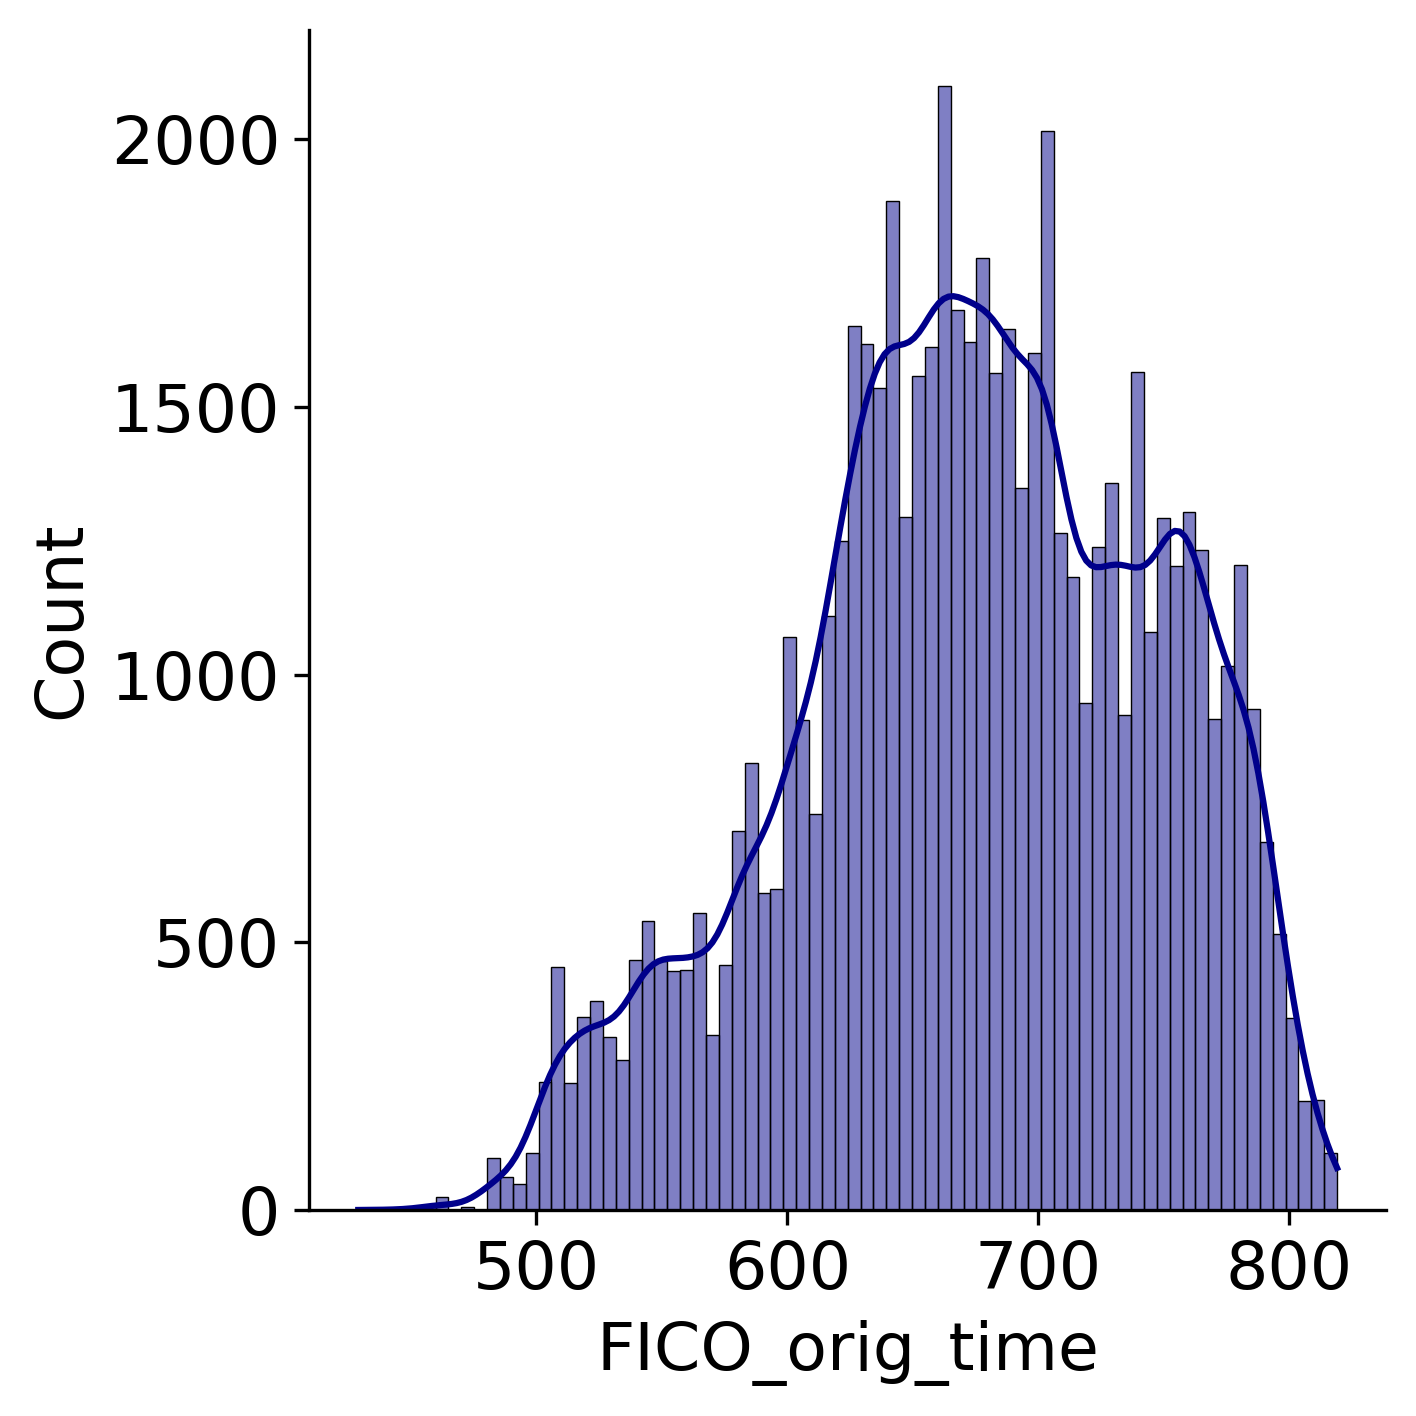

In [35]:
# Density plot for FICO_orig_time
sns.displot(merged_copy['FICO_orig_time'], kde=True, color = 'darkblue')

From this density plot and the statistical analysis we can se that the average FICO score at orige is 673 and it has an standar deviation of 71, which means that the average clients that got a loan approved had a FICO score between (601 and 744). This indicates that banks usually lend to customer with a higher credit score, not just the minimum.

### Standartize FICO_orig_time

In [36]:
### We would standartize the FICO Value to be able to compared agains the LTV

merged_copy[['FICO_orig_time_S']]=(merged_copy[['FICO_orig_time']]-merged_copy[['FICO_orig_time']].mean())/merged_copy[['FICO_orig_time']].std()

#Describe the to FICO_Origine

merged_copy[['FICO_orig_time','FICO_orig_time_S']].describe().round(2)

FICO_orig_time  FICO_orig_time_S
count        61414.00          61414.00
mean           673.53             -0.00
std             71.80              1.00
min            429.00             -3.41
25%            628.00             -0.63
50%            675.00              0.02
75%            730.00              0.79
max            819.00              2.03

### LTV_orig_time

## Statistical analysis
merged_copy['LTV_orig_time'].describe().round()

(0.0, 2500.0)

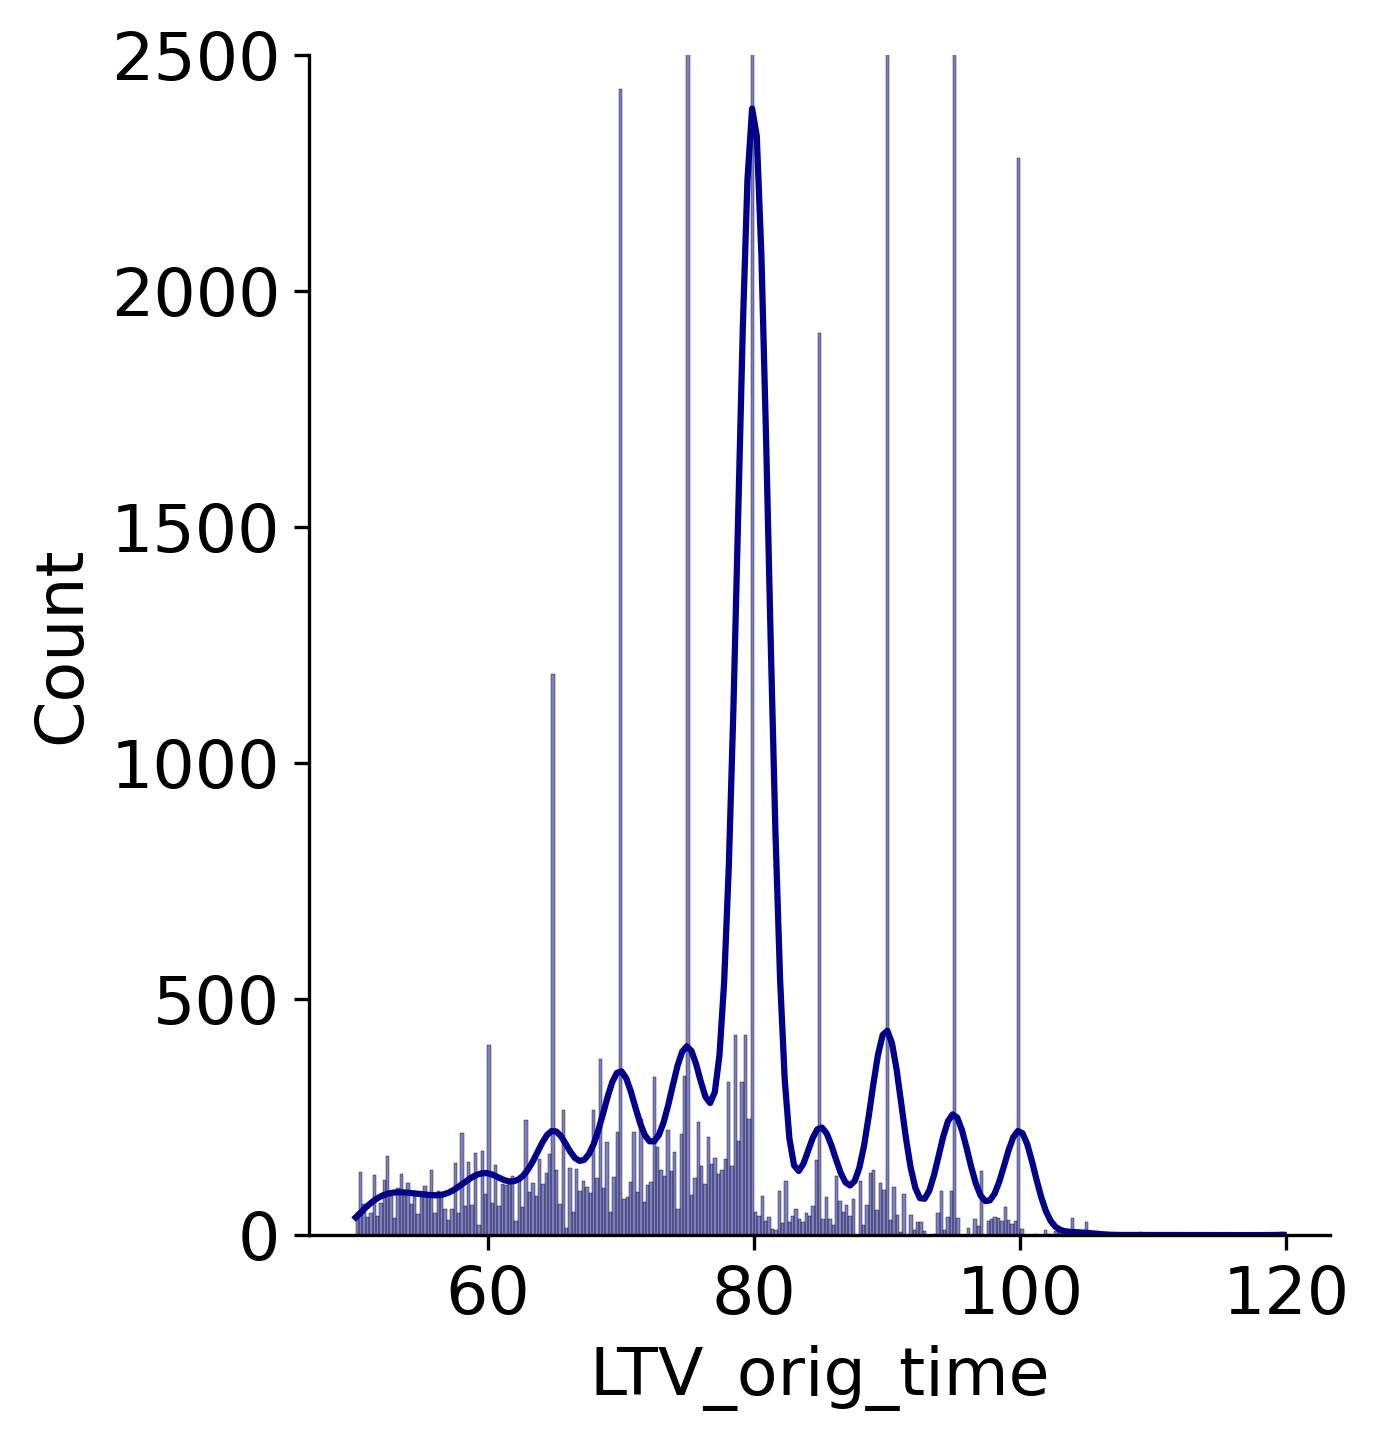

In [38]:
# Density plot for LTV_orig_time
sns.displot(merged_copy['LTV_orig_time'], kde=True, color = 'darkblue')
plt.ylim(0, 2500)

As a result of statistical andalysis and the density plot, we found that the average LTV at origine is 79 and the standard deviation is 10, which means that almost 68% of the customer had a LTV between 69 and 99. In addition, we can see from the plots that frequency for values around 80 is higher than any other value. For the banks this means that they are trying to reduce their risk by set leverage at maximum of 80% in majority of the cases.

In [39]:
### We would standartize the LTV_orig_time Value to be able to compared agains the FICO score

merged_copy[['LTV_orig_time_S']]=(merged_copy[['LTV_orig_time']]-merged_copy[['LTV_orig_time']].mean())/merged_copy[['LTV_orig_time']].std()

#Describe LTV_orig_time and 

merged_copy[['LTV_orig_time','LTV_orig_time_S']].describe().round(2)

LTV_orig_time  LTV_orig_time_S
count       61414.00         61414.00
mean           78.69            -0.00
std            10.24             1.00
min            50.10            -2.79
25%            75.00            -0.36
50%            80.00             0.13
75%            80.00             0.13
max           119.80             4.02

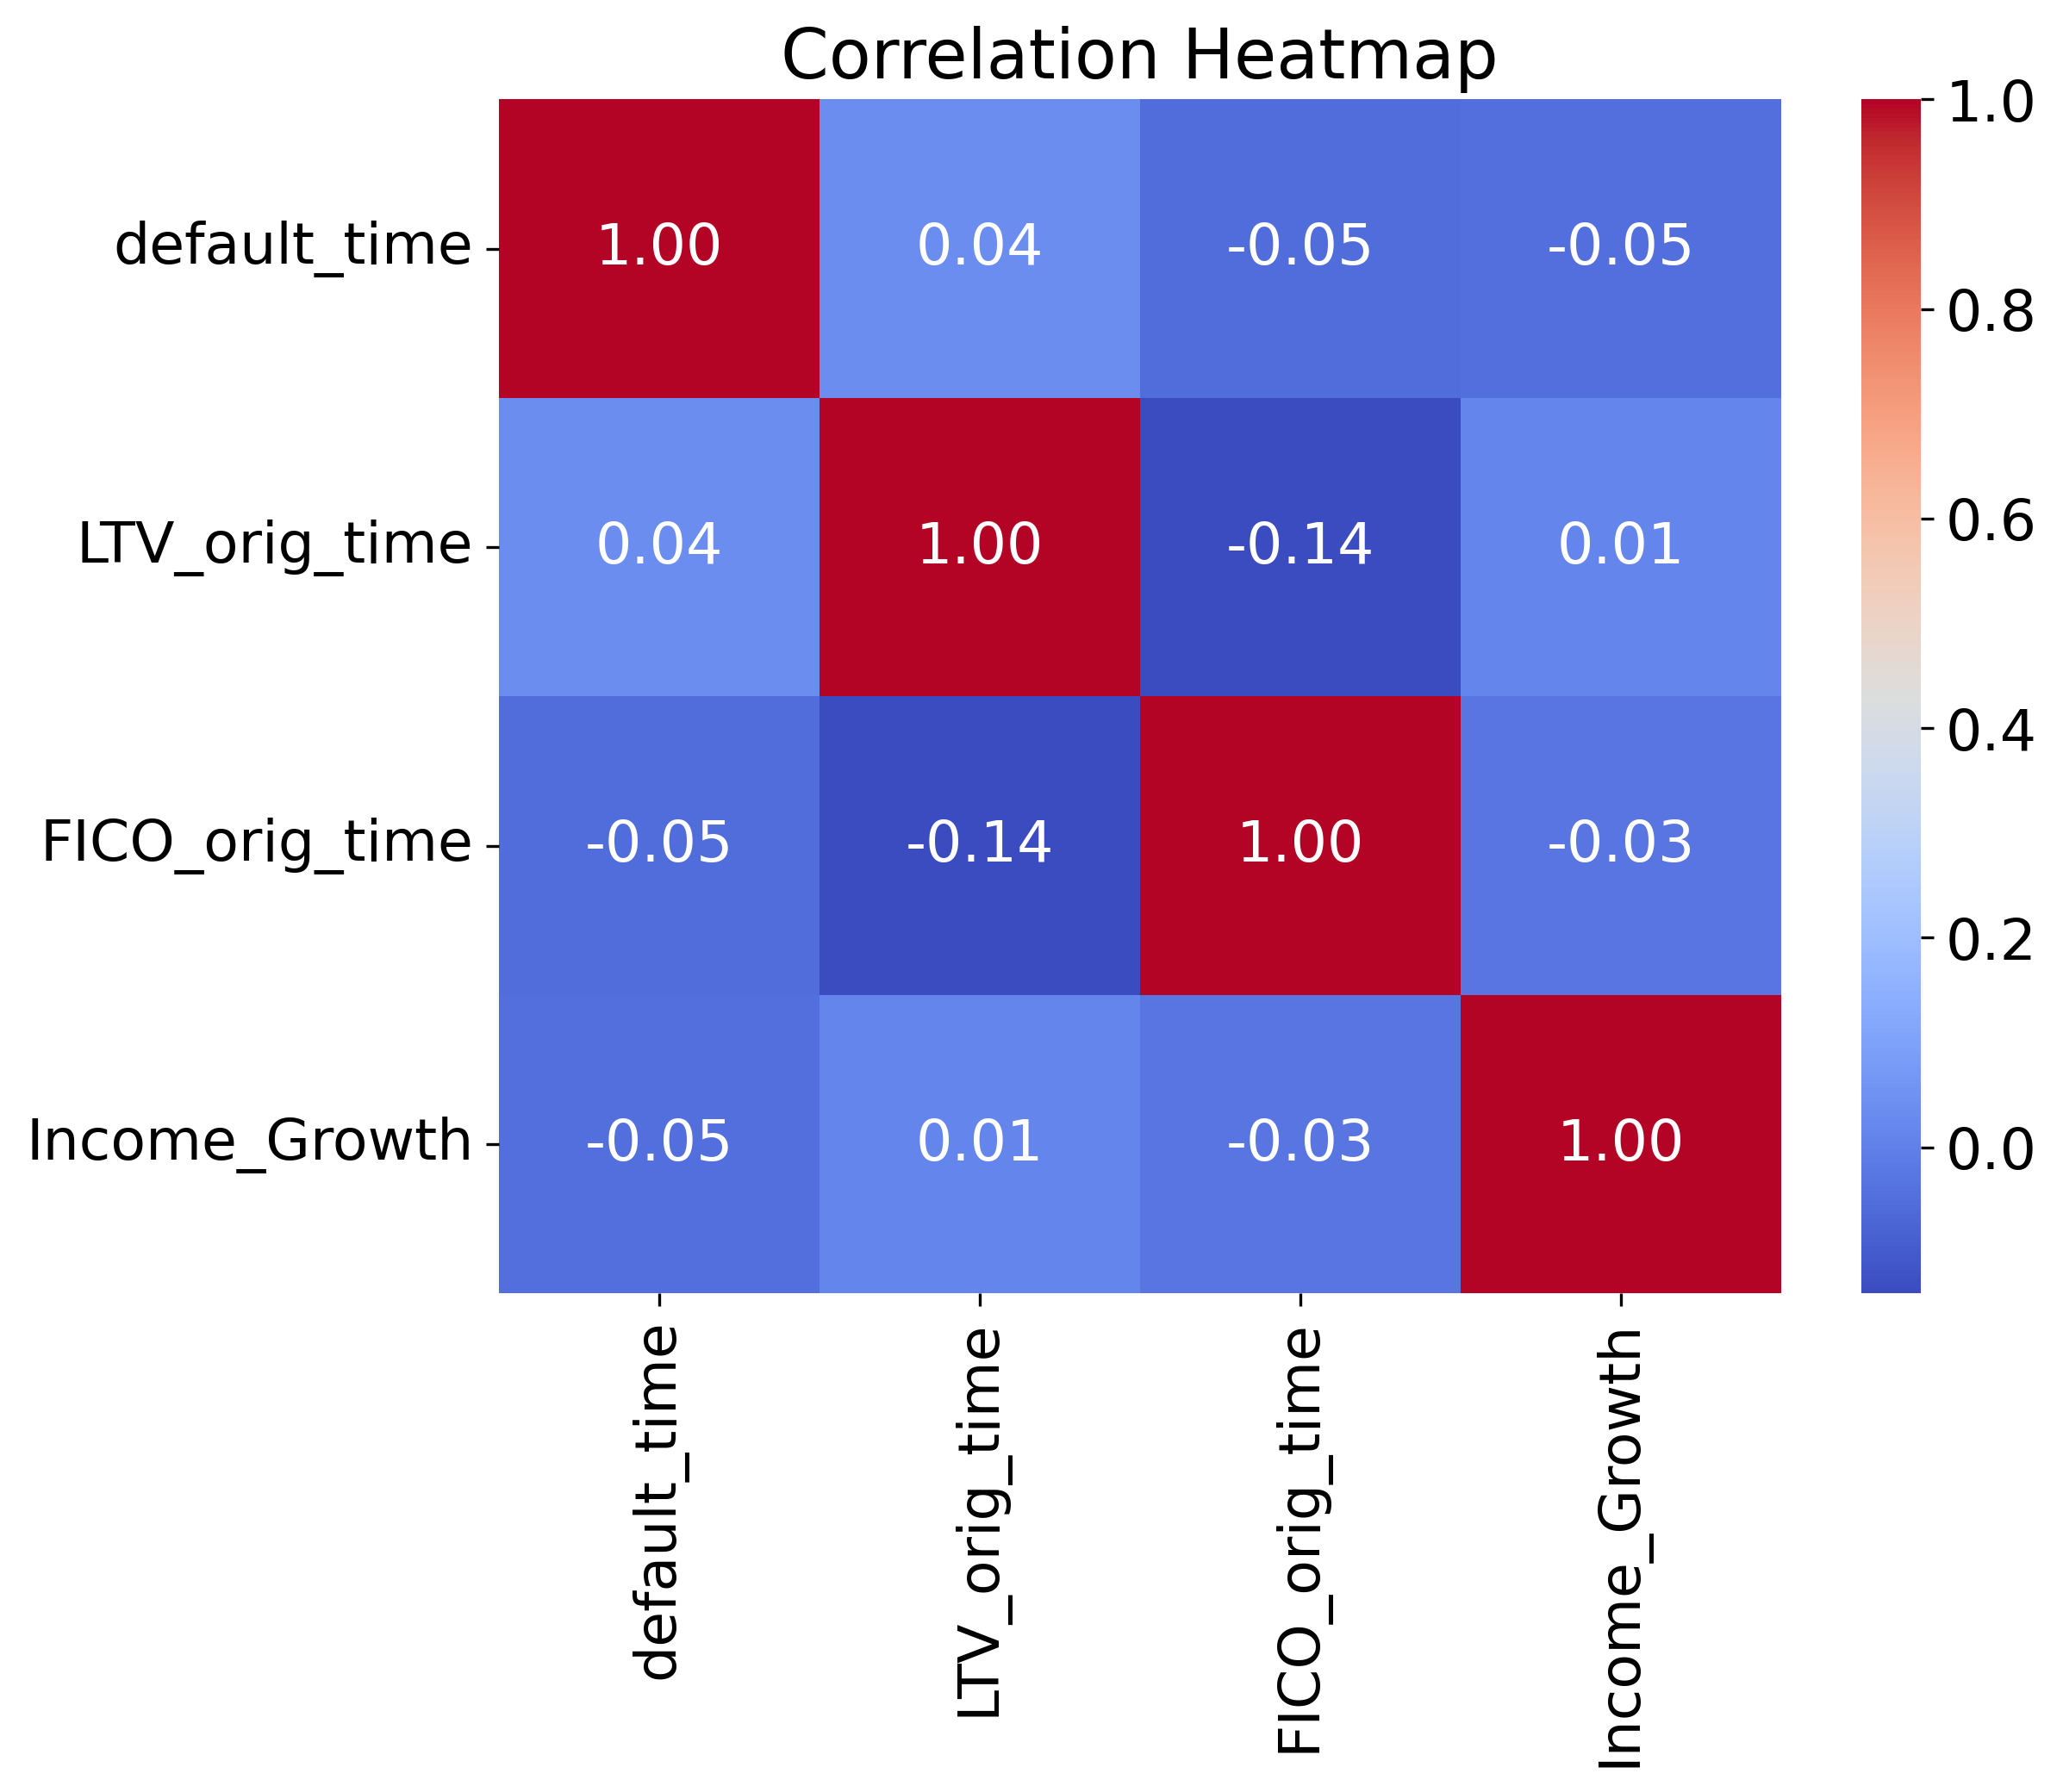

In [40]:
# relationship between response variable and continous variable
correlation = merged_copy[['default_time','LTV_orig_time','FICO_orig_time', 'Income_Growth']].corr()

#correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The correlation analysis above shows that default has a negative correlation of -0.05 with FICO score at origine time, meaning that customer with a lower score represent more risk of defaul and vice versa. LTV at orgine has only a correlation of 0.04 with defult, meaning that high leverage means high risk.

###  Logistic regression model

For our model we have decide to split our data into training set (0.8) and test set (0.2).

In [41]:

# Define the dependent variable (target variable) and independent variables (predictors)
y = merged_copy['default_time']  
X = merged_copy[['FICO_orig_time_S', 'LTV_orig_time_S']]  

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = smf.glm(formula='default_time ~ FICO_orig_time_S + LTV_orig_time_S',
                family=sm.families.Binomial(),
                data=merged_copy)

# Fit the model on the training set
logistic_results_S = model.fit(data=X_train)

# model summary
logistic_results_S.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           default_time   No. Observations:                61414
Model:                            GLM   Df Residuals:                    61411
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6996.3
Date:                Sun, 29 Oct 2023   Deviance:                       13993.
Time:                        14:17:13   Pearson chi2:                 6.03e+04
No. Iterations:                     7   Pseudo R-squ. (CS):           0.003652
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.7489      0.028   -134.890      0.000      -3.803      -3.694
FICO_orig_time_S    -0.3088      0.026    -11.989      0.000      -0.359      -0.258
LTV_orig_time_S      0.1982      0.027      7.435      0.000       0.146       0.250
====================================================================================
"""

In [42]:
PD_logistic=pd.DataFrame(logistic_results_S.predict(X_test), columns=['PD_logistic_model'])
data2=pd.merge(merged_copy,PD_logistic, right_index=True, left_index=True)


In [43]:
data2

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
4       1806    25         22          24       142       NaN     282391.72   
6       1806    27         22          24       142       NaN     281016.65   
7       5910    25         21          23       141       NaN      91797.71   
32     39737    26          6          25       126       NaN      43120.20   
34     39737    28          6          25       126       NaN      42889.88   
...      ...   ...        ...         ...       ...       ...           ...   
61389  49827    52         24          52       144       NaN     113677.68   
61392  48199    55         24          52       145       NaN      65660.53   
61393  48199    56         24          52       145       NaN      65467.96   
61396  49827    55         24          52       144       NaN     113402.96   
61403  49827    58         24          52       144       NaN     127670.58   

         LTV_time  interest_rate_time  rate_time  ...  default_time  \
4       85.876675               7.300       4.34  ...             0   
6       86.957175               7.300       4.34  ...             0   
7       73.356698               7.750       3.94  ...             0   
32            NaN               8.875       4.60  ...             0   
34            NaN               9.500       4.60  ...             0   
...           ...                 ...        ...  ...           ...   
61389  123.325211              10.490       4.86  ...             0   
61392   93.779262               9.990       4.86  ...             0   
61393   92.803317               9.990       4.86  ...             0   
61396  110.087016              10.490       4.86  ...             0   
61403  118.476487              10.250       4.86  ...             0   

       payoff_time  status_time  lgd_time  recovery_res  time_year  \
4                0            0       NaN           NaN       2007   
6                1            2       NaN           NaN       2007   
7                0            0       NaN           NaN       2007   
32               0            0       NaN           NaN       2007   
34               0            0       NaN           NaN       2007   
...            ...          ...       ...           ...        ...   
61389            0            0       NaN           NaN       2013   
61392            0            0       NaN           NaN       2014   
61393            0            0       NaN           NaN       2014   
61396            0            0       NaN           NaN       2014   
61403            0            0       NaN           NaN       2015   

       Income_Growth  FICO_orig_time_S  LTV_orig_time_S  PD_logistic_model  
4             -0.001         -0.564527         1.104648           0.033714  
6             -0.001         -0.564527         1.104648           0.033714  
7             -0.001         -0.912719         0.127635           0.031017  
32            -0.001         -0.731659         0.127635           0.029380  
34            -0.001         -0.731659         0.127635           0.029380  
...              ...               ...              ...                ...  
61389          0.030         -2.194065         1.368442           0.057322  
61392          0.058         -1.428043         0.127635           0.036174  
61393          0.058         -1.428043         0.127635           0.036174  
61396          0.058         -2.194065         1.368442           0.057322  
61403          0.063         -2.194065         1.368442           0.057322  

[12283 rows x 33 columns]

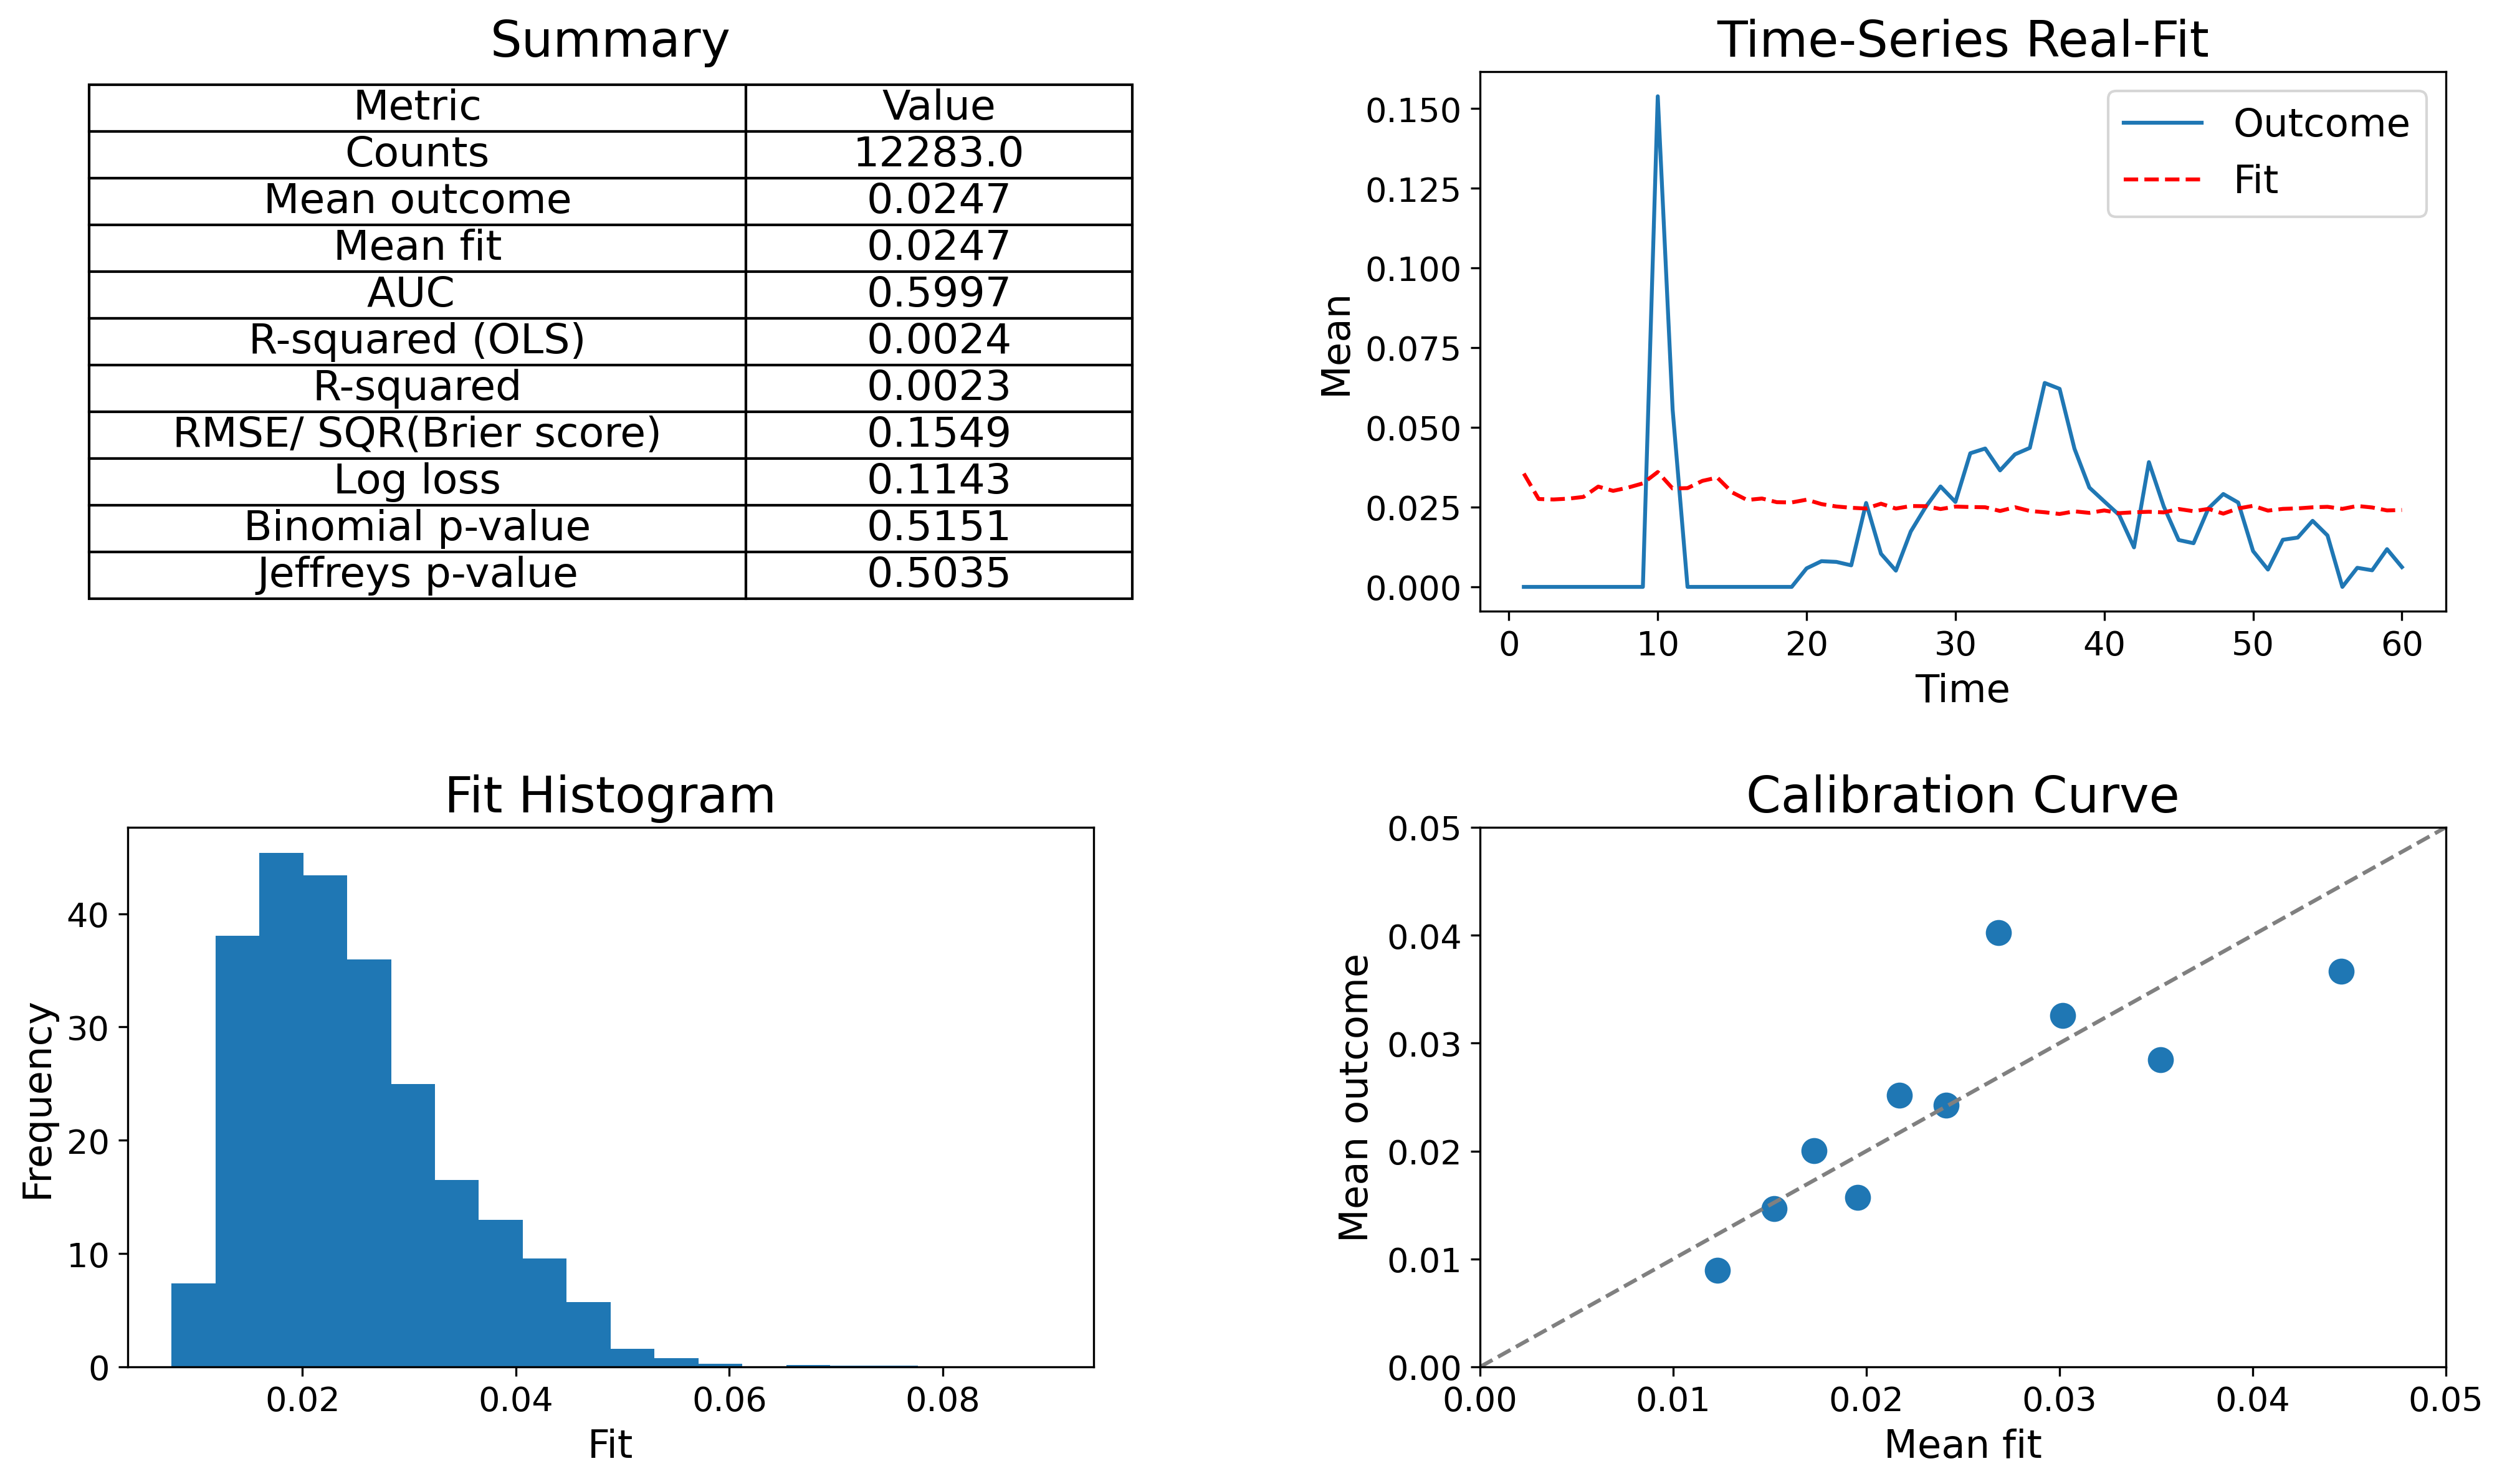

In [44]:
validation(data2.PD_logistic_model, data2.default_time, data2.time)

In [45]:
#Here we are calculatint the probability of defult using (PD_logistic_model)  by time period
PD_L = data2.groupby('time')['PD_logistic_model'].mean().reset_index(drop=False)

PD_L

time  PD_logistic_model
0      1           0.035542
1      2           0.027557
2      3           0.027418
3      4           0.027670
4      5           0.028212
..   ...                ...
55    56           0.024470
56    57           0.025377
57    58           0.024908
58    59           0.023982
59    60           0.024109

[60 rows x 2 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

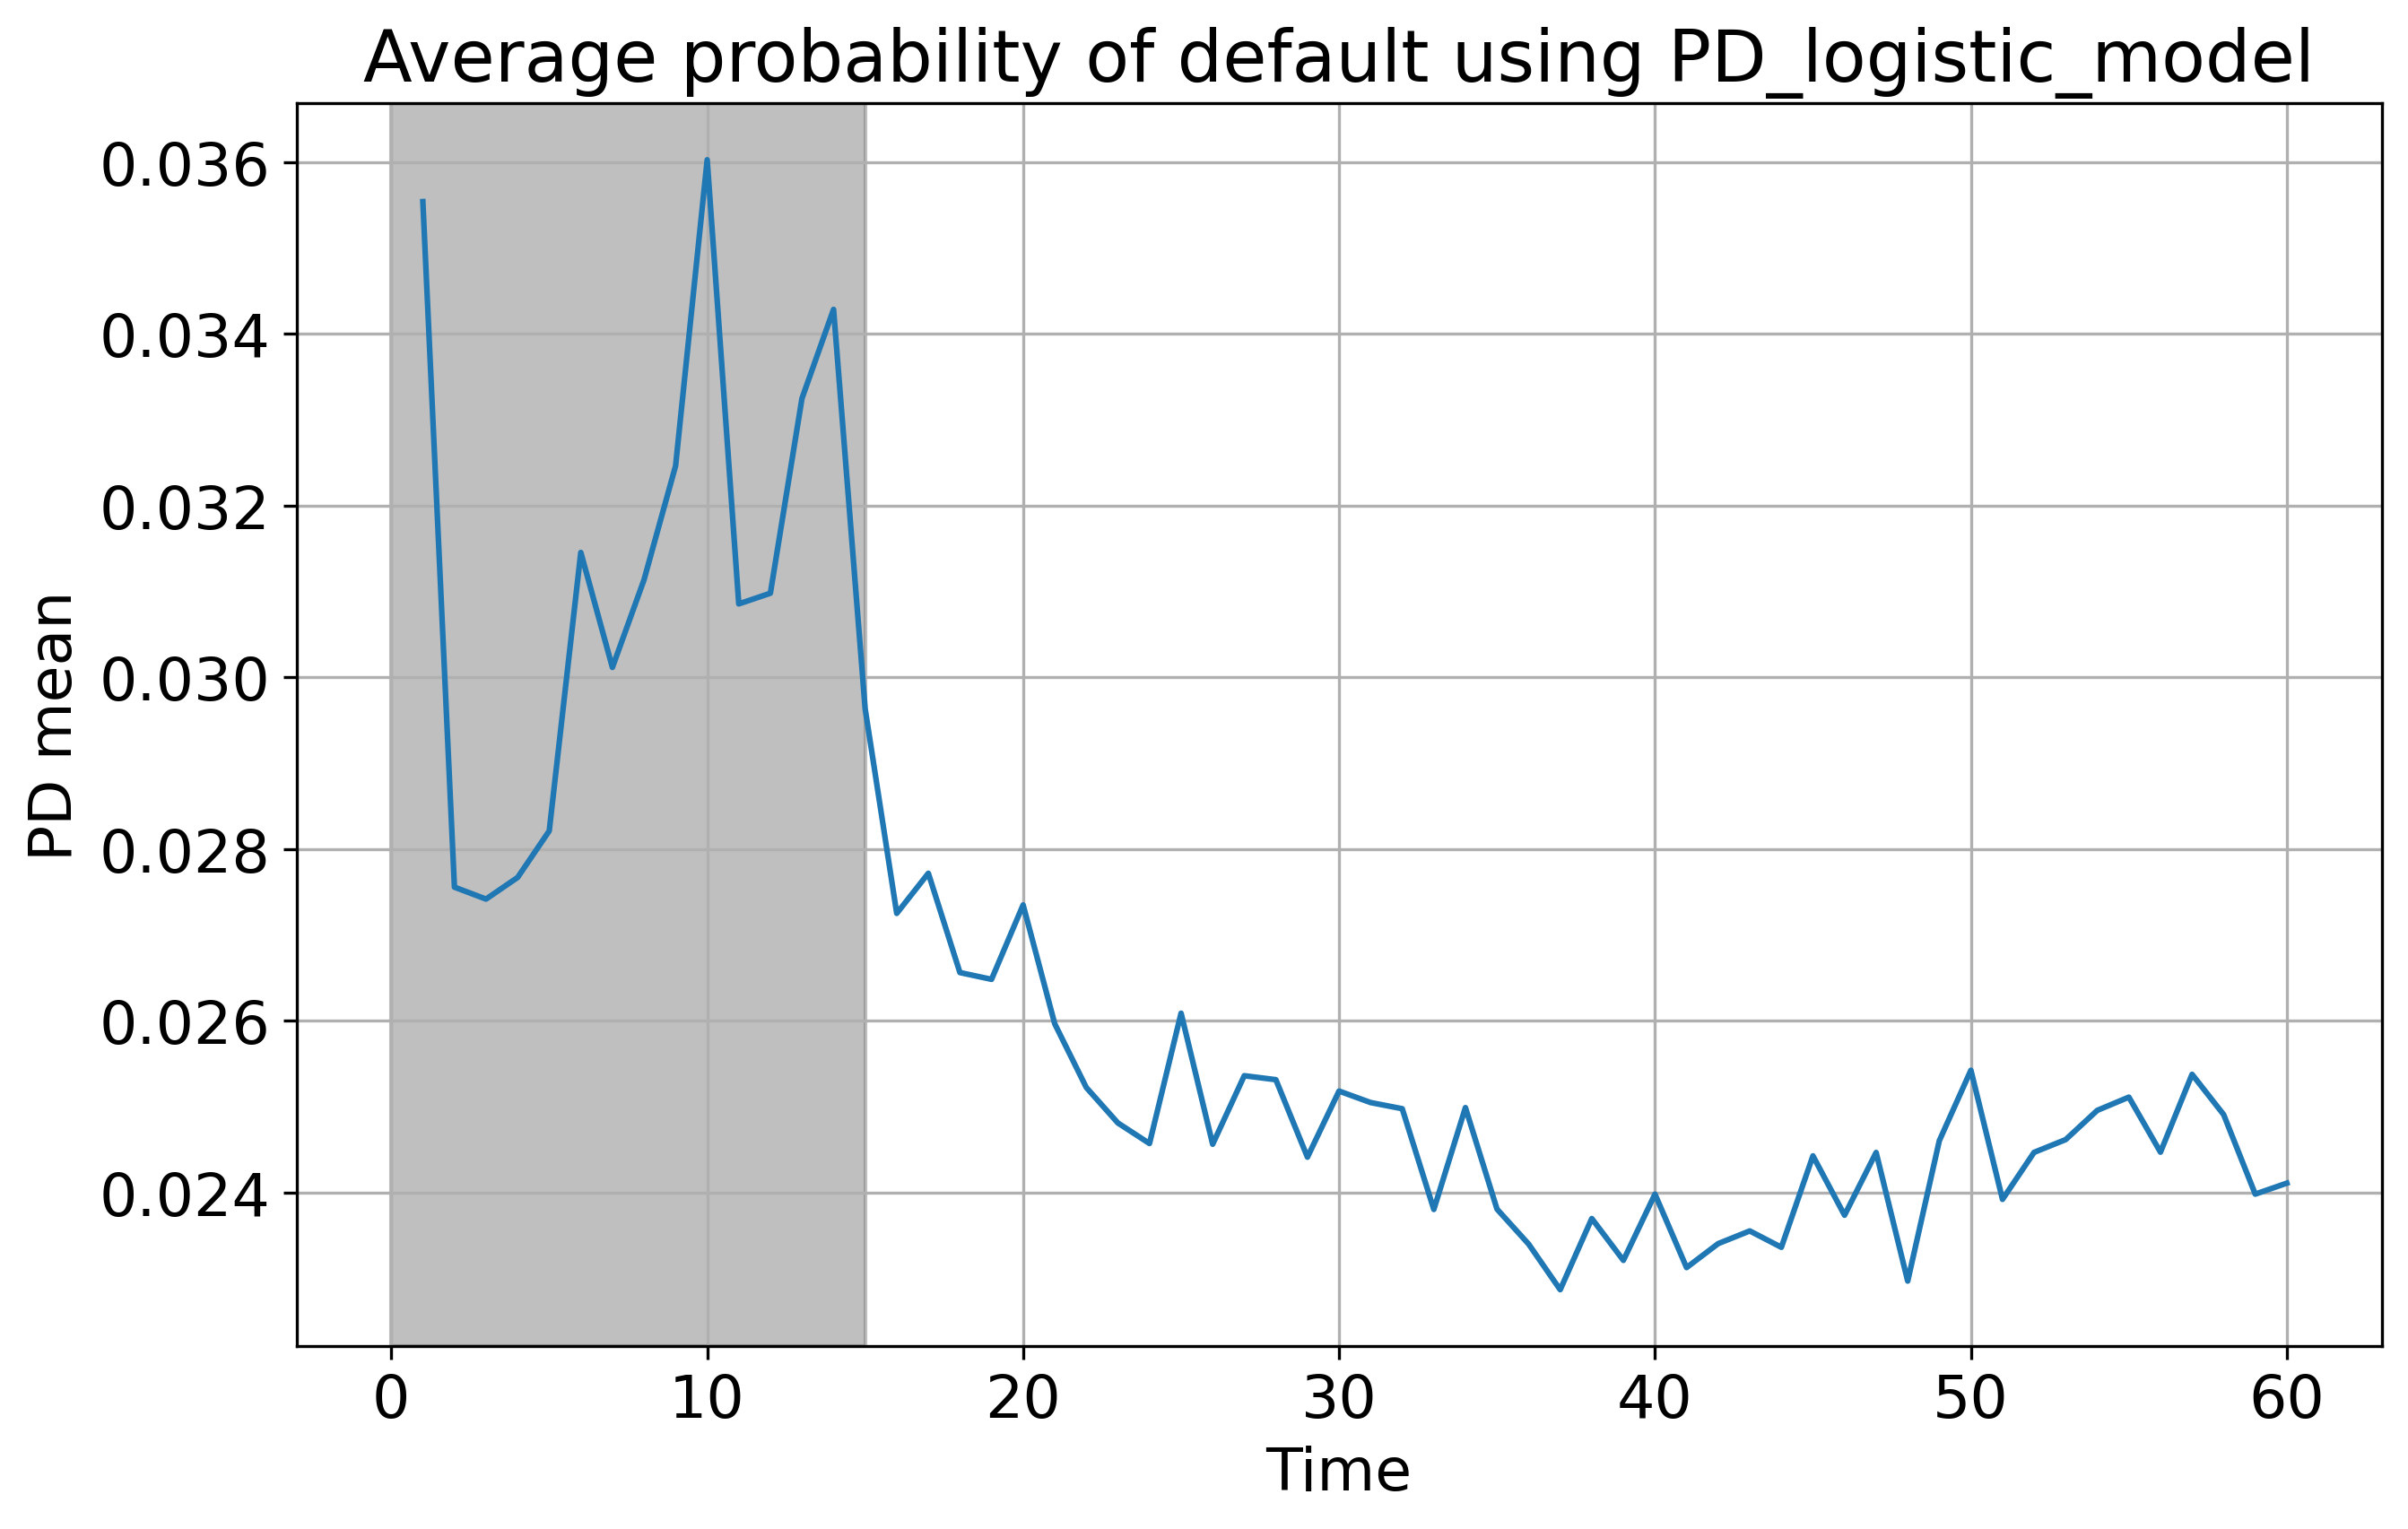

In [46]:
plt.figure(figsize=(10, 6))
plt.plot('time', 'PD_logistic_model', data=PD_L) 
plt.axvspan(0, 15, color="grey", alpha=0.5)
plt.title("Average probability of default using PD_logistic_model")
plt.xlabel('Time')
plt.ylabel('PD mean')
plt.grid(True)
plt.show

The graph above shows us the average PD by time for the logistic model build using the FICO score and Loan-to-value at origination as our predictor variables. This illustration shows us the positive relationship between PD and loan-to-value ratio that we found in modelling results (an increase of the LTV by 1 unit would increase the PD by 0.1982). At the beginning of the loan, borrowers tend to have a higher LTV and as mentioned above an average of 79%, which at the same time is associated with higher annuities and a higher risk of default in the first 10 - 15 quatres (2,5 to 3 years). Then, as borrowers make successful payments and stabilize their financial situation, the risk of default decreases over time from period 15 on. On the other hand, there are situations that can contribute to increased LTV, for instance, a decrease in the house's value would make borrowers owe more than the property is worth, and this can be associated with higher default risk.

### 2-B 

### Logistic regression model including Income Growth

Estimate the PD model again by including explanatory variables in part (a), and the state-level income growth from Question 1 in one regression. Compute the estimated PD for all mortgage loans and periods. Plot the average probability of default by period in a chart. Provide your code, an output for the model, the plots and interpret the output economically.

In [47]:

# Define the dependent variable (target variable) and independent variables (predictors)
y = merged_copy['default_time']  
X = merged_copy[['FICO_orig_time_S', 'LTV_orig_time_S','Income_Growth']]  

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = smf.glm(formula='default_time ~ FICO_orig_time_S + LTV_orig_time_S + Income_Growth' ,
                family=sm.families.Binomial(),
                data=merged_copy)

# Fit the model on the training set
logistic_results_2 = model.fit(data=X_train)

# Get predicted log-odds for the training set
predicted_logodds_train = logistic_results_2.predict(X_train)



In [49]:
# View model summary
logistic_results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           default_time   No. Observations:                61414
Model:                            GLM   Df Residuals:                    61410
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6923.5
Date:                Sun, 29 Oct 2023   Deviance:                       13847.
Time:                        14:17:15   Pearson chi2:                 5.93e+04
No. Iterations:                     7   Pseudo R-squ. (CS):           0.006013
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.6720      0.028   -131.368      0.000      -3.727      -3.617
FICO_orig_time_S    -0.3159      0.026    -12.235      0.000      -0.367      -0.265
LTV_orig_time_S      0.1997      0.027      7.454      0.000       0.147       0.252
Income_Growth       -6.8866      0.571    -12.063      0.000      -8.005      -5.768
====================================================================================
"""

In [50]:
PD_logistic2=pd.DataFrame(logistic_results_2.predict(X_test), columns=['PD_model_income'])
data4=pd.merge(data2,PD_logistic2, right_index=True, left_index=True)

data4

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
4       1806    25         22          24       142       NaN     282391.72   
6       1806    27         22          24       142       NaN     281016.65   
7       5910    25         21          23       141       NaN      91797.71   
32     39737    26          6          25       126       NaN      43120.20   
34     39737    28          6          25       126       NaN      42889.88   
...      ...   ...        ...         ...       ...       ...           ...   
61389  49827    52         24          52       144       NaN     113677.68   
61392  48199    55         24          52       145       NaN      65660.53   
61393  48199    56         24          52       145       NaN      65467.96   
61396  49827    55         24          52       144       NaN     113402.96   
61403  49827    58         24          52       144       NaN     127670.58   

         LTV_time  interest_rate_time  rate_time  ...  payoff_time  \
4       85.876675               7.300       4.34  ...            0   
6       86.957175               7.300       4.34  ...            1   
7       73.356698               7.750       3.94  ...            0   
32            NaN               8.875       4.60  ...            0   
34            NaN               9.500       4.60  ...            0   
...           ...                 ...        ...  ...          ...   
61389  123.325211              10.490       4.86  ...            0   
61392   93.779262               9.990       4.86  ...            0   
61393   92.803317               9.990       4.86  ...            0   
61396  110.087016              10.490       4.86  ...            0   
61403  118.476487              10.250       4.86  ...            0   

       status_time  lgd_time  recovery_res  time_year  Income_Growth  \
4                0       NaN           NaN       2007         -0.001   
6                2       NaN           NaN       2007         -0.001   
7                0       NaN           NaN       2007         -0.001   
32               0       NaN           NaN       2007         -0.001   
34               0       NaN           NaN       2007         -0.001   
...            ...       ...           ...        ...            ...   
61389            0       NaN           NaN       2013          0.030   
61392            0       NaN           NaN       2014          0.058   
61393            0       NaN           NaN       2014          0.058   
61396            0       NaN           NaN       2014          0.058   
61403            0       NaN           NaN       2015          0.063   

       FICO_orig_time_S  LTV_orig_time_S  PD_logistic_model  PD_model_income  
4             -0.564527         1.104648           0.033714         0.036749  
6             -0.564527         1.104648           0.033714         0.036749  
7             -0.912719         0.127635           0.031017         0.033853  
32            -0.731659         0.127635           0.029380         0.032031  
34            -0.731659         0.127635           0.029380         0.032031  
...                 ...              ...                ...              ...  
61389         -2.194065         1.368442           0.057322         0.051553  
61392         -1.428043         0.127635           0.036174         0.026732  
61393         -1.428043         0.127635           0.036174         0.026732  
61396         -2.194065         1.368442           0.057322         0.042899  
61403         -2.194065         1.368442           0.057322         0.041508  

[12283 rows x 34 columns]

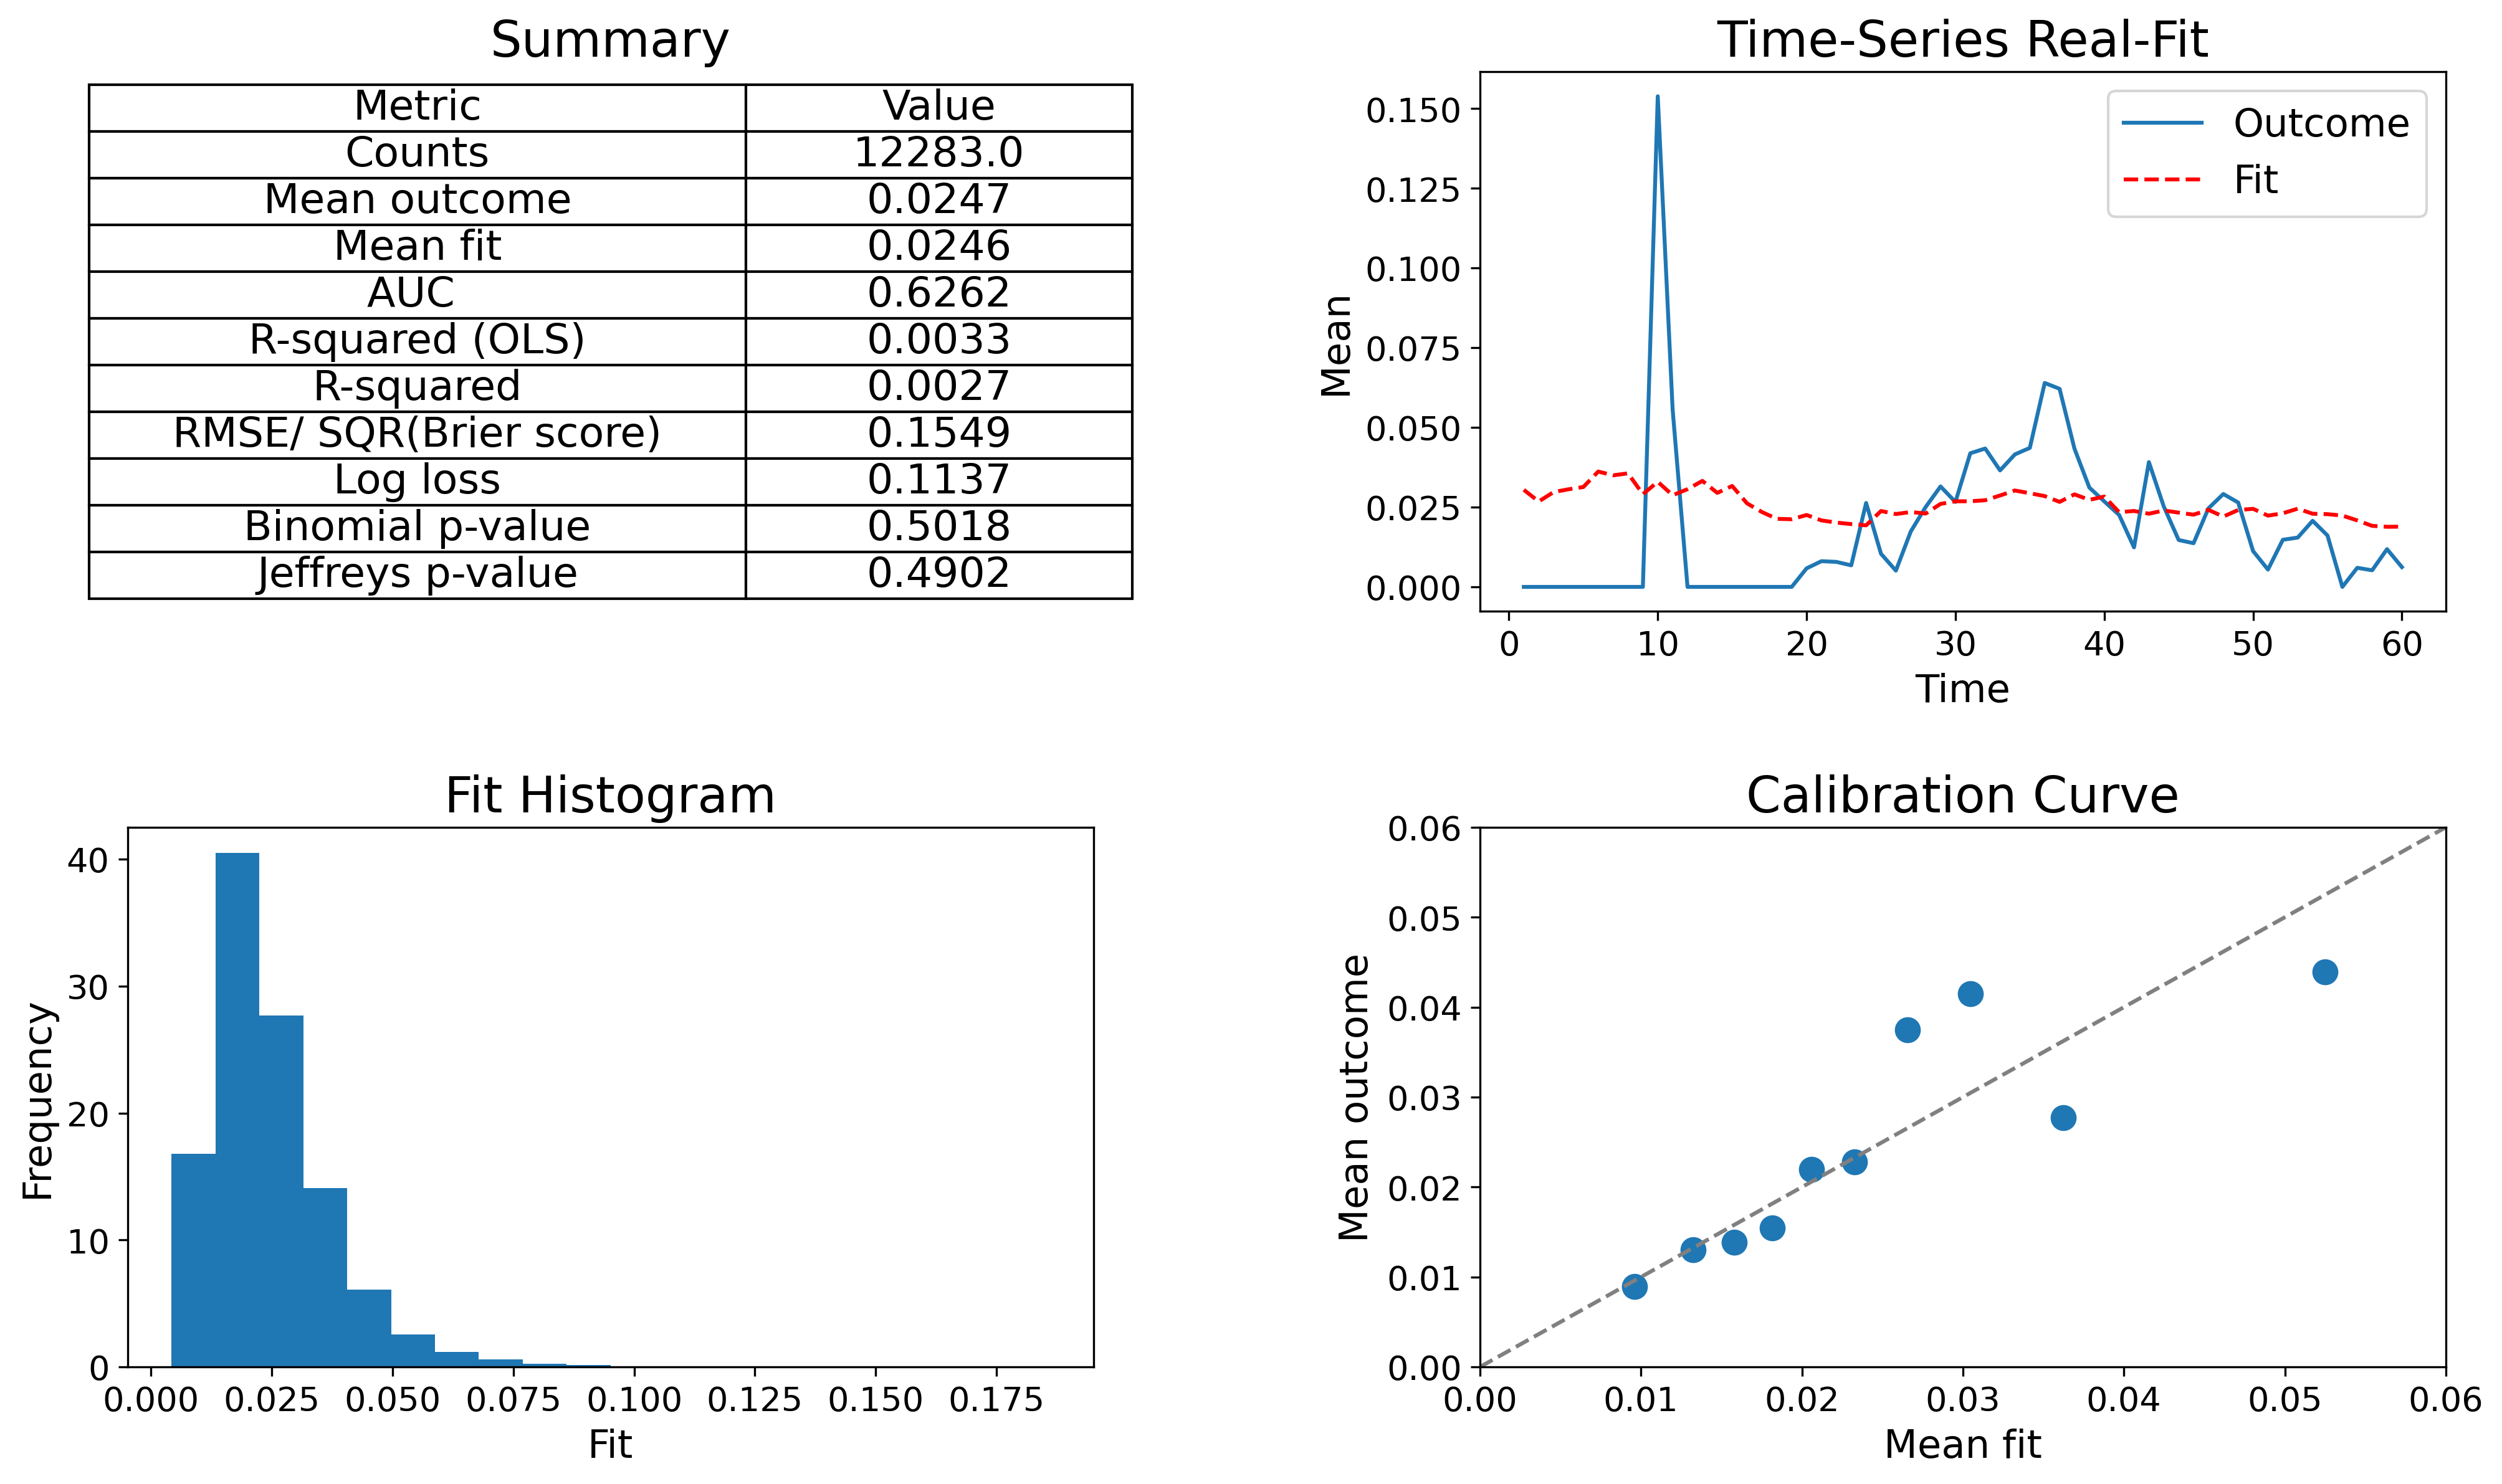

In [51]:
validation(data4.PD_model_income, data4.default_time, data4.time)

In [52]:
#Here we are calculatint the probability of defult using (PD_model_income)  by time period
PD_Income = data4.groupby('time')['PD_model_income'].mean().reset_index(drop=False)

PD_Income

time  PD_model_income
0      1         0.030442
1      2         0.026774
2      3         0.029730
3      4         0.030612
4      5         0.031318
..   ...              ...
55    56         0.022369
56    57         0.020846
57    58         0.019147
58    59         0.018847
59    60         0.018898

[60 rows x 2 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

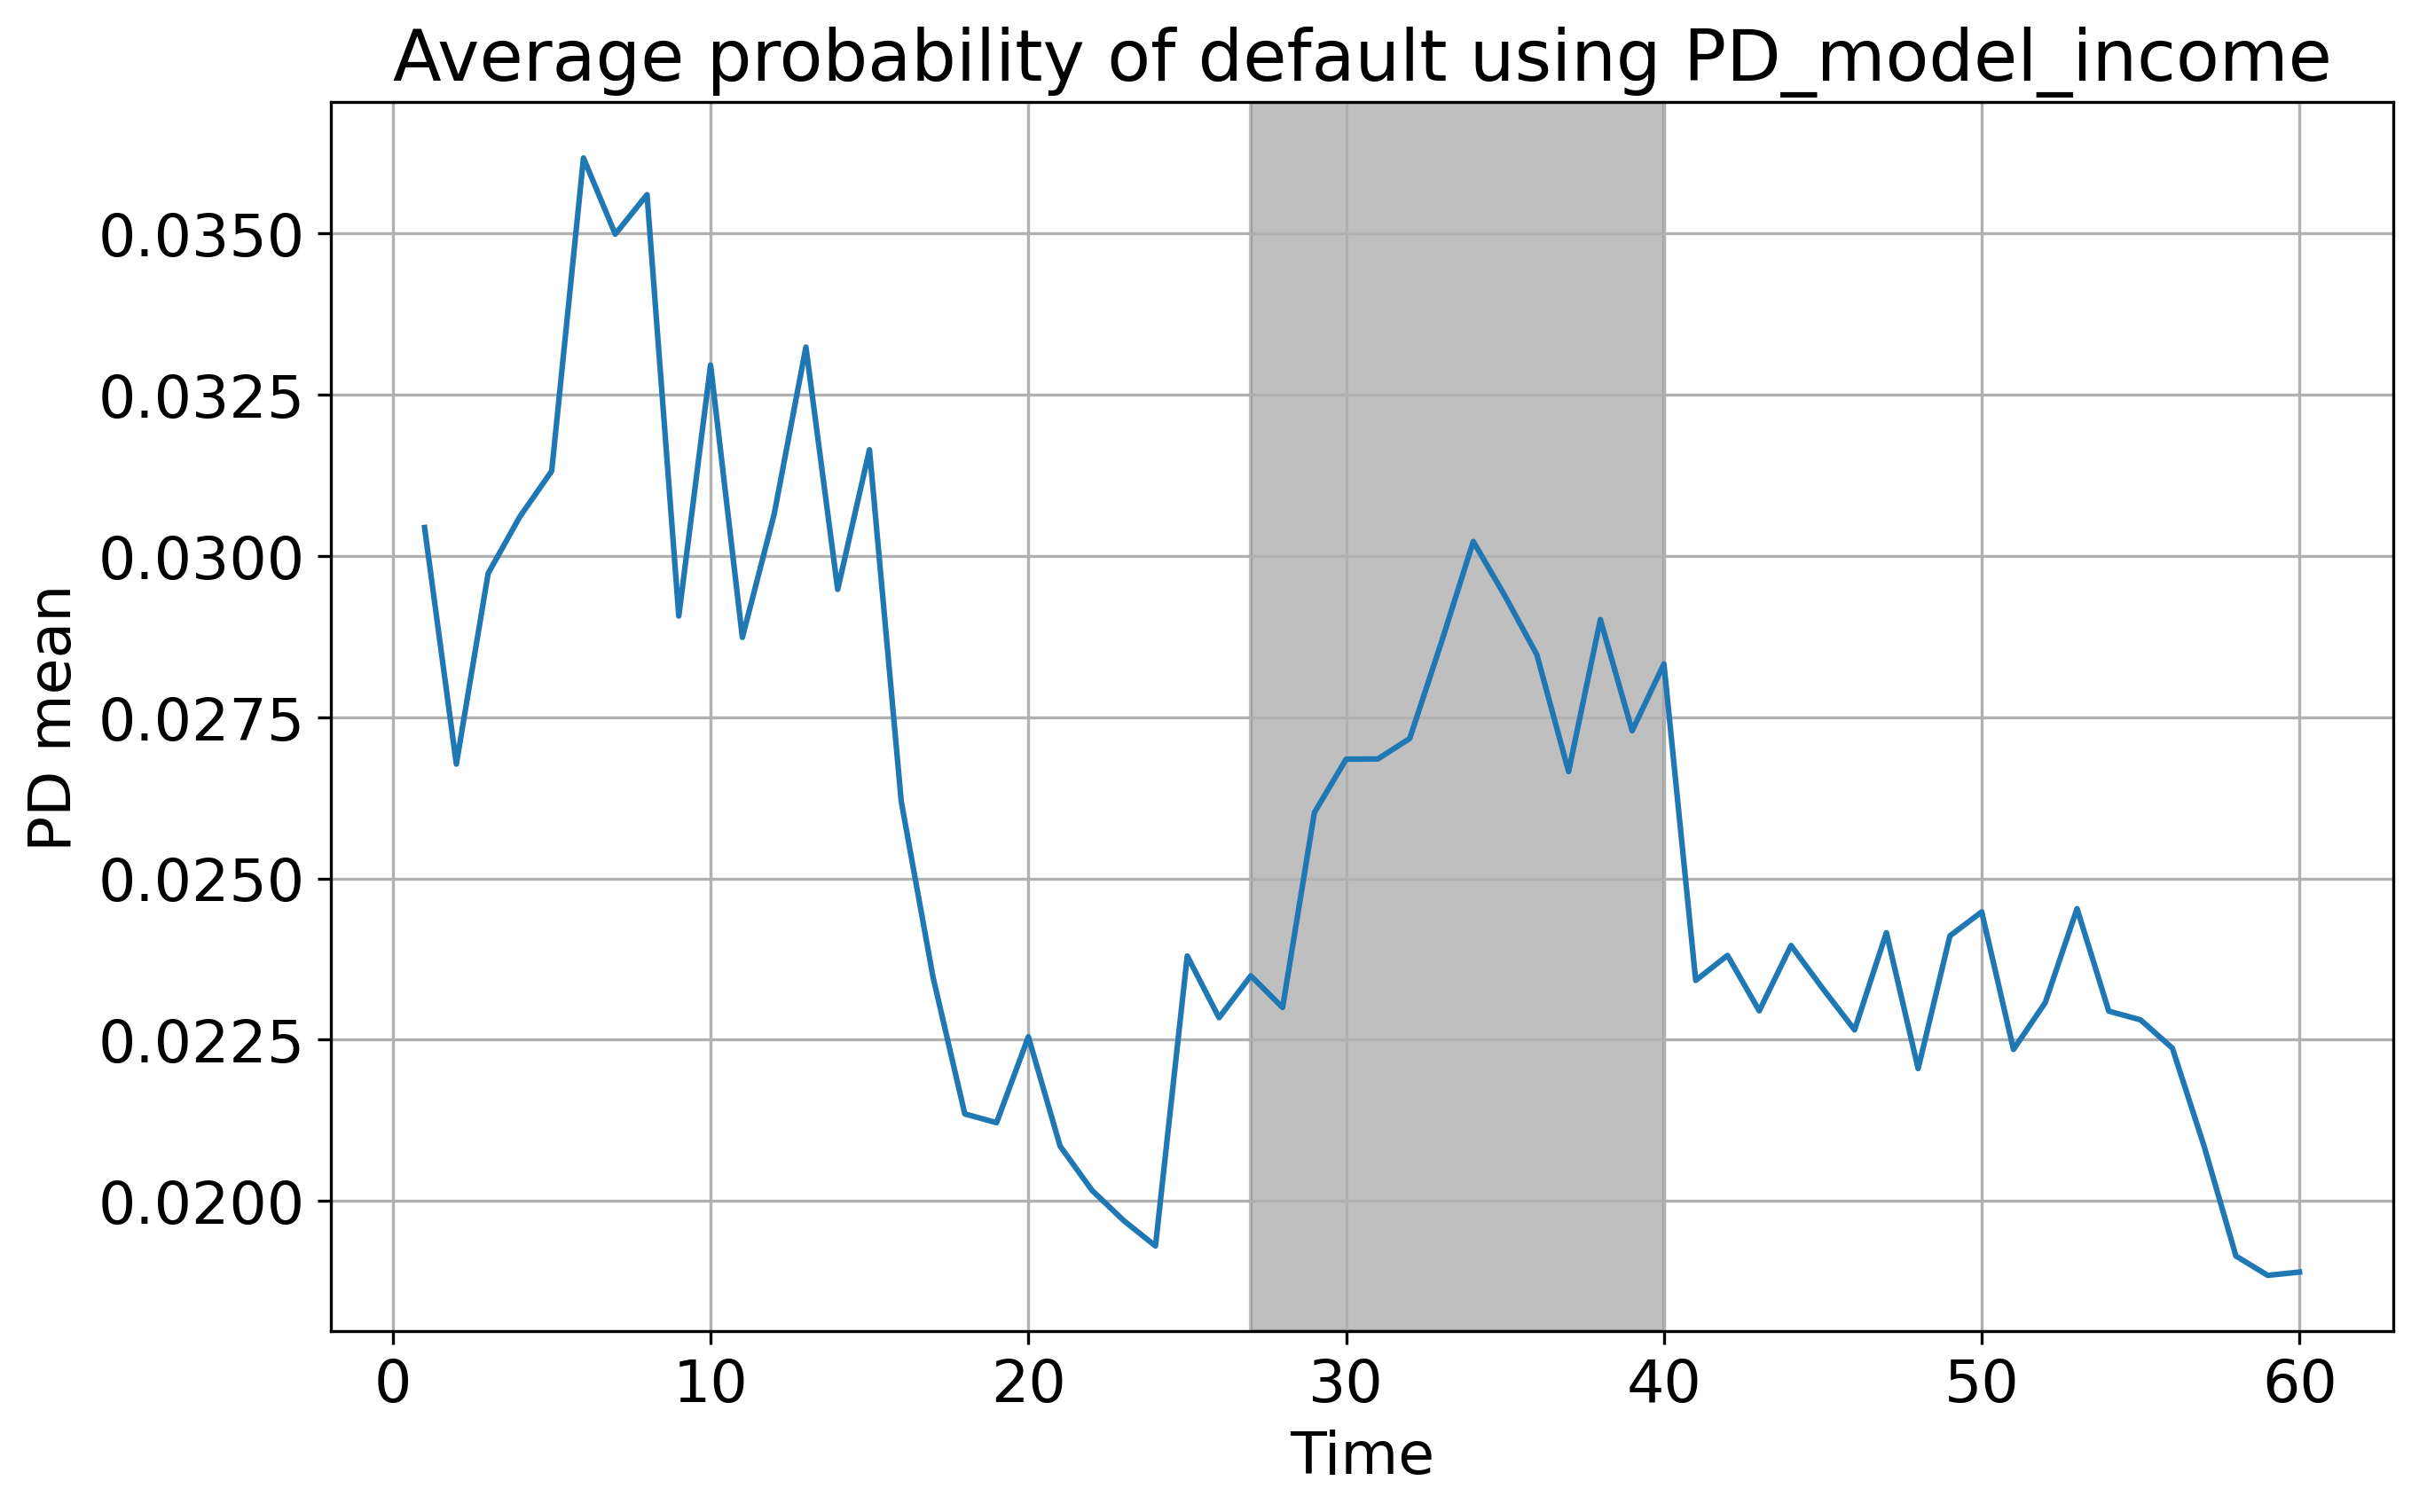

In [53]:
plt.figure(figsize=(10, 6))
plt.plot('time', 'PD_model_income', data=PD_Income) 
plt.axvspan(27, 40, color="grey", alpha=0.5)
plt.title("Average probability of default using PD_model_income")
plt.xlabel('Time')
plt.ylabel('PD mean')
plt.grid(True)
plt.show

This time we have added the income growth along with the other two variables used in model 2-A (FICO_orig_time_S - LTV_orig_time_S). This time by adding Income growth as a predictor variable, we want to analyse the impact of the medium income growth on the probability of default. As we already know from 1-A, income serves as an indicator of a borrower's capacity to repay a loan. Therefore, an economic downturn might have an impact on borrower's income, which could affect their ability to meet their financial responsibilities. As discussed in the past model, there is a positive relationship between LTV_orig and the PD. For the income growth, we can see that it has a strong negative correlation, meaning that a decrease of the income_growth by one unit would increase the PD by -6.8866. Evidence of this is the periods 27 to 40 that make the reference to the economic downturn in the U.S. (2008 - 2010), where the average medium income decreased and led to an increase in the risk of default during that period.

## 3. LGD Modeling

### 3-A 

Compute the loss rate given default (LGD) for all mortgage loans and periods from the current loan to value ratio LTV assuming a 40% house price decline for all loans in all future periods and no repayment of the outstanding loan amount. Compute the hypothetical LGD for all mortgage loans and periods. Plot a histogram for the distribution of the LGD. Provide your code, plots, and analyse the output economically.

In this case we assume the following:
- A 40% decline in house prices for all loans in future periods.
- No repayment of the outstanding loan amoung.


For this case, I'm assuming that the defult is when defualt_time = 1.

In [62]:
data_default = merged_copy.copy()

In [63]:
data_default1 = data_default.query('default_time==1')
data_default1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516 entries, 10 to 61280
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1516 non-null   int64  
 1   time                     1516 non-null   int64  
 2   orig_time                1516 non-null   int64  
 3   first_time               1516 non-null   int64  
 4   mat_time                 1516 non-null   int64  
 5   res_time                 1154 non-null   float64
 6   balance_time             1516 non-null   float64
 7   LTV_time                 1515 non-null   float64
 8   interest_rate_time       1516 non-null   float64
 9   rate_time                1516 non-null   float64
 10  hpi_time                 1516 non-null   float64
 11  gdp_time                 1516 non-null   float64
 12  uer_time                 1516 non-null   float64
 13  REtype_CO_orig_time      1516 non-null   int64  
 14  REtype_PU_orig_time   

### Reolution time
First we need to calculate the time from default to resolution of a loan

In [64]:
data_default1.loc[:,'res_period']=data_default1.loc[:,'res_time']-data_default1.loc[:,'time']

In [65]:
data_default1[['res_period']].describe()

res_period
count  1154.000000
mean      6.670711
std       5.141440
min       0.000000
25%       3.000000
50%       5.000000
75%       8.000000
max      37.000000

This implies that the average resolution time is 6.6 quarters.

### Calculating LGD

From lecture 9 we know that the formula for LGD is:

Relative LGD = (outstanding loan amount - post-default cashflows (=recoveries))/outstanding loan amount.

Therefore, a decline by 40% in the house value, implies that the recovery amount is reduce by 40%. This we add to the LGD formula.


In [66]:
data_default1.loc[:,'LGD'] = (data_default1.loc[:,'balance_time'] - (0.6* data_default1.loc[:,'recovery_res'])/(1+data_default1.loc[:,'rate_time']/(100*4))**data_default1.loc[:,'res_period'])/data_default1.loc[:,'balance_time'] 

In [67]:
data_default1.loc[:,'LGD'].describe()

count    1154.000000
mean        0.769132
std         0.197447
min         0.379759
25%         0.633004
50%         0.781981
75%         0.905569
max         1.488559
Name: LGD, dtype: float64

In [68]:
data_default1

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
10      5910    28         21          23       141      42.0      91304.53   
36     44583    26         25          25       143      32.0      96937.51   
88      4644    36         27          29       148      45.0     787568.92   
90      7030    34         26          29       146       NaN      80506.08   
153     4280    37         26          29       146       NaN     374480.90   
...      ...   ...        ...         ...       ...       ...           ...   
61213  41647    35        -14          25       106      40.0     114579.08   
61220  31211    37         29          32       150      41.0     961584.82   
61224  31340    36         26          28       146       NaN     239179.23   
61273  42567    40         27          29       147      42.0      88595.17   
61280  41726    44         13          27       133      55.0      81078.37   

         LTV_time  interest_rate_time  rate_time  ...  payoff_time  \
10      75.161401               7.750       3.94  ...            0   
36      80.205740               6.550       5.15  ...            0   
88      90.764952               6.990       4.71  ...            0   
90     139.343398               7.000       4.64  ...            0   
153    117.707600               7.332       4.64  ...            0   
...           ...                 ...        ...  ...          ...   
61213   42.160290               8.500       6.72  ...            0   
61220   97.358839               6.625       5.03  ...            0   
61224  118.473824               8.875       4.64  ...            0   
61273  134.897797               5.250       4.71  ...            0   
61280   86.990071               6.500       3.54  ...            0   

       status_time  lgd_time  recovery_res  time_year  Income_Growth  \
10               1  0.629607      33818.55       2007         -0.001   
36               1  0.343072      63680.93       2007         -0.001   
88               1  0.588728     323905.00       2009          0.037   
90               1  0.000000      80506.08       2009          0.037   
153              1  0.000000     374480.90       2010          0.077   
...            ...       ...           ...        ...            ...   
61213            1  0.003336     114196.84       2009         -0.037   
61220            1  0.485720     494523.95       2010          0.021   
61224            1  0.000000     239179.23       2009          0.066   
61273            1  0.000000      88595.17       2010         -0.034   
61280            1  0.000196      81062.45       2011          0.024   

       FICO_orig_time_S  LTV_orig_time_S  res_period       LGD  
10            -0.912719         0.127635        14.0  0.806261  
36            -1.149489         0.127635         6.0  0.634966  
88             0.285061        -1.552828         9.0  0.777912  
90            -1.205200         2.970744         NaN       NaN  
153           -0.453105         0.127635         NaN       NaN  
...                 ...              ...         ...       ...  
61213         -1.915511         2.277064         5.0  0.449798  
61220          0.396483        -0.849378         4.0  0.706477  
61224         -1.038068         0.127635         NaN       NaN  
61273         -0.954502         1.104648         2.0  0.413884  
61280         -2.653678         1.935110        11.0  0.455531  

[1516 rows x 34 columns]

the average LGD is 77%, which mean the lender is expecting to recover only 23% of the loans value.

In [69]:
LGD_mean= data_default1.groupby('time')[['LGD']].mean().reset_index(drop=False)
LGD_mean

time       LGD
0      3  0.713503
1      4  0.489317
2      5  0.573524
3      6  0.516959
4      7  0.616122
..   ...       ...
53    56  0.405486
54    57       NaN
55    58  0.431843
56    59       NaN
57    60       NaN

[58 rows x 2 columns]

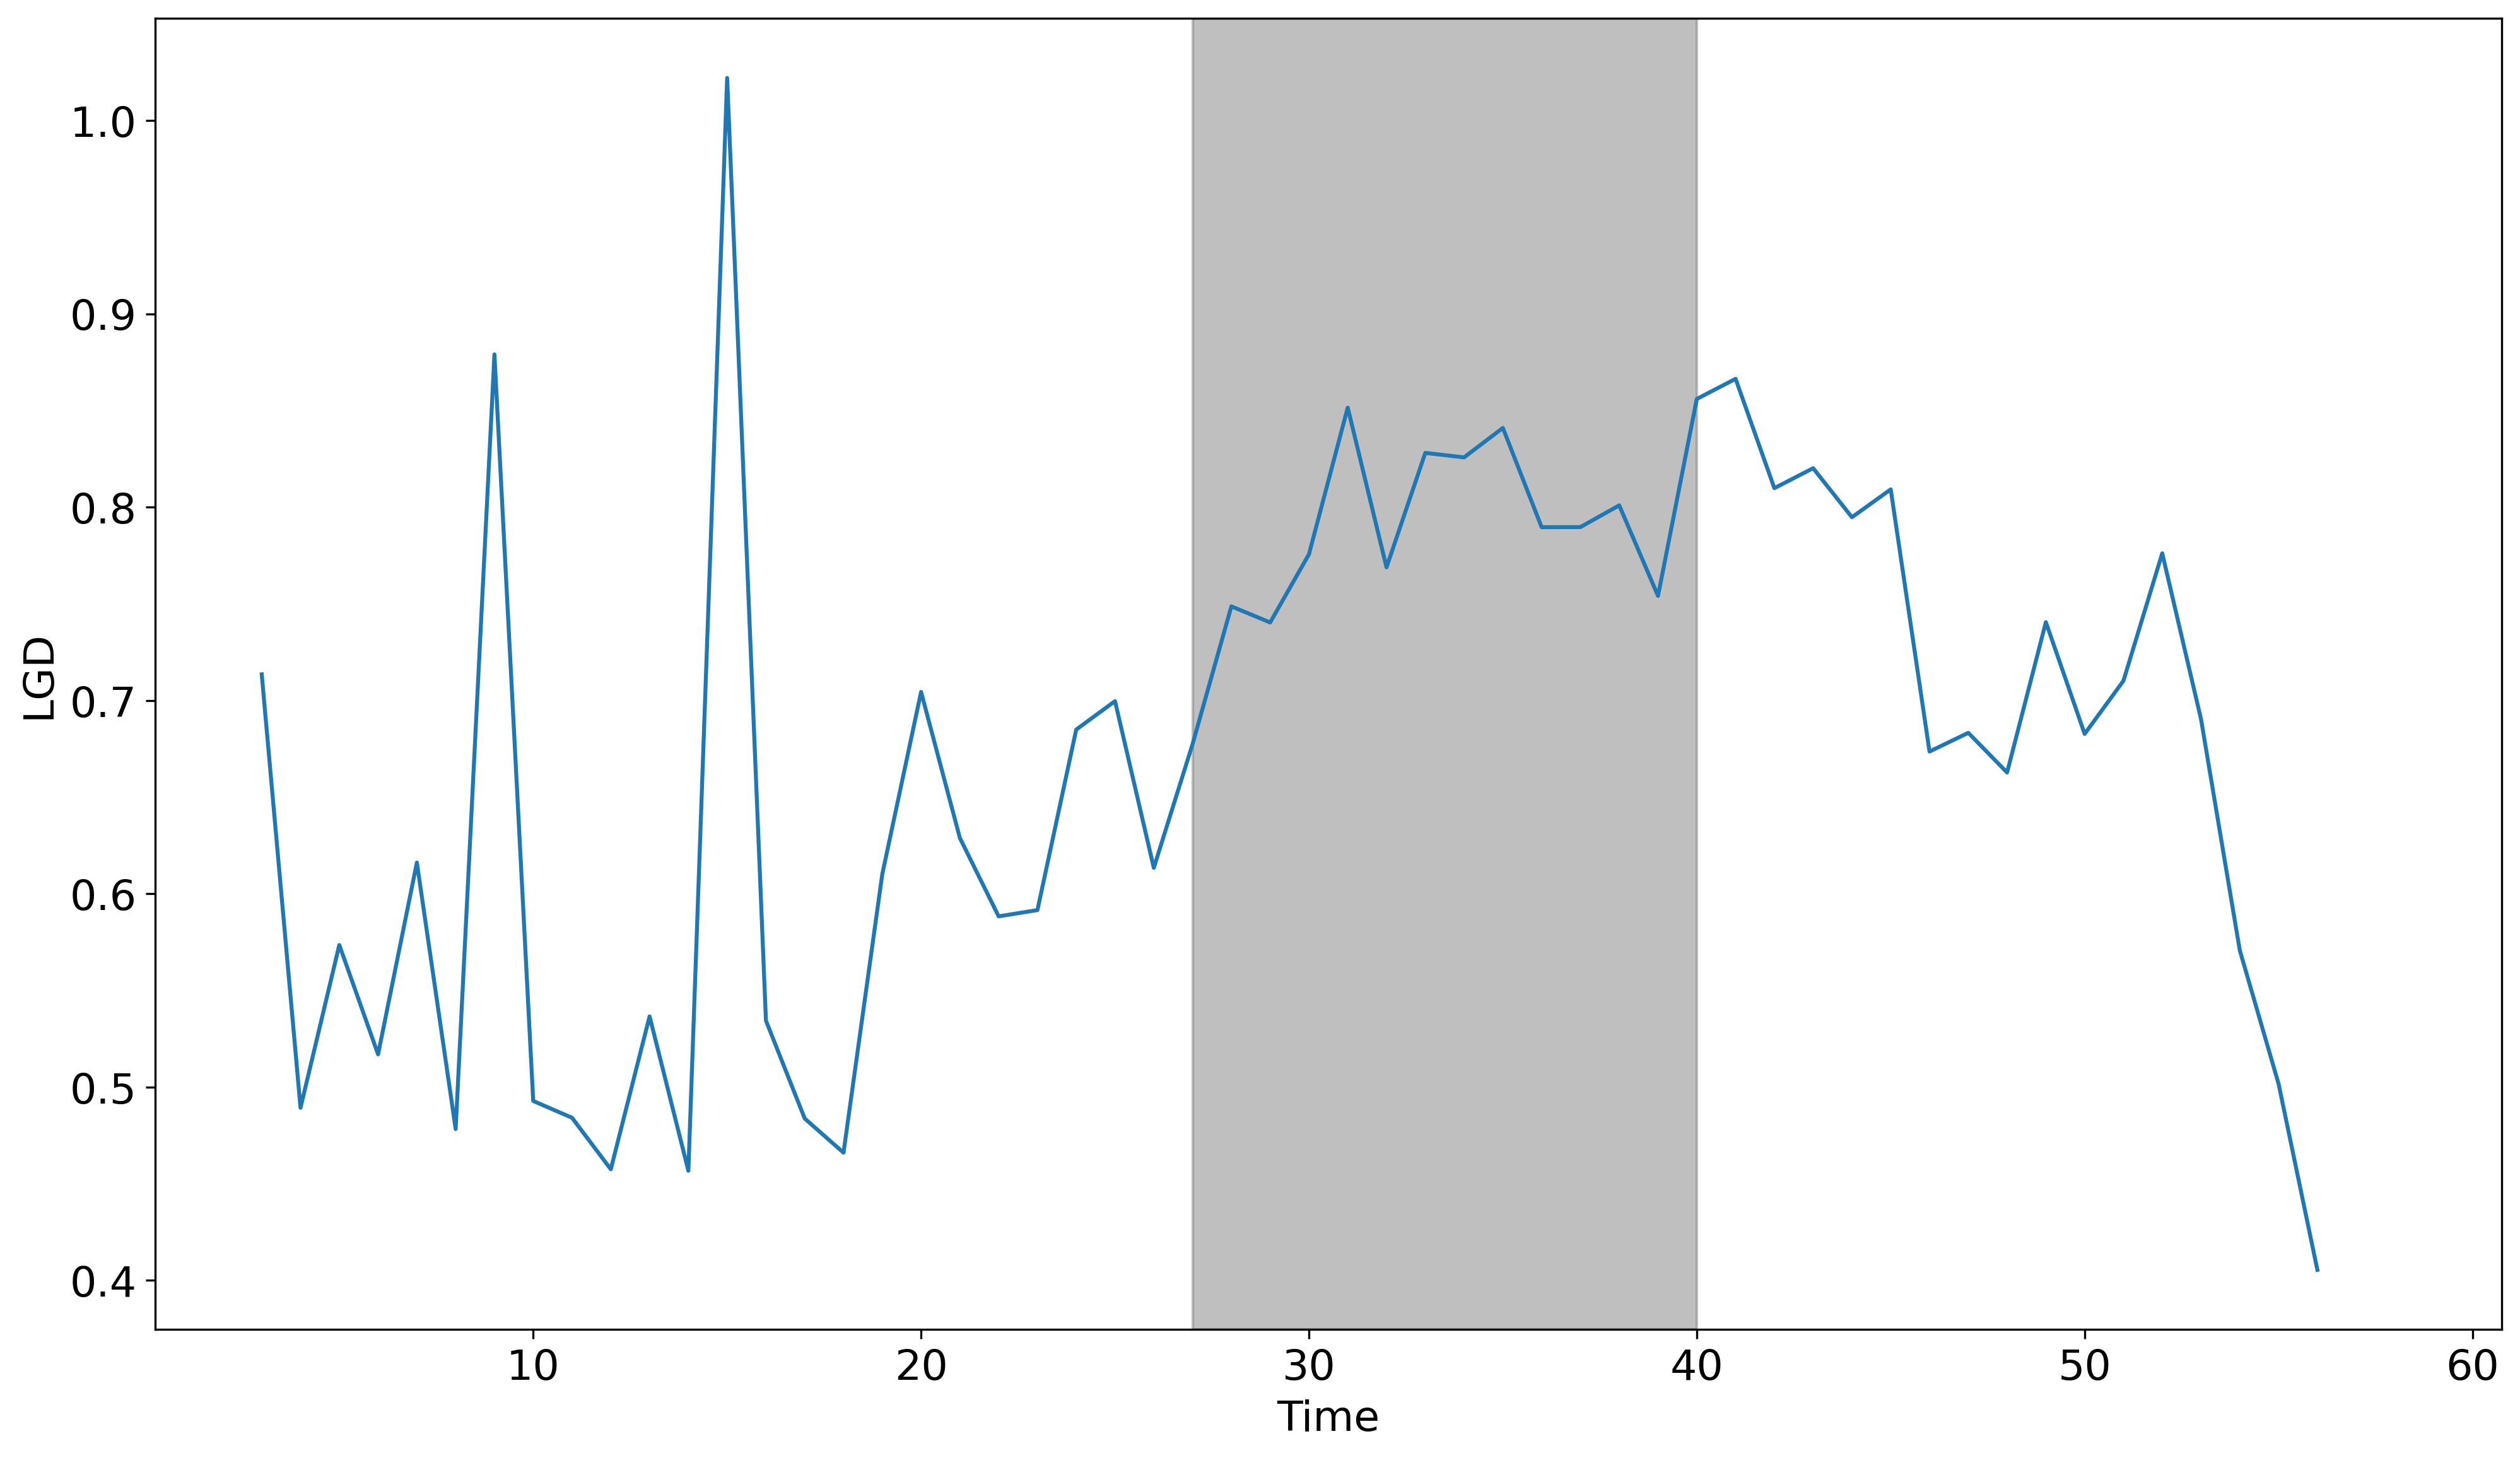

In [70]:
plt.plot('time','LGD', data=LGD_mean)
plt.axvspan(27, 40, color="grey", alpha=0.5)
plt.xlabel('Time')
plt.ylabel('LGD')
plt.show()

### Resolution bias
We use the resolution bias

In [71]:
data_default_R = resolutionbias(data_default1, 'LGD', 'res_time', 'time')

In [72]:
data_default_R

FICO_orig_time  FICO_orig_time_S  Income_Growth  Interest_Rate_orig_time  \
10              608         -0.912719         -0.001                    7.750   
36              591         -1.149489         -0.001                    6.550   
88              694          0.285061          0.037                    6.990   
224             700          0.368627          0.077                    7.550   
244             750          1.065011          0.077                    4.000   
..              ...               ...            ...                      ...   
357             507         -2.319414         -0.020                    0.000   
358             730          0.786457          0.022                    5.875   
359             536         -1.915511         -0.054                    0.000   
360             550         -1.720524          0.038                    0.000   
361             639         -0.480961          0.050                    0.000   

          LGD  LTV_orig_time  LTV_orig_time_S    LTV_time  \
10   0.806261           80.0         0.127635   75.161401   
36   0.634966           80.0         0.127635   80.205740   
88   0.777912           62.8        -1.552828   90.764952   
224  0.576923           80.0         0.127635  113.859383   
244  0.564183          100.0         2.081662  135.146427   
..        ...            ...              ...         ...   
357  0.919805           90.0         1.104648   81.876183   
358  0.919805           85.0         0.616142   69.856425   
359  0.919805           64.2        -1.416046   54.614973   
360  0.919805           70.0        -0.849378   57.858465   
361  0.919805           80.0         0.127635   60.532860   

     REtype_CO_orig_time  REtype_PU_orig_time  ...  payoff_time rate_time  \
10                     0                    0  ...            0      3.94   
36                     0                    0  ...            0      5.15   
88                     0                    0  ...            0      4.71   
224                    0                    0  ...            0      4.64   
244                    0                    0  ...            0      5.15   
..                   ...                  ...  ...          ...       ...   
357                    0                    0  ...            0      4.24   
358                    0                    0  ...            0      4.62   
359                    0                    0  ...            0      4.24   
360                    0                    0  ...            0      4.14   
361                    0                    0  ...            0      3.83   

     recovery_res  res_period_x  res_period_y  res_time  status_time  time  \
10       33818.55           NaN           NaN      42.0            1    28   
36       63680.93           NaN           NaN      32.0            1    26   
88      323905.00           NaN           NaN      45.0            1    36   
224     183948.09           NaN           NaN      42.0            1    39   
244     151930.90           NaN           NaN      47.0            1    40   
..            ...           ...           ...       ...          ...   ...   
357      88184.78           NaN           1.0       NaN            1    21   
358     409016.06           NaN           1.0       NaN            1    22   
359      57475.17           NaN           1.0       NaN            1    24   
360      21808.50           NaN           1.0       NaN            1    24   
361      92000.00           NaN           1.0       NaN            1    19   

     time_year  uer_time  
10        2007       4.6  
36        2007       4.7  
88        2009       7.8  
224       2010      10.0  
244       2010       9.8  
..         ...       ...  
357       2006       5.2  
358       2006       5.0  
359       2006       4.7  
360       2006       4.7  
361       2005       5.5  

[1516 rows x 35 columns]

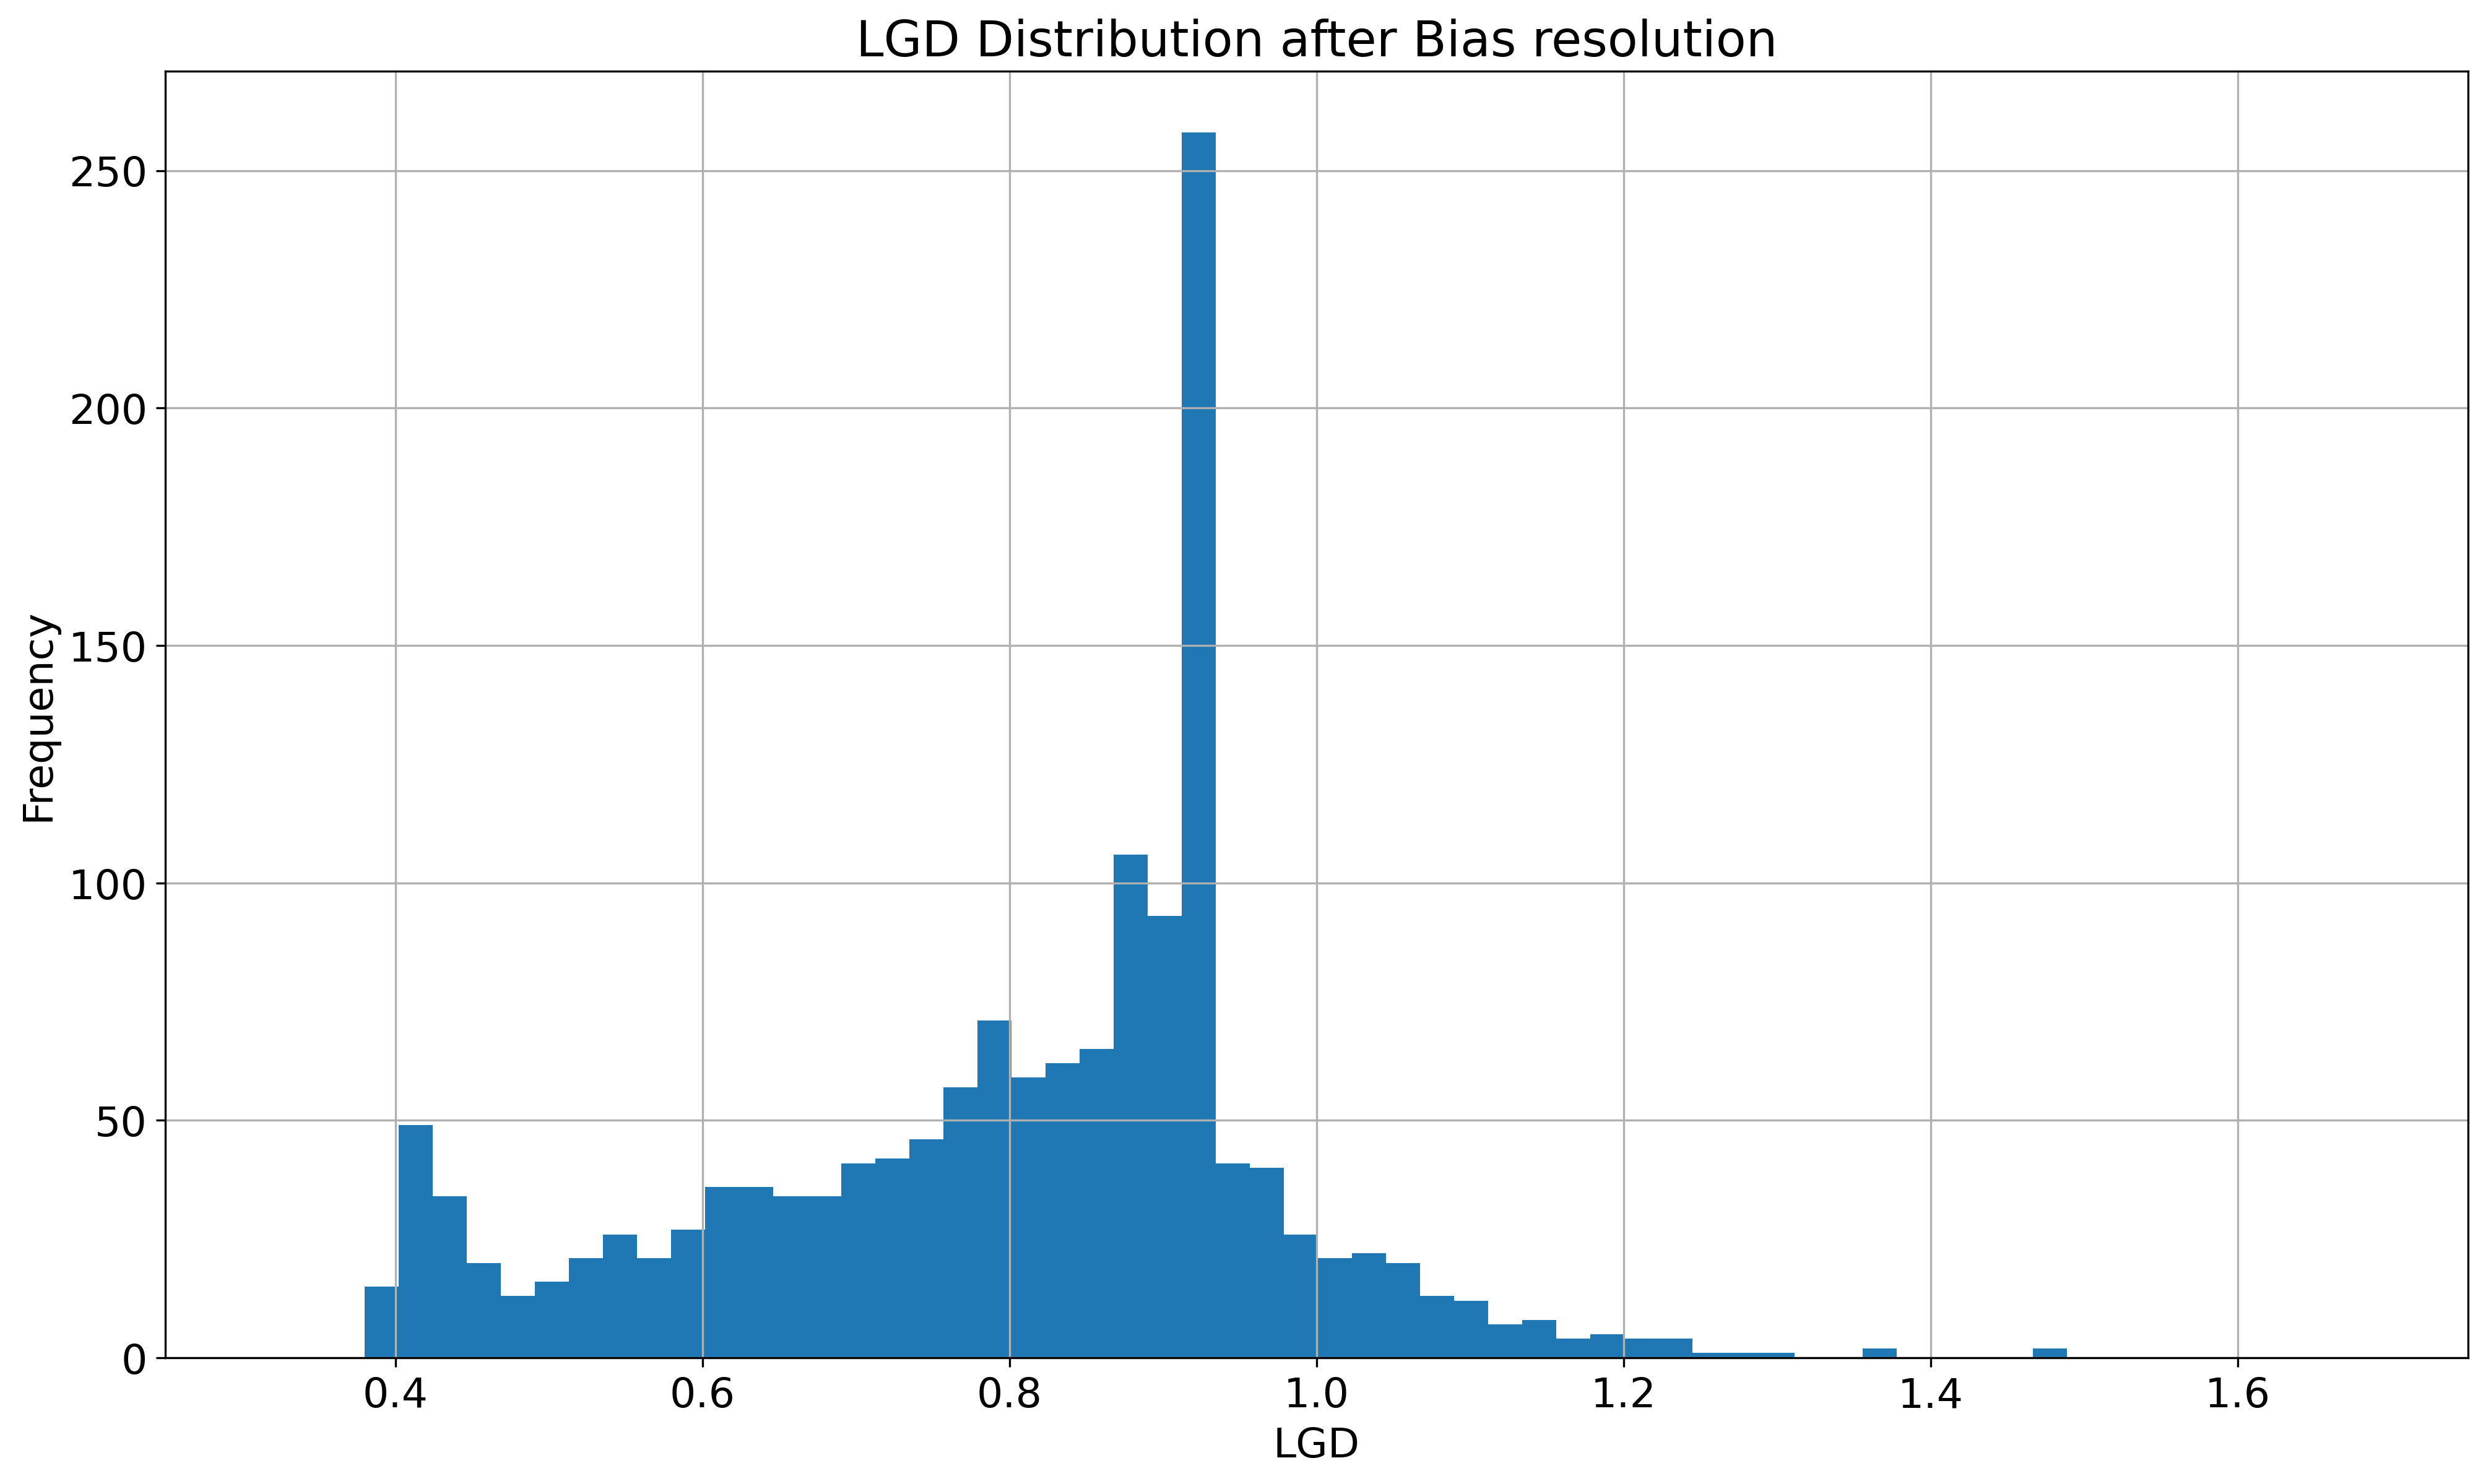

In [73]:
data_default_R.LGD.hist(bins=50)
xlim((0.25, 1.75))
plt.title('LGD Distribution after Bias resolution')
plt.xlabel('LGD')
plt.ylabel('Frequency')
plt.show()

The decline of 40% in house prices for all future periods and no repayment of the outstanding amount could have a great impact on the loss-given default (LGD). Firstly, a substantial drop in house prices implies that the collateral (property) will lose a big portion of its value. Consequently, we see higher LGD with an average of 77%, which means that the lender is expecting to recover only 23% of the loan value if the borrower defaults. In addition, the histogram below shows a reduction in the recovery amount, so in the event of a default, the best-case scenario only recovering 63% of the total value of the loan and in some cases, the bank can lose as much as 140%. This scenario highlights the importance of financial institutions in assessing risk having in mind challenging economic conditions.

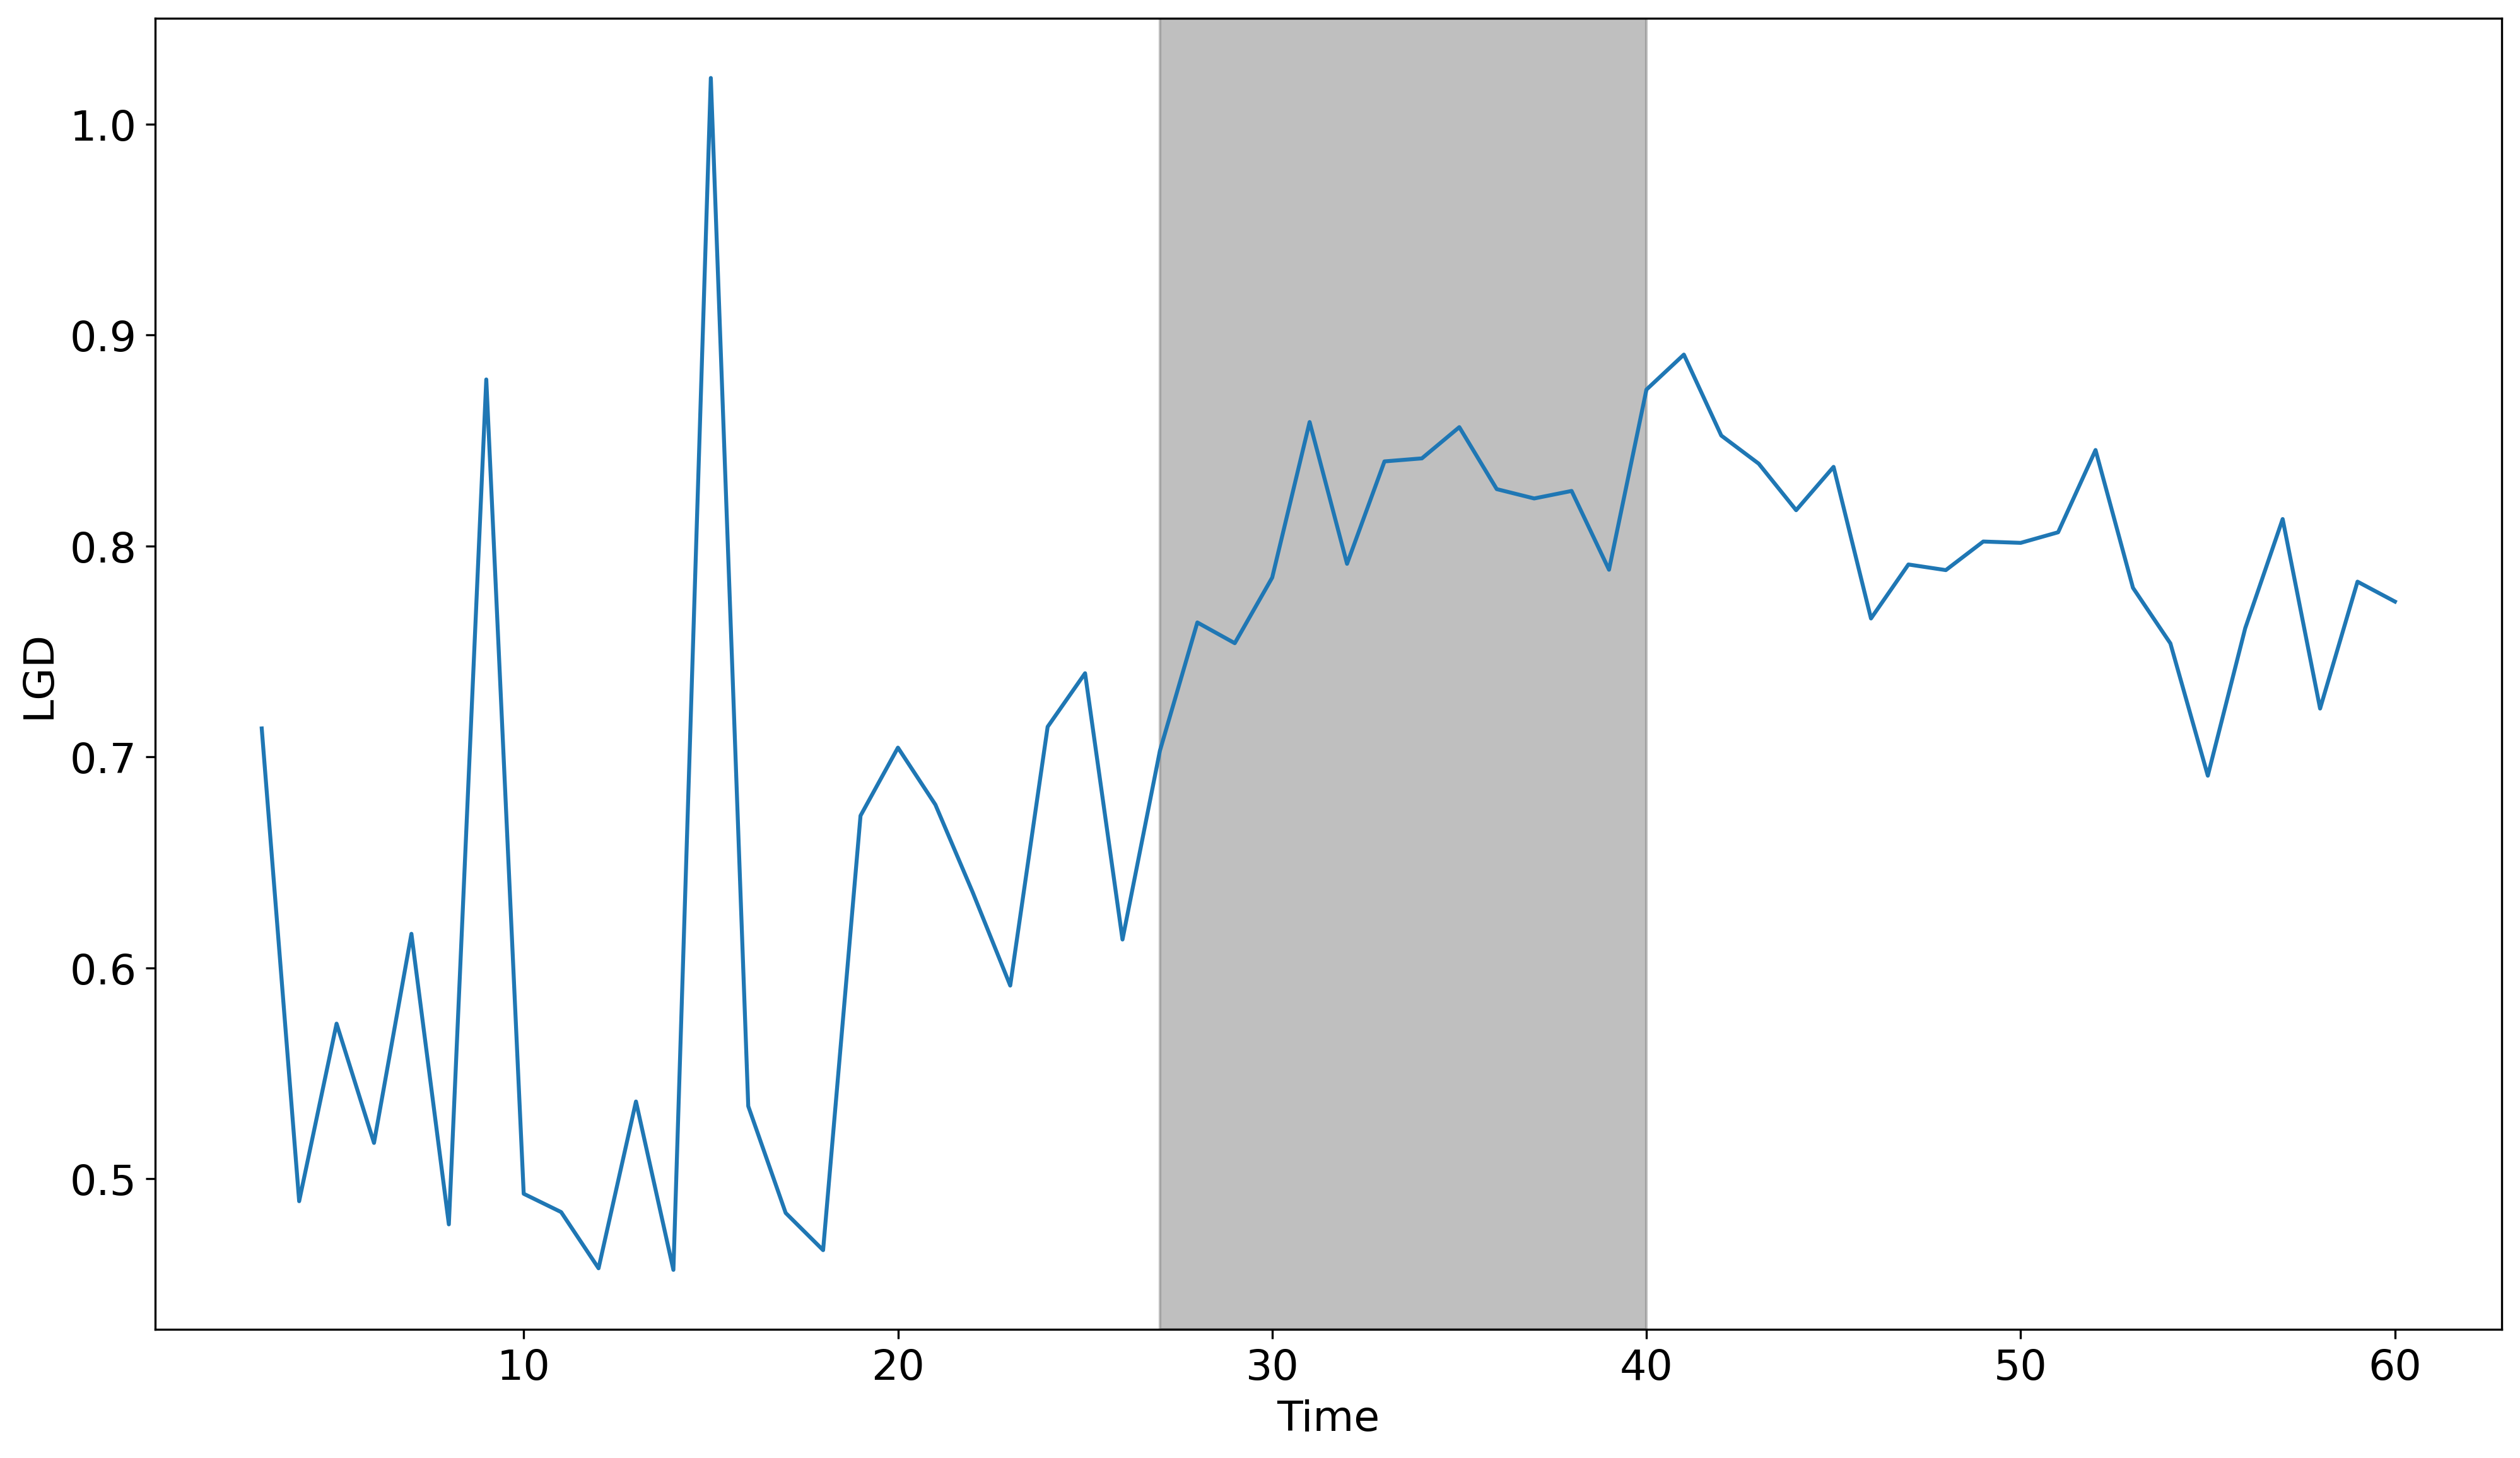

In [74]:
LGD_mean=data_default_R.groupby('time')[['LGD']].mean().reset_index(drop=False)

plt.plot('time','LGD', data=LGD_mean)
plt.axvspan(27, 40, color="grey", alpha=0.5)
plt.xlabel('Time')
plt.ylabel('LGD')
plt.show()

### 3-B

Run a linear regression model to predict LGD. Include the same set of explanatory variables used in the question 2b. Compute the estimated LGD for all mortgage loans and periods. Plot the average LGD by period. Provide your code, output, plot and interpret the output economically.

In [75]:
data_default_R.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516 entries, 10 to 361
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FICO_orig_time           1516 non-null   int64  
 1   FICO_orig_time_S         1516 non-null   float64
 2   Income_Growth            1516 non-null   float64
 3   Interest_Rate_orig_time  1516 non-null   float64
 4   LGD                      1516 non-null   float64
 5   LTV_orig_time            1516 non-null   float64
 6   LTV_orig_time_S          1516 non-null   float64
 7   LTV_time                 1515 non-null   float64
 8   REtype_CO_orig_time      1516 non-null   int64  
 9   REtype_PU_orig_time      1516 non-null   int64  
 10  REtype_SF_orig_time      1516 non-null   int64  
 11  State                    1516 non-null   object 
 12  balance_orig_time        1516 non-null   float64
 13  balance_time             1516 non-null   float64
 14  default_time            

In [76]:
# Define the dependent variable (target variable) and independent variables (predictors)
y = data_default_R['LGD']  
X = data_default_R[[ 'LGD','FICO_orig_time_S', 'LTV_orig_time_S', 'Income_Growth','time']]  

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
linear_model = smf.ols(formula='LGD ~  FICO_orig_time_S + LTV_orig_time_S + Income_Growth' ,
                data=data_default_R)

# Fit the model on the training set
linear_results_4 = linear_model.fit(data=X_train)

#Model summary
linear_results_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LGD   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.549
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           0.000213
Time:                        14:17:18   Log-Likelihood:                 445.12
No. Observations:                1516   AIC:                            -882.2
Df Residuals:                    1512   BIC:                            -860.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8013      0.005    157.833      0.000       0.791       0.811
FICO_orig_time_S    -0.0037      0.005     -0.728      0.467      -0.013       0.006
LTV_orig_time_S     -0.0014      0.005     -0.267      0.789      -0.012       0.009
Income_Growth       -0.4993      0.114     -4.391      0.000      -0.722      -0.276
==============================================================================
Omnibus:                       34.199   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.100
Skew:                          -0.378   Prob(JB):                     1.45e-08
Kurtosis:                       3.029   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When evaluating the accuracy of this LGD model we found  r2 not to be the best result but if compared with the literature, r2 in general tends to be low for LGD models. In addition, with the model proposed we found that the only significant variable in t in predicting LGD is Income_Growth with a p-value (0.000) and with a negative relationship of (-0.499), which means that a decrease in the income growth leads to an increase of the LGD.

In [77]:
# Calculate in-sample predicted LGD using fittedvalues
LGD_linear_train = pd.DataFrame(linear_results_4.fittedvalues, columns=['LGD_pred_train'])

# Merge the predictions with the original data for the in-sample
data_train = pd.merge(X_train, LGD_linear_train, left_index=True, right_index=True)


data_train

LGD  FICO_orig_time_S  LTV_orig_time_S  Income_Growth  time  \
0      0.919805         -1.205200         2.970744          0.037    34   
1      0.919805         -1.274838         0.127635         -0.063    34   
2      0.919805          0.257206         0.127635          0.017    34   
3      0.919805          0.758602        -0.429262          0.017    34   
4      0.919805         -0.439178         0.127635          0.003    34   
...         ...               ...              ...            ...   ...   
60932  0.935663          1.106794         0.127635          0.052    52   
61083  0.406851         -1.901583        -0.360871         -0.015    17   
61213  0.449798         -1.915511         2.277064         -0.037    35   
61273  0.413884         -0.954502         1.104648         -0.034    40   
61280  0.455531         -2.653678         1.935110          0.024    44   

       LGD_pred_train  
0            0.782937  
1            0.837238  
2            0.791701  
3            0.790677  
4            0.801235  
...               ...  
60932        0.771124  
61083        0.816272  
61213        0.823482  
61273        0.820173  
61280        0.796220  

[1222 rows x 6 columns]

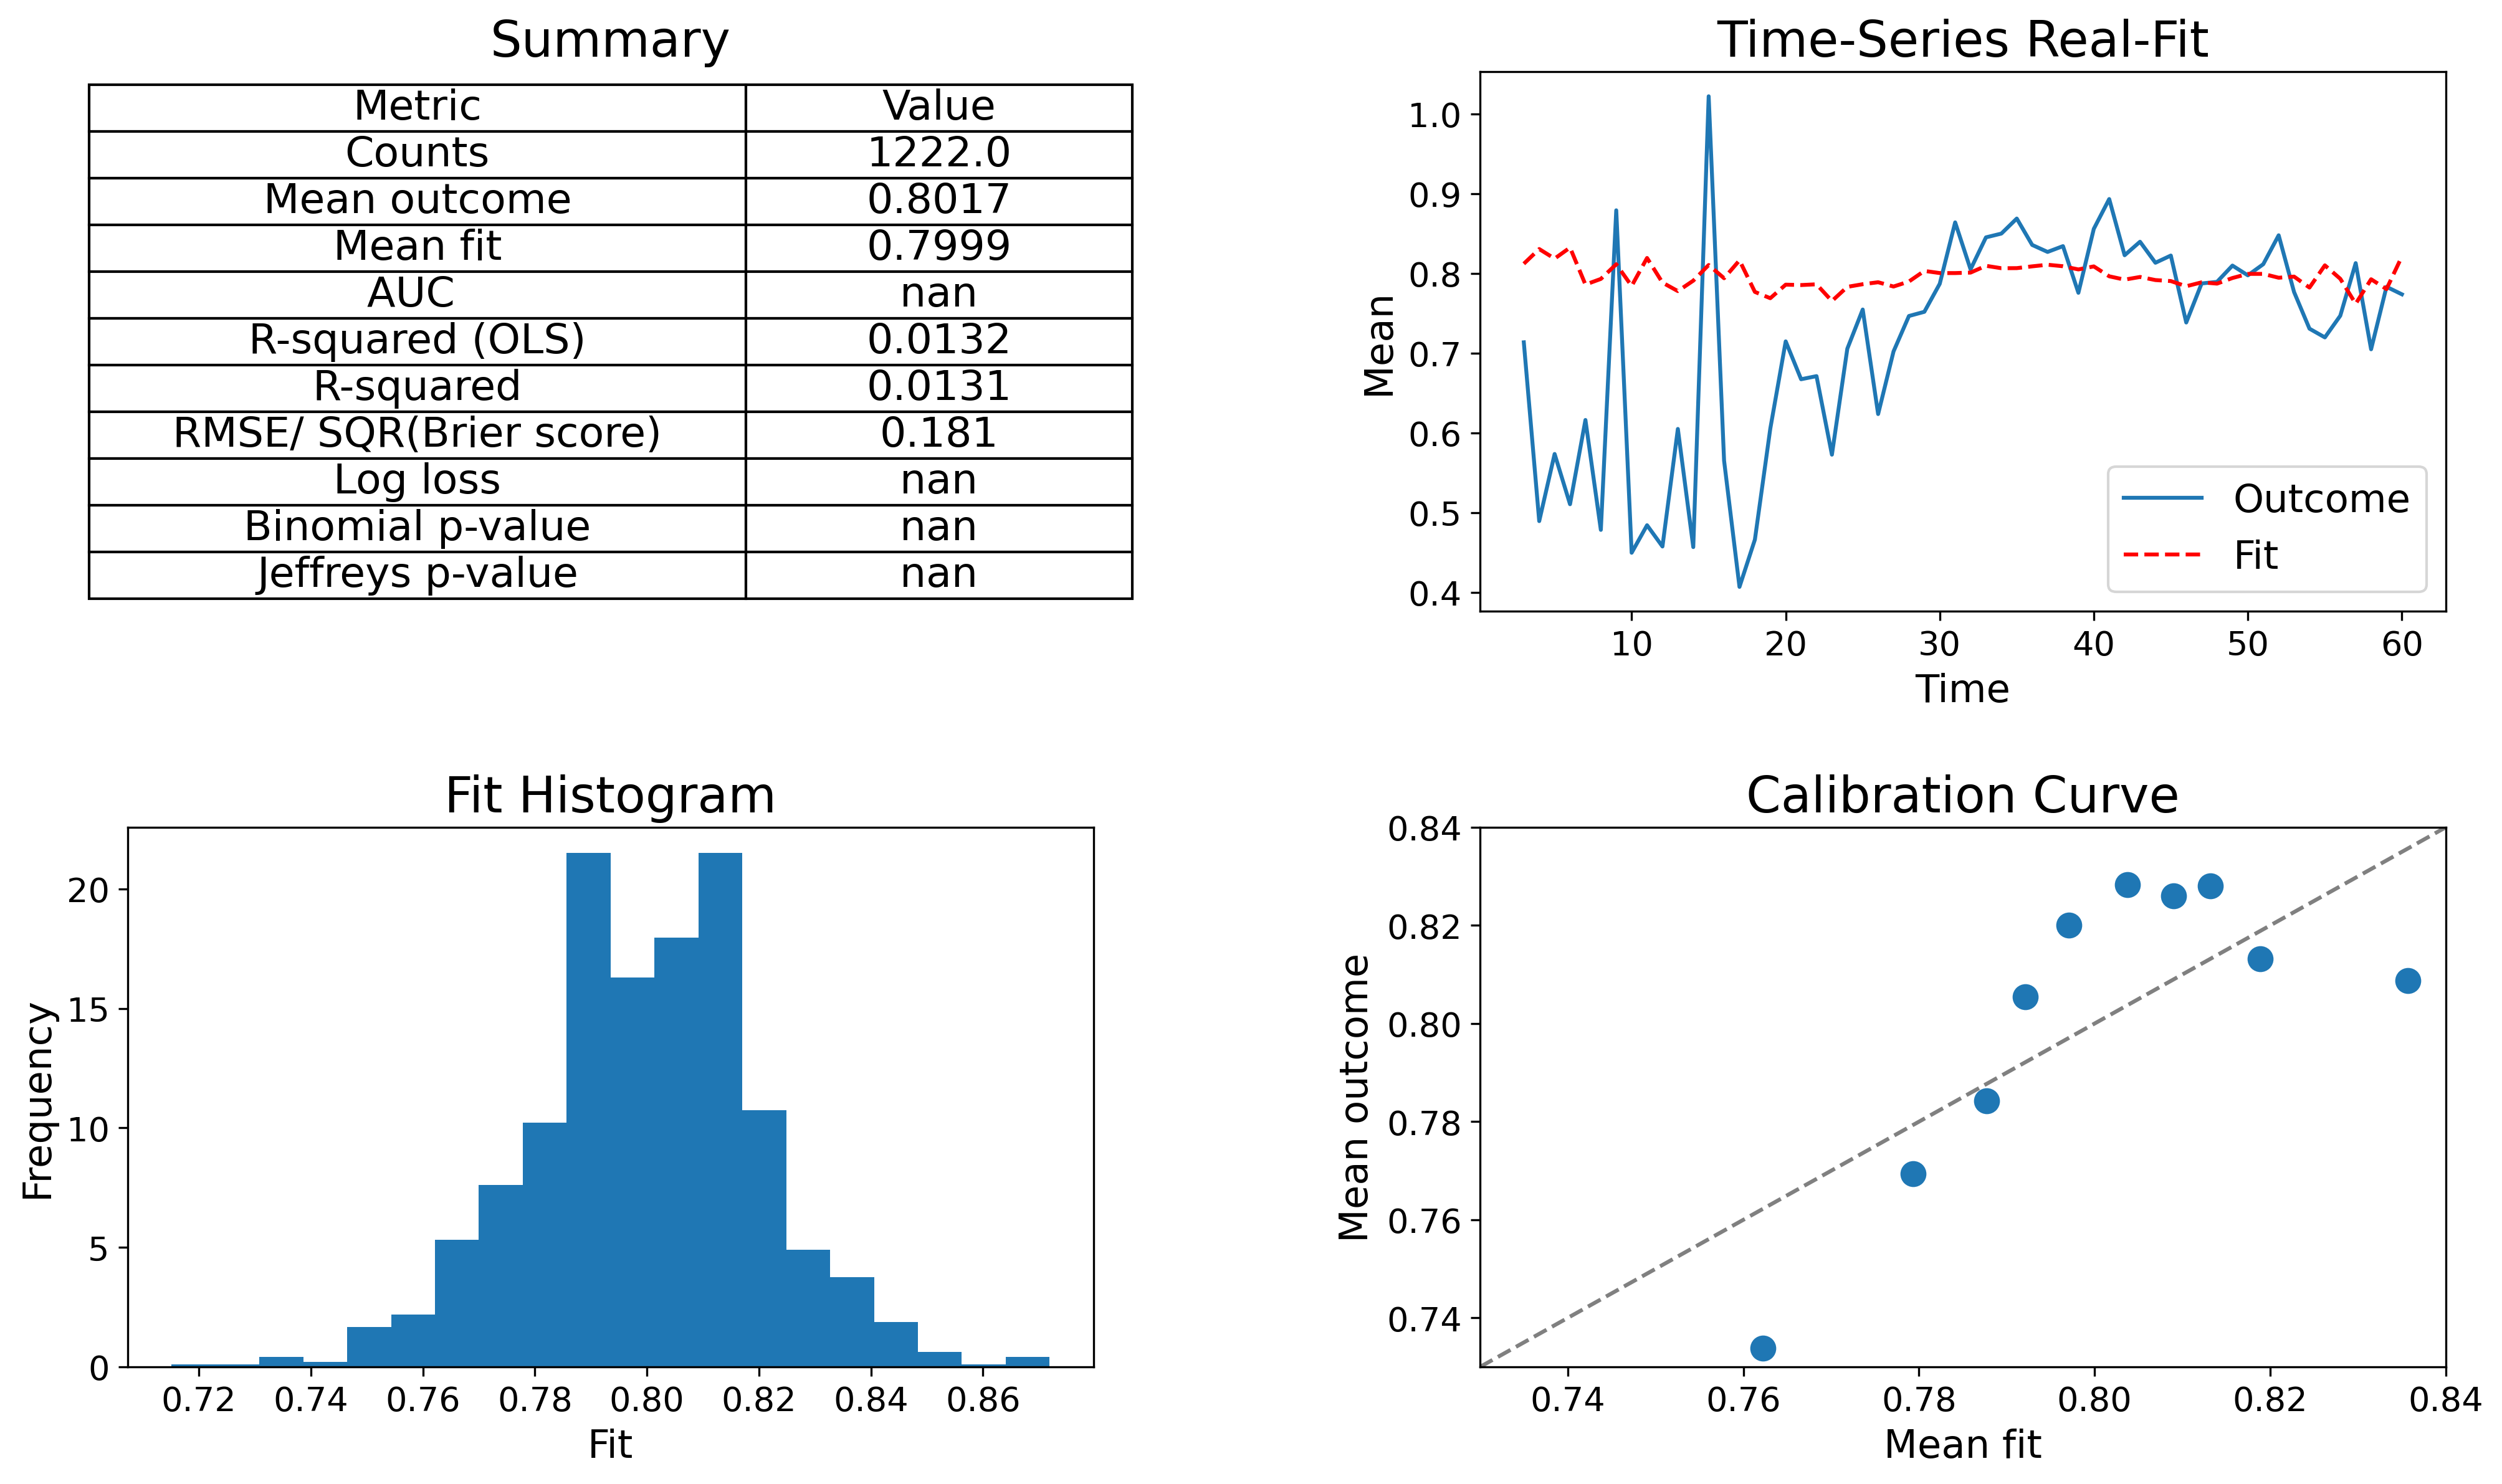

In [78]:
validation(data_train.LGD_pred_train, data_train.LGD, data_train.time)

In [79]:
# Calculate out-sample predict LGS
LGD_linear4=pd.DataFrame(linear_results_4.predict(X_test), columns=['LGD_pred_Test'])
data6=pd.merge(data_default_R,LGD_linear4, right_index=True, left_index=True)

data6

FICO_orig_time  FICO_orig_time_S  Income_Growth  \
7                 640         -0.467033         -0.015   
9                 638         -0.494888         -0.015   
10                608         -0.912719         -0.001   
10                643         -0.425250         -0.005   
12                668         -0.077058         -0.008   
...               ...               ...            ...   
60107             717          0.605398         -0.065   
60319             611         -0.870936         -0.066   
60663             810          1.900671         -0.014   
60770             755          1.134649          0.071   
61220             702          0.396483          0.021   

       Interest_Rate_orig_time       LGD  LTV_orig_time  LTV_orig_time_S  \
7                        7.250  0.919805           77.2        -0.145929   
9                        0.000  0.919805           83.9         0.508670   
10                       7.750  0.806261           80.0         0.127635   
10                       7.500  0.919805           72.6        -0.595355   
12                      10.150  0.919805          100.0         2.081662   
...                        ...       ...            ...              ...   
60107                    0.000  0.731650           80.0         0.127635   
60319                    7.875  0.641139           80.0         0.127635   
60663                    6.725  0.746700           65.0        -1.337885   
60770                    6.500  0.729216           80.0         0.127635   
61220                    6.625  0.706477           70.0        -0.849378   

         LTV_time  REtype_CO_orig_time  REtype_PU_orig_time  ...  rate_time  \
7       99.937205                    0                    0  ...       5.15   
9      107.110459                    0                    0  ...       4.71   
10      75.161401                    0                    0  ...       3.94   
10      93.707629                    0                    0  ...       4.86   
12     126.362551                    0                    0  ...       4.39   
...           ...                  ...                  ...  ...        ...   
60107  123.894037                    0                    1  ...       4.71   
60319  101.360587                    0                    0  ...       4.86   
60663   85.169930                    0                    0  ...       4.64   
60770  110.685898                    0                    0  ...       4.65   
61220   97.358839                    0                    0  ...       5.03   

      recovery_res  res_period_x  res_period_y  res_time  status_time  time  \
7        107623.44           NaN           1.0       NaN            1    34   
9        671077.24           NaN           1.0       NaN            1    34   
10        33818.55           NaN           NaN      42.0            1    28   
10       398999.20           NaN           1.0       NaN            1    34   
12       133259.79           NaN           1.0       NaN            1    34   
...            ...           ...           ...       ...          ...   ...   
60107    147303.58           NaN           NaN      37.0            1    36   
60319     54715.14           NaN           NaN      38.0            1    34   
60663     59007.56           NaN           NaN      54.0            1    51   
60770    237230.95           NaN           NaN      45.0            1    38   
61220    494523.95           NaN           NaN      41.0            1    37   

       time_year  uer_time  LGD_pred_Test  
7           2009       5.8       0.810720  
9           2009       5.8       0.809872  
10          2007       4.6       0.806226  
10          2009       5.8       0.806226  
12          2009       5.8       0.802571  
...          ...       ...            ...  
60107       2009       7.8       0.831368  
60319       2009       5.8       0.837260  
60663       2013       7.8       0.803299  
60770       2010       9.5       0.761536  
61220       201

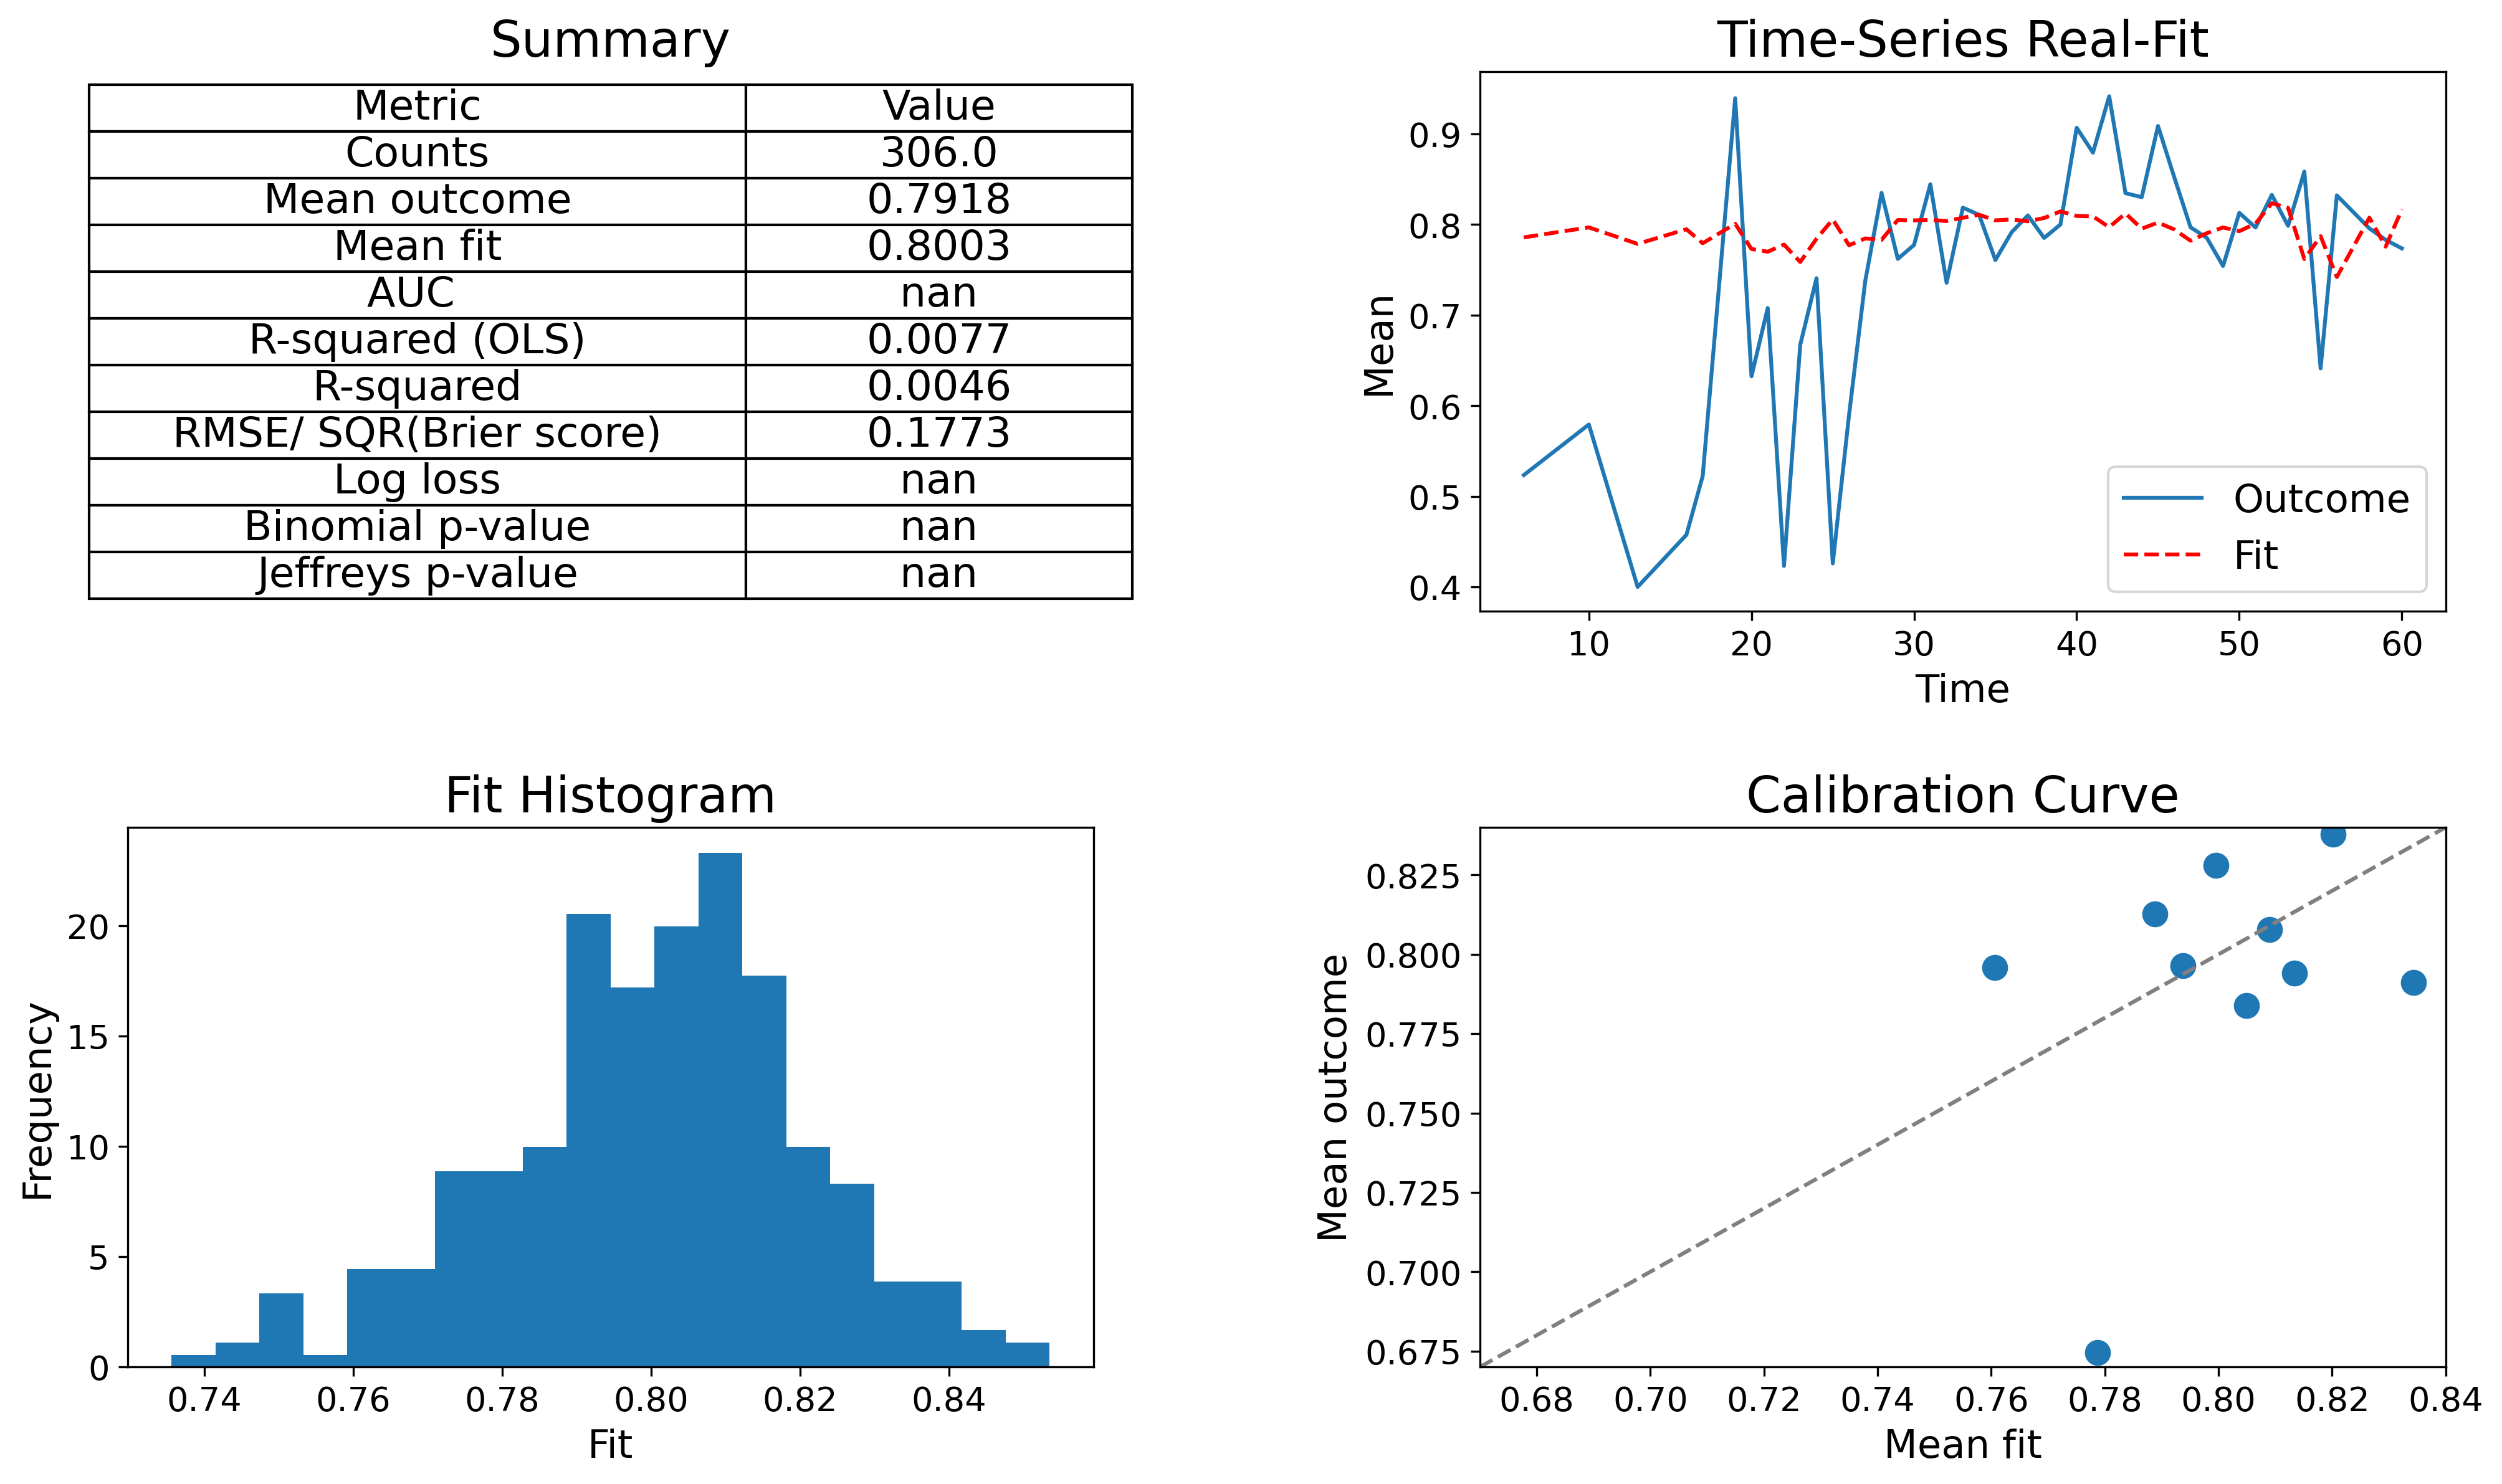

In [81]:
validation(data6.LGD_pred_Test, data6.LGD, data6.time)

In [82]:
#Here we are calculatint the average LGD by period
LGD_data = data6.groupby('time')['LGD_pred_Test'].mean().reset_index(drop=False)

LGD_data

time  LGD_pred_Test
0      6       0.785865
1     10       0.796860
2     13       0.778639
3     16       0.794796
4     17       0.779345
..   ...            ...
41    55       0.787116
42    56       0.742124
43    58       0.807597
44    59       0.775604
45    60       0.816756

[46 rows x 2 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

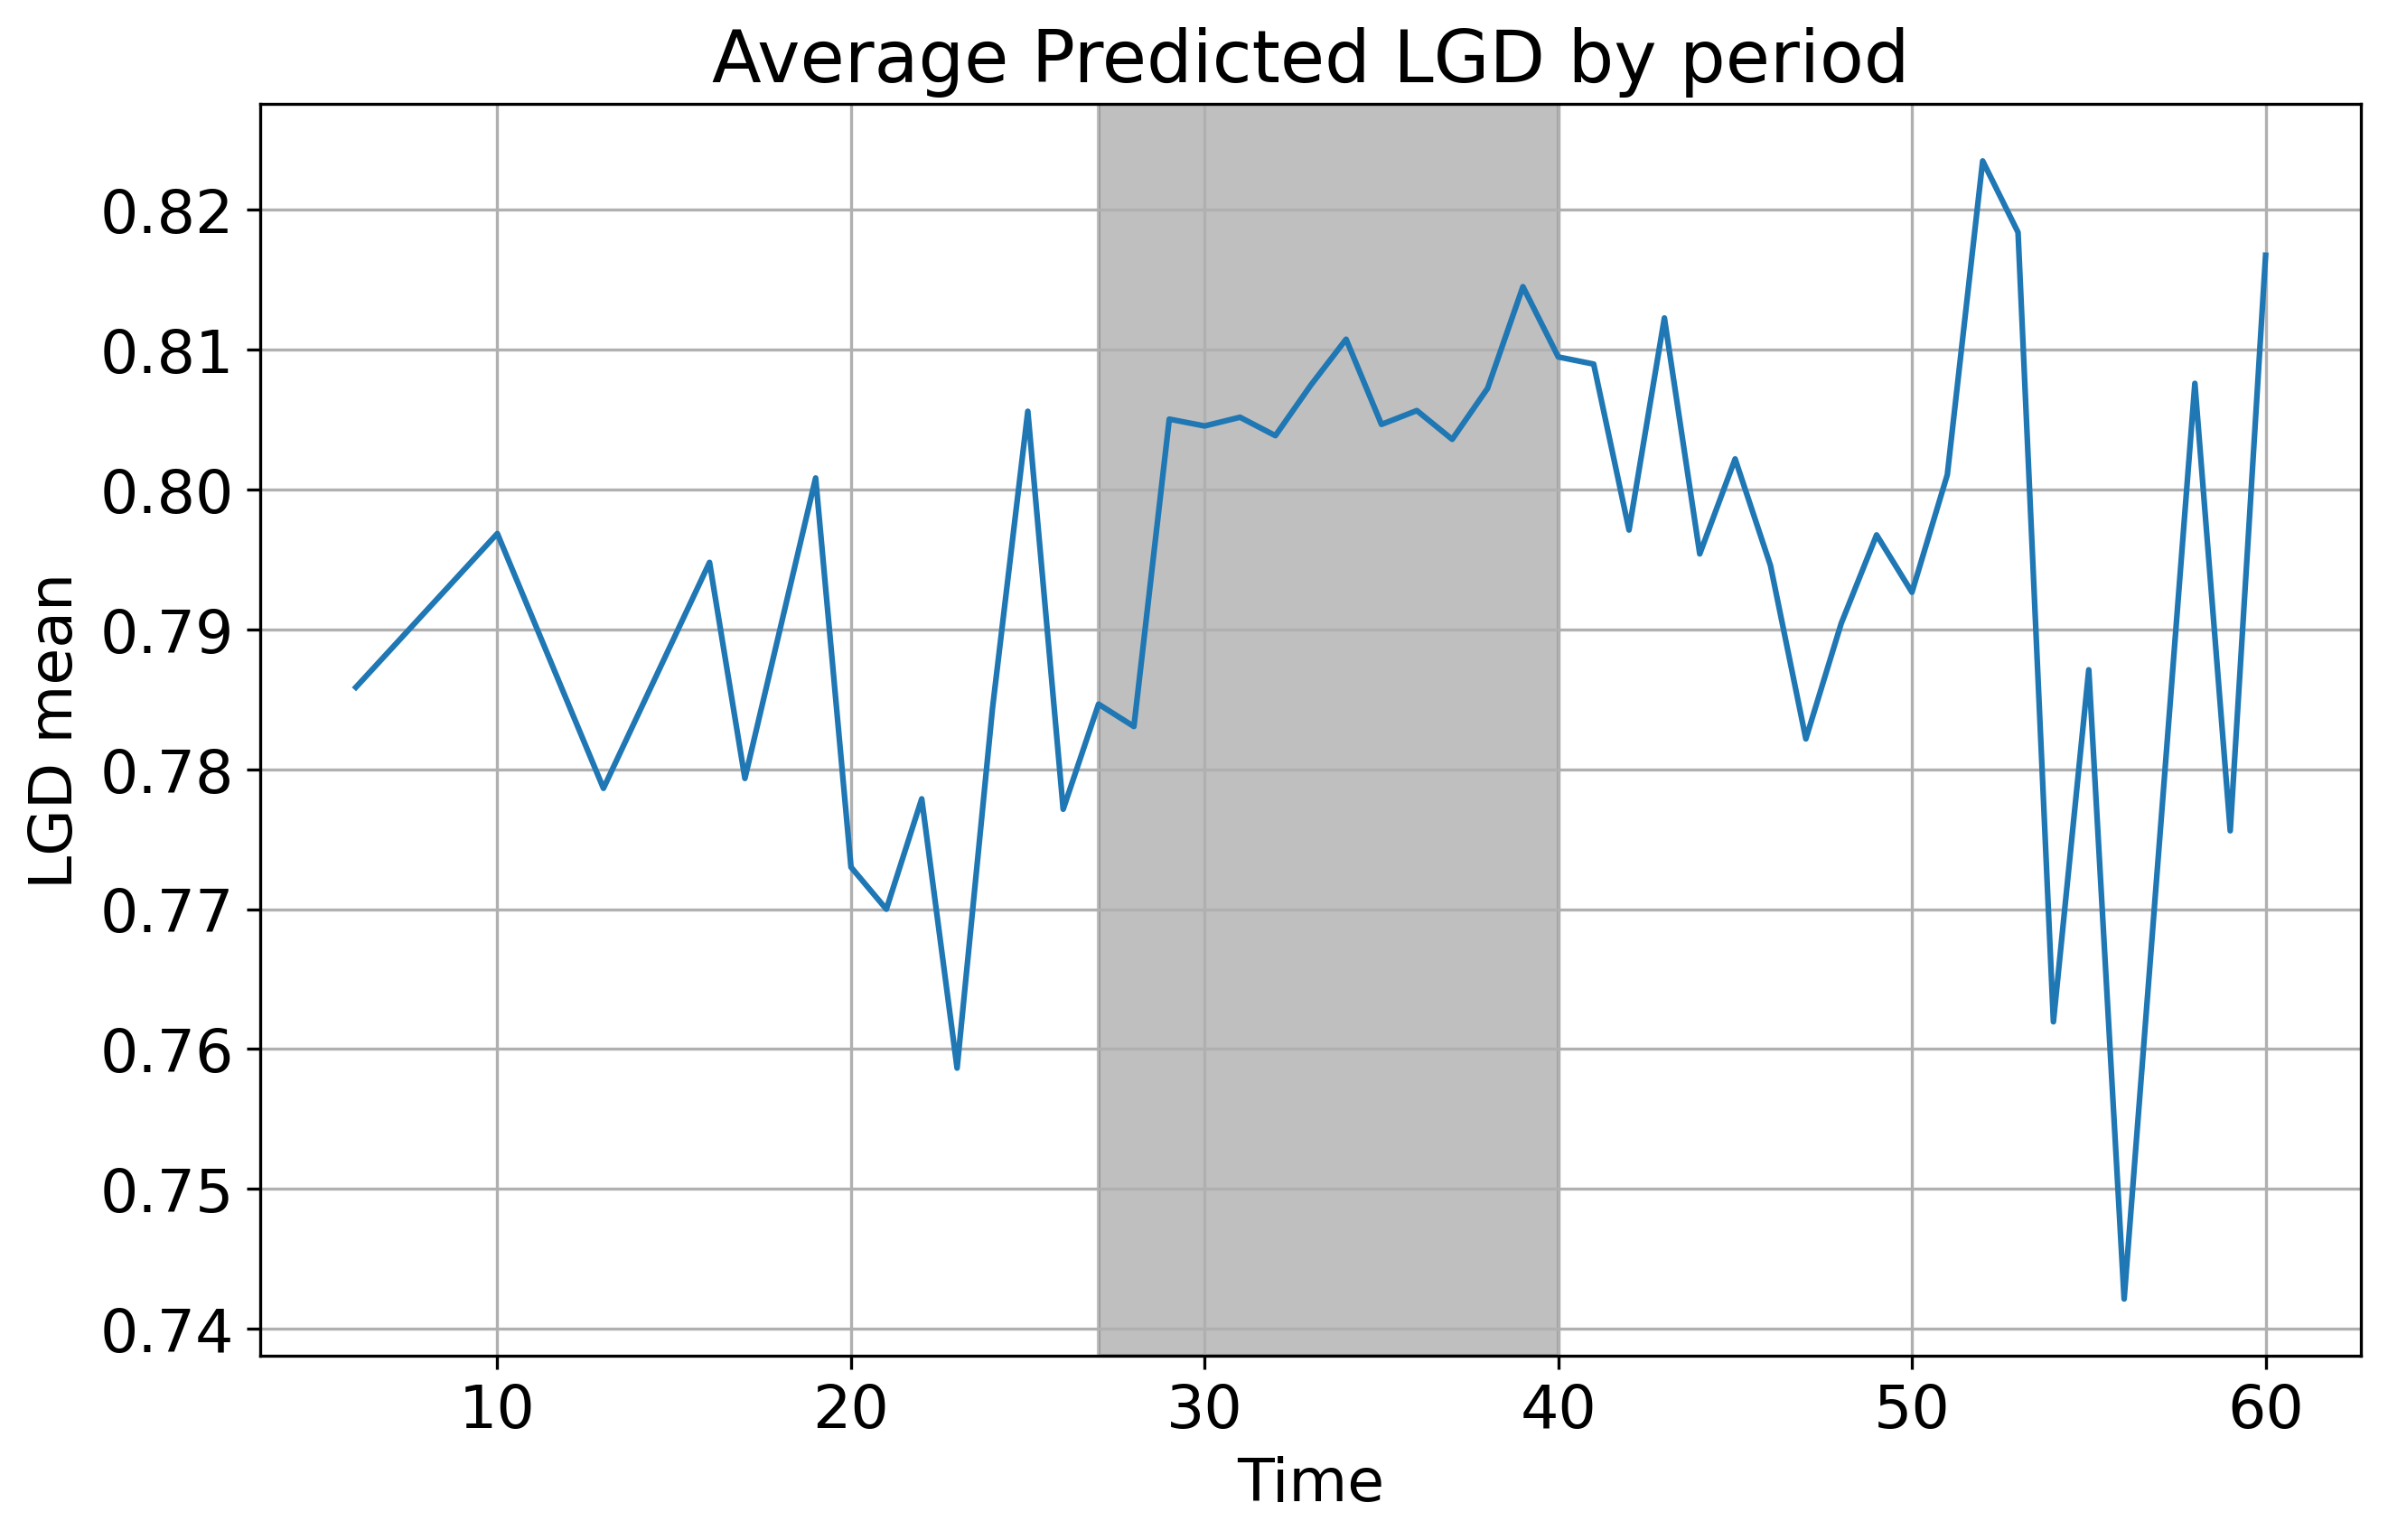

In [83]:
plt.figure(figsize=(10, 6))
plt.plot('time', 'LGD_pred_Test', data=LGD_data) 
plt.axvspan(27, 40, color="grey", alpha=0.5)
plt.title("Average Predicted LGD by period")
plt.xlabel('Time')
plt.ylabel('LGD mean')
plt.grid(True)
plt.show

In [84]:
#Here we are calculatint the average LGD by period
LGD_train = data_train.groupby('time')['LGD_pred_train'].mean().reset_index(drop=False)

LGD_train

time  LGD_pred_train
0      3        0.811991
1      4        0.830426
2      5        0.818413
3      6        0.832286
4      7        0.785887
..   ...             ...
53    56        0.793127
54    57        0.761809
55    58        0.792548
56    59        0.780224
57    60        0.821140

[58 rows x 2 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

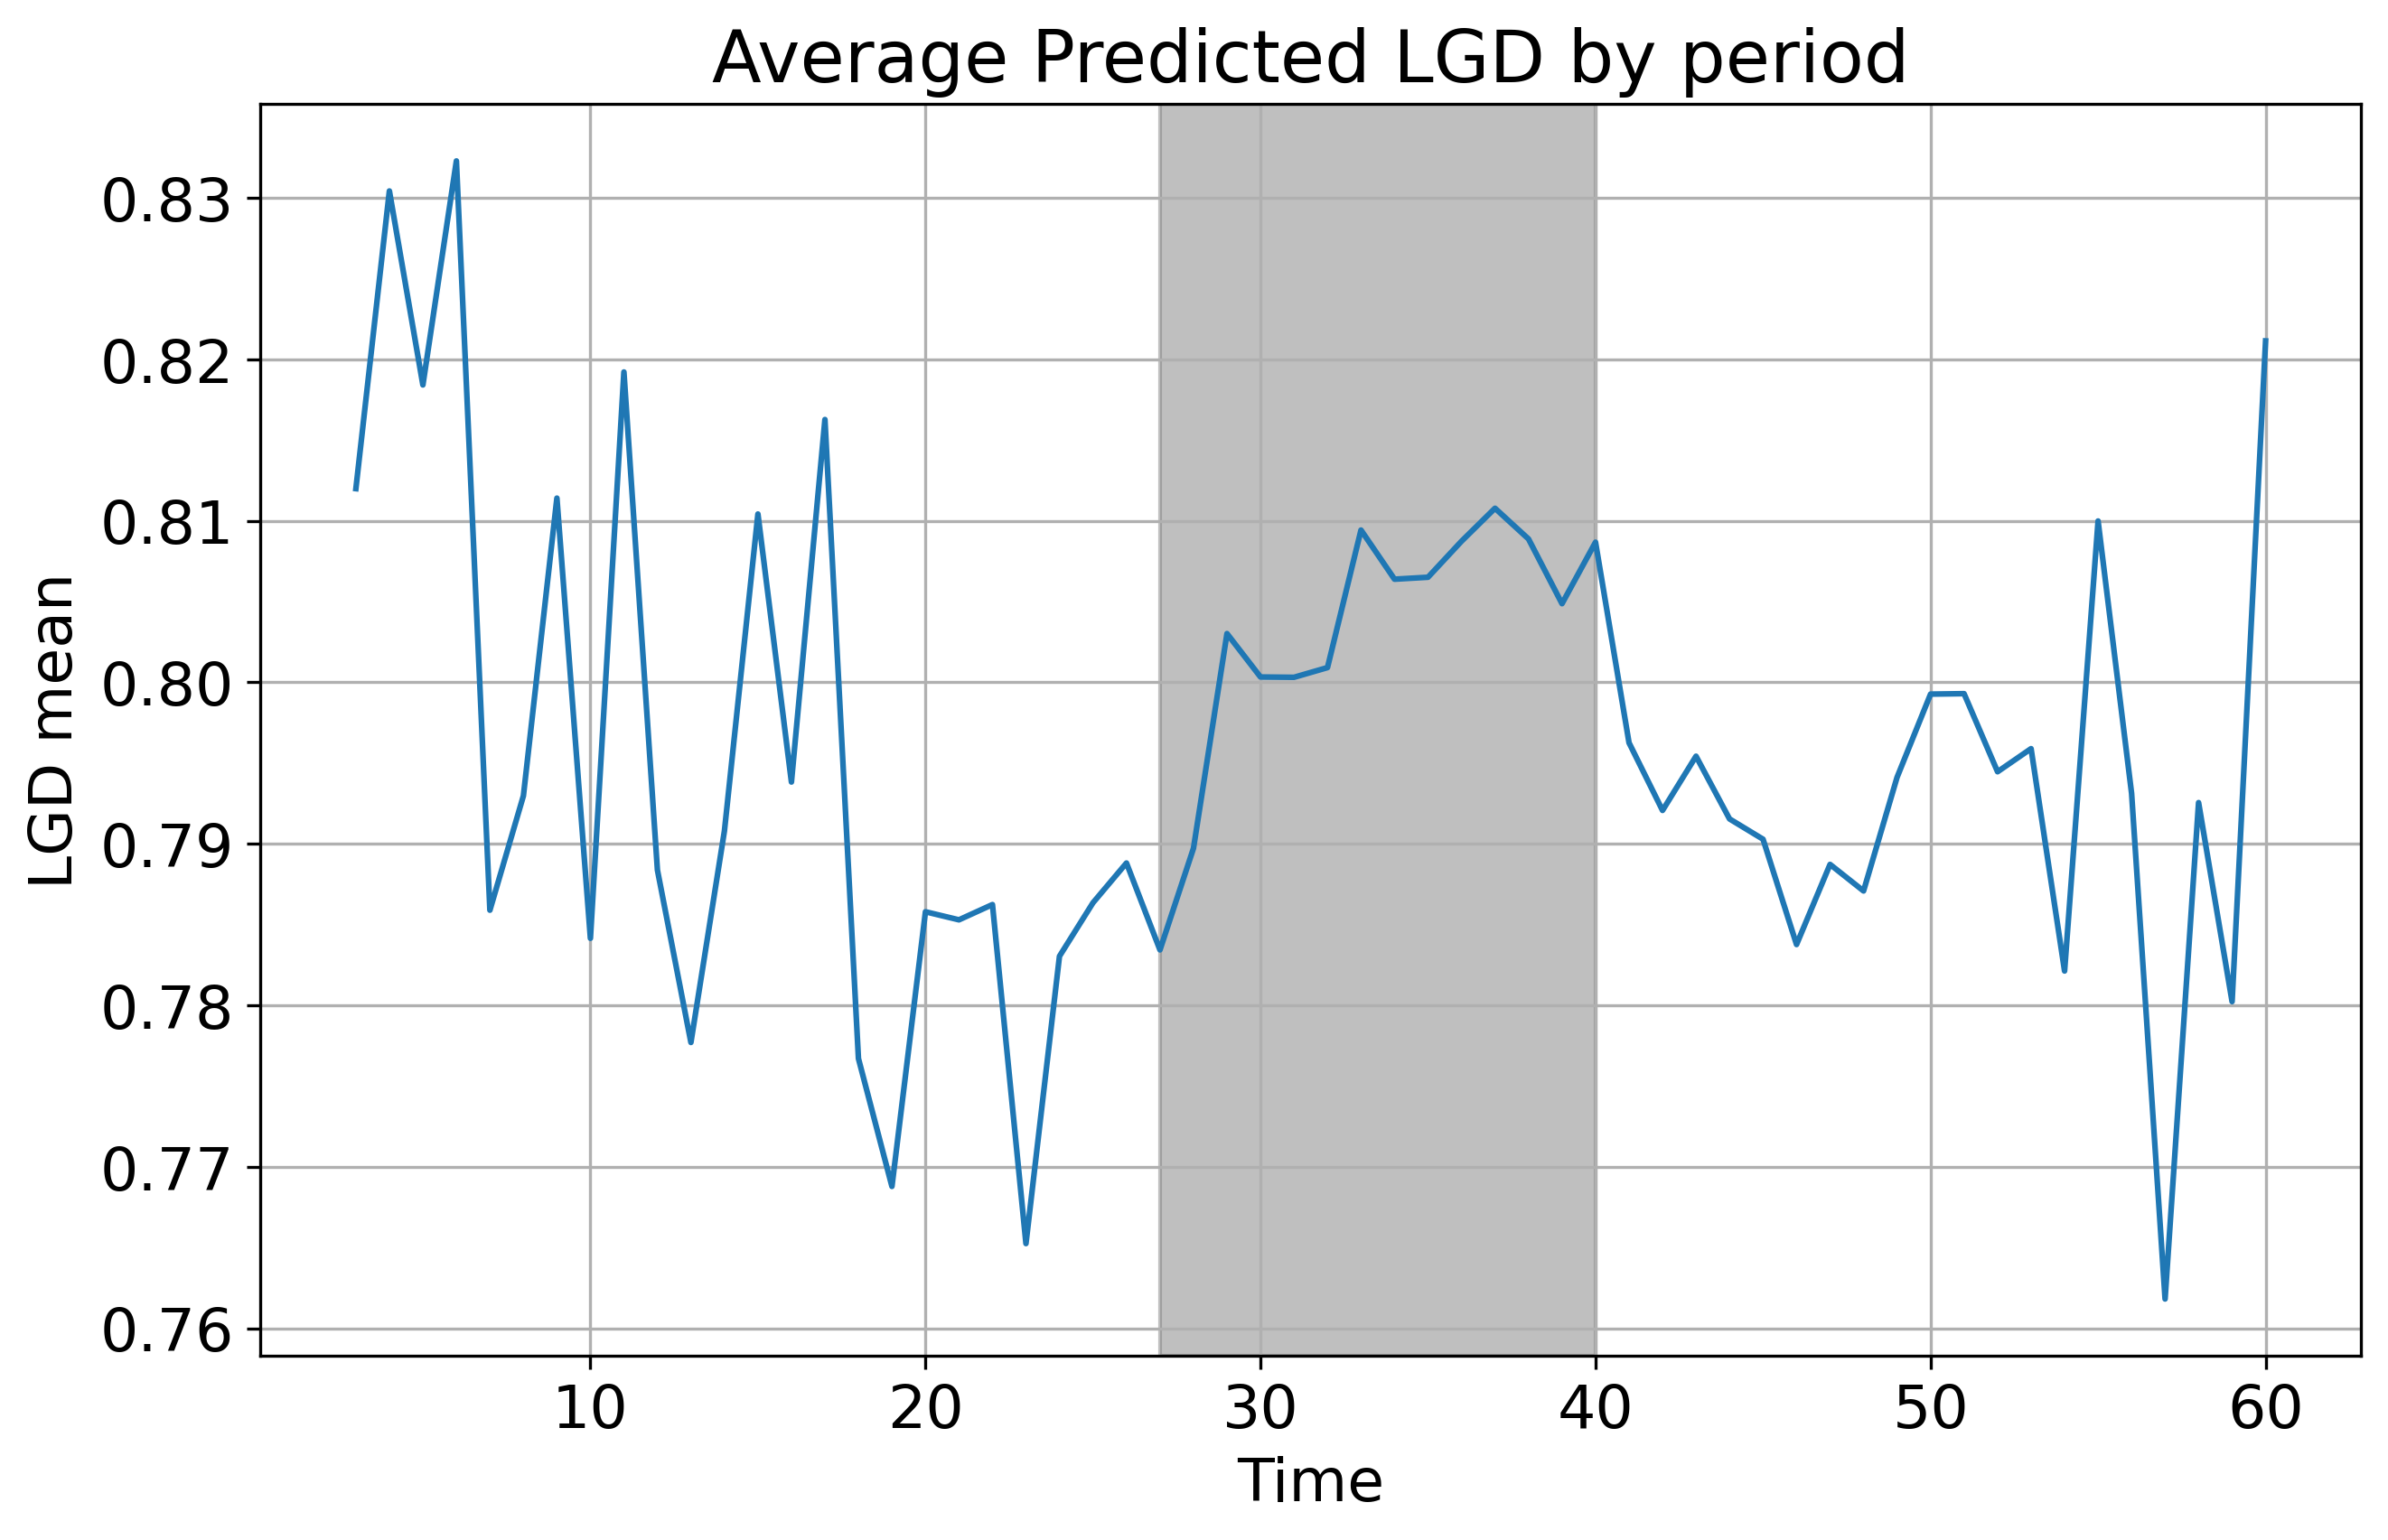

In [85]:
plt.figure(figsize=(10, 6))
plt.plot('time', 'LGD_pred_train', data=LGD_train) 
plt.axvspan(27, 40, color="grey", alpha=0.5)
plt.title("Average Predicted LGD by period")
plt.xlabel('Time')
plt.ylabel('LGD mean')
plt.grid(True)
plt.show

## 4. Expected loss
Compute the level of expected one-period loss for all mortgage loans and periods. PD should be inferred from question 2b and LGD should be inferred from question 3b. You may set the exposure at default to one dollar so that risk measures can be interpreted in percentages. Plot the average expected loss by time period in a chart. Provide your code, and plots and analyse the output economically.

Absolute EL=PD * LGD * EAD

### PD model

In [86]:
# Define the dependent variable (target variable) and independent variables (predictors)
y = merged_copy['default_time']  
X = merged_copy[['FICO_orig_time_S', 'LTV_orig_time_S','Income_Growth']]  

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = smf.glm(formula='default_time ~ FICO_orig_time_S + LTV_orig_time_S + Income_Growth' ,
                family=sm.families.Binomial(),
                data=merged_copy)

# Fit the model on the training set
logistic_results_2 = model.fit(data=X_train)

PD_time=pd.DataFrame(logistic_results_2.predict(merged_copy), columns=['PD_time'])
data7=pd.merge(merged_copy,PD_time, right_index=True, left_index=True)



In [87]:
data7

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0          4    25         -2          25       119       NaN      61031.10   
1          4    26         -2          25       119       NaN      60882.42   
2          4    27         -2          25       119       NaN      60729.80   
3          4    28         -2          25       119       NaN      60576.14   
4       1806    25         22          24       142       NaN     282391.72   
...      ...   ...        ...         ...       ...       ...           ...   
61409  49885    56         28          52       148       NaN     187109.84   
61410  49885    57         28          52       148       NaN     186408.20   
61411  49885    58         28          52       148       NaN     185700.56   
61412  49885    59         28          52       148       NaN     185344.47   
61413  49885    60         28          52       148       NaN     184986.86   

         LTV_time  interest_rate_time  rate_time  ...  default_time  \
0       33.911009              10.500       5.90  ...             0   
1       34.007232              10.500       5.90  ...             0   
2       34.335349              10.500       5.90  ...             0   
3       34.672545              10.875       5.90  ...             0   
4       85.876675               7.300       4.34  ...             0   
...           ...                 ...        ...  ...           ...   
61409  129.086598               5.120       4.65  ...             0   
61410  124.638668               5.120       4.65  ...             0   
61411  123.394302               5.120       4.65  ...             0   
61412  123.630235               5.120       4.65  ...             0   
61413  121.981099               5.120       4.65  ...             0   

       payoff_time  status_time  lgd_time  recovery_res  time_year  \
0                0            0       NaN           NaN       2007   
1                0            0       NaN           NaN       2007   
2                0            0       NaN           NaN       2007   
3                0            0       NaN           NaN       2007   
4                0            0       NaN           NaN       2007   
...            ...          ...       ...           ...        ...   
61409            0            0       NaN           NaN       2014   
61410            0            0       NaN           NaN       2015   
61411            0            0       NaN           NaN       2015   
61412            0            0       NaN           NaN       2015   
61413            0            0       NaN           NaN       2015   

       Income_Growth  FICO_orig_time_S  LTV_orig_time_S   PD_time  
0             -0.001         -1.205200         0.303498  0.038281  
1             -0.001         -1.205200         0.303498  0.038281  
2             -0.001         -1.205200         0.303498  0.038281  
3             -0.001         -1.205200         0.303498  0.038281  
4             -0.001         -0.564527         1.104648  0.036749  
...              ...               ...              ...       ...  
61409          0.000         -0.689876         2.081662  0.045720  
61410          0.094         -0.689876         2.081662  0.024465  
61411          0.094         -0.689876         2.081662  0.024465  
61412          0.094         -0.689876         2.081662  0.024465  
61413          0.094         -0.689876         2.081662  0.024465  

[61414 rows x 33 columns]

### LGD model

In [88]:
data_default_LGD = data7.query('default_time==1').copy()

In [89]:
# Resolution time
data_default_LGD.loc[:,'res_period']=data_default_LGD.loc[:,'res_time']-data_default_LGD.loc[:,'time']

In [90]:
# Calculating LGD
data_default_LGD.loc[:,'LGD'] = (data_default_LGD.loc[:,'balance_time'] - (0.6 * data_default_LGD.loc[:,'recovery_res']) / (1 + data_default_LGD.loc[:,'rate_time'] / (100 * 4)) ** data_default_LGD.loc[:,'res_period']) / data_default_LGD.loc[:,'balance_time']

In [91]:
# Resolution bias
data_default_LGD = resolutionbias(data_default_LGD, 'LGD', 'res_time', 'time')

In [92]:
# Drop NAN
#data_default_LGD2 = data_default_LGD[['LGD','FICO_orig_time_S', 'LTV_orig_time_S','Income_Growth']].

In [93]:
# Define the dependent variable (target variable) and independent variables (predictors)
y = data_default_LGD['LGD']  
X = data_default_LGD[[ 'LGD','FICO_orig_time_S', 'LTV_orig_time_S', 'Income_Growth','time']]  

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
Linear_Model = smf.ols(formula='LGD ~  FICO_orig_time_S + LTV_orig_time_S + Income_Growth' ,
                data=data_default_LGD)

# Fit the model on the training set
linear_results_5 = Linear_Model.fit(data=X_train)

In [94]:
fittedvalues=pd.DataFrame(linear_results_5.predict(merged_copy), columns=['LGD_time'])
data8=pd.merge(data7,fittedvalues, right_index=True, left_index=True)


In [95]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61414 entries, 0 to 61413
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       61414 non-null  int64  
 1   time                     61414 non-null  int64  
 2   orig_time                61414 non-null  int64  
 3   first_time               61414 non-null  int64  
 4   mat_time                 61414 non-null  int64  
 5   res_time                 1154 non-null   float64
 6   balance_time             61414 non-null  float64
 7   LTV_time                 61389 non-null  float64
 8   interest_rate_time       61414 non-null  float64
 9   rate_time                61414 non-null  float64
 10  hpi_time                 61414 non-null  float64
 11  gdp_time                 61414 non-null  float64
 12  uer_time                 61414 non-null  float64
 13  REtype_CO_orig_time      61414 non-null  int64  
 14  REtype_PU_orig_time   

### Calculate time to maturity

In [96]:
data_lifetime = data8
data_lifetime.loc[:,'TTM'] = data_lifetime.loc[:,'mat_time']-data_lifetime.loc[:,'time']

### Exposure at default

In this case, the EAD is is the outstanding loan amount, which is already mentioned on balance_time feature. 

In [97]:
data_lifetime.loc[:,'EAD_time'] = data_lifetime.loc[:,'balance_time']

data_lifetime

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0          4    25         -2          25       119       NaN      61031.10   
1          4    26         -2          25       119       NaN      60882.42   
2          4    27         -2          25       119       NaN      60729.80   
3          4    28         -2          25       119       NaN      60576.14   
4       1806    25         22          24       142       NaN     282391.72   
...      ...   ...        ...         ...       ...       ...           ...   
61409  49885    56         28          52       148       NaN     187109.84   
61410  49885    57         28          52       148       NaN     186408.20   
61411  49885    58         28          52       148       NaN     185700.56   
61412  49885    59         28          52       148       NaN     185344.47   
61413  49885    60         28          52       148       NaN     184986.86   

         LTV_time  interest_rate_time  rate_time  ...  lgd_time  recovery_res  \
0       33.911009              10.500       5.90  ...       NaN           NaN   
1       34.007232              10.500       5.90  ...       NaN           NaN   
2       34.335349              10.500       5.90  ...       NaN           NaN   
3       34.672545              10.875       5.90  ...       NaN           NaN   
4       85.876675               7.300       4.34  ...       NaN           NaN   
...           ...                 ...        ...  ...       ...           ...   
61409  129.086598               5.120       4.65  ...       NaN           NaN   
61410  124.638668               5.120       4.65  ...       NaN           NaN   
61411  123.394302               5.120       4.65  ...       NaN           NaN   
61412  123.630235               5.120       4.65  ...       NaN           NaN   
61413  121.981099               5.120       4.65  ...       NaN           NaN   

       time_year  Income_Growth  FICO_orig_time_S  LTV_orig_time_S   PD_time  \
0           2007         -0.001         -1.205200         0.303498  0.038281   
1           2007         -0.001         -1.205200         0.303498  0.038281   
2           2007         -0.001         -1.205200         0.303498  0.038281   
3           2007         -0.001         -1.205200         0.303498  0.038281   
4           2007         -0.001         -0.564527         1.104648  0.036749   
...          ...            ...               ...              ...       ...   
61409       2014          0.000         -0.689876         2.081662  0.045720   
61410       2015          0.094         -0.689876         2.081662  0.024465   
61411       2015          0.094         -0.689876         2.081662  0.024465   
61412       2015          0.094         -0.689876         2.081662  0.024465   
61413       2015          0.094         -0.689876         2.081662  0.024465   

       LGD_time  TTM   EAD_time  
0      0.805775   94   61031.10  
1      0.805775   93   60882.42  
2      0.805775   92   60729.80  
3      0.805775   91   60576.14  
4      0.802273  117  282391.72  
...         ...  ...        ...  
61409  0.800815   92  187109.84  
61410  0.753885   91  186408.20  
61411  0.753885   90  185700.56  
61412  0.753885   89  185344.47  
61413  0.753885   88  184986.86  

[61414 rows x 36 columns]

### Survival probabilities from PDs

In [98]:
# 1. Compute the survival probabilit at the end of a period
data_lifetime.loc[:,'SP_time_tmp'] = 1 - data_lifetime.loc[:,'PD_time']

In [99]:
# 2. Compute survival probability at the beginning of the period by shifting featutere by on period
data_lifetime.loc[:,'SP_time_tmp1'] = data_lifetime.groupby(['id'])['SP_time_tmp'].shift(1)

In [100]:
# 3. replace misssing values in period 61 by value 1
data_lifetime.loc[:,'SP_time_tmp1'] = data_lifetime.SP_time_tmp1.replace(np.NaN,1)

In [101]:
# 4. Calulate the prodcut over all survival probabilities of prior periods
data_lifetime.loc[:,'SP_time'] = data_lifetime.groupby(['id'])['SP_time_tmp1'].cumprod()

In [102]:
data_lifetime

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0          4    25         -2          25       119       NaN      61031.10   
1          4    26         -2          25       119       NaN      60882.42   
2          4    27         -2          25       119       NaN      60729.80   
3          4    28         -2          25       119       NaN      60576.14   
4       1806    25         22          24       142       NaN     282391.72   
...      ...   ...        ...         ...       ...       ...           ...   
61409  49885    56         28          52       148       NaN     187109.84   
61410  49885    57         28          52       148       NaN     186408.20   
61411  49885    58         28          52       148       NaN     185700.56   
61412  49885    59         28          52       148       NaN     185344.47   
61413  49885    60         28          52       148       NaN     184986.86   

         LTV_time  interest_rate_time  rate_time  ...  Income_Growth  \
0       33.911009              10.500       5.90  ...         -0.001   
1       34.007232              10.500       5.90  ...         -0.001   
2       34.335349              10.500       5.90  ...         -0.001   
3       34.672545              10.875       5.90  ...         -0.001   
4       85.876675               7.300       4.34  ...         -0.001   
...           ...                 ...        ...  ...            ...   
61409  129.086598               5.120       4.65  ...          0.000   
61410  124.638668               5.120       4.65  ...          0.094   
61411  123.394302               5.120       4.65  ...          0.094   
61412  123.630235               5.120       4.65  ...          0.094   
61413  121.981099               5.120       4.65  ...          0.094   

       FICO_orig_time_S  LTV_orig_time_S   PD_time  LGD_time  TTM   EAD_time  \
0             -1.205200         0.303498  0.038281  0.805775   94   61031.10   
1             -1.205200         0.303498  0.038281  0.805775   93   60882.42   
2             -1.205200         0.303498  0.038281  0.805775   92   60729.80   
3             -1.205200         0.303498  0.038281  0.805775   91   60576.14   
4             -0.564527         1.104648  0.036749  0.802273  117  282391.72   
...                 ...              ...       ...       ...  ...        ...   
61409         -0.689876         2.081662  0.045720  0.800815   92  187109.84   
61410         -0.689876         2.081662  0.024465  0.753885   91  186408.20   
61411         -0.689876         2.081662  0.024465  0.753885   90  185700.56   
61412         -0.689876         2.081662  0.024465  0.753885   89  185344.47   
61413         -0.689876         2.081662  0.024465  0.753885   88  184986.86   

       SP_time_tmp  SP_time_tmp1   SP_time  
0         0.961719      1.000000  1.000000  
1         0.961719      0.961719  0.961719  
2         0.961719      0.961719  0.924904  
3         0.961719      0.961719  0.889498  
4         0.963251      1.000000  1.000000  
...            ...           ...       ...  
61409     0.954280      0.954280  0.820357  
61410     0.975535      0.954280  0.782850  
61411     0.975535      0.975535  0.763698  
61412     0.975535      0.975535  0.745014  
61413     0.975535      0.975535  0.726788  

[61414 rows x 39 columns]

### Expected one period loss
For this exercise we are setting the EAD = 1$ to be able to measure risk in percentage.

The EAD formula would be as follows: 

 Absolute EL=PD * LGD * 1

In [103]:
#Subsetting data for time == 1 
#data_lifetime2 = data_lifetime.loc[data_lifetime['time'] <= 61, :].copy()
data_lifetime2 =data_lifetime

#EAD would be set at $1
data_lifetime2.loc[:,'EL'] = data_lifetime2.loc[:,'PD_time']*data_lifetime2.loc[:,'SP_time']*data_lifetime2.loc[:,'LGD_time']*1
#*data_lifetime2.loc[:,'EAD_time']

EL = data_lifetime2.loc[:,'EL'].sum()

#print(round(EL,2))

In [104]:
data_lifetime2

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0          4    25         -2          25       119       NaN      61031.10   
1          4    26         -2          25       119       NaN      60882.42   
2          4    27         -2          25       119       NaN      60729.80   
3          4    28         -2          25       119       NaN      60576.14   
4       1806    25         22          24       142       NaN     282391.72   
...      ...   ...        ...         ...       ...       ...           ...   
61409  49885    56         28          52       148       NaN     187109.84   
61410  49885    57         28          52       148       NaN     186408.20   
61411  49885    58         28          52       148       NaN     185700.56   
61412  49885    59         28          52       148       NaN     185344.47   
61413  49885    60         28          52       148       NaN     184986.86   

         LTV_time  interest_rate_time  rate_time  ...  FICO_orig_time_S  \
0       33.911009              10.500       5.90  ...         -1.205200   
1       34.007232              10.500       5.90  ...         -1.205200   
2       34.335349              10.500       5.90  ...         -1.205200   
3       34.672545              10.875       5.90  ...         -1.205200   
4       85.876675               7.300       4.34  ...         -0.564527   
...           ...                 ...        ...  ...               ...   
61409  129.086598               5.120       4.65  ...         -0.689876   
61410  124.638668               5.120       4.65  ...         -0.689876   
61411  123.394302               5.120       4.65  ...         -0.689876   
61412  123.630235               5.120       4.65  ...         -0.689876   
61413  121.981099               5.120       4.65  ...         -0.689876   

       LTV_orig_time_S   PD_time  LGD_time  TTM   EAD_time  SP_time_tmp  \
0             0.303498  0.038281  0.805775   94   61031.10     0.961719   
1             0.303498  0.038281  0.805775   93   60882.42     0.961719   
2             0.303498  0.038281  0.805775   92   60729.80     0.961719   
3             0.303498  0.038281  0.805775   91   60576.14     0.961719   
4             1.104648  0.036749  0.802273  117  282391.72     0.963251   
...                ...       ...       ...  ...        ...          ...   
61409         2.081662  0.045720  0.800815   92  187109.84     0.954280   
61410         2.081662  0.024465  0.753885   91  186408.20     0.975535   
61411         2.081662  0.024465  0.753885   90  185700.56     0.975535   
61412         2.081662  0.024465  0.753885   89  185344.47     0.975535   
61413         2.081662  0.024465  0.753885   88  184986.86     0.975535   

       SP_time_tmp1   SP_time        EL  
0          1.000000  1.000000  0.030846  
1          0.961719  0.961719  0.029665  
2          0.961719  0.924904  0.028529  
3          0.961719  0.889498  0.027437  
4          1.000000  1.000000  0.029483  
...             ...       ...       ...  
61409      0.954280  0.820357  0.030036  
61410      0.954280  0.782850  0.014439  
61411      0.975535  0.763698  0.014085  
61412      0.975535  0.745014  0.013741  
61413      0.975535  0.726788  0.013405  

[61414 rows x 40 columns]

In [105]:
data_lifetime2['mat_time'].describe()

count    61414.000000
mean       137.902042
std         18.736463
min         18.000000
25%        137.000000
50%        142.000000
75%        145.000000
max        229.000000
Name: mat_time, dtype: float64

In [106]:
#Here we are calculatint the average Expected loss - EL by period
EL_1 = data_lifetime2.groupby('time')['EL'].mean().reset_index(drop=False)

EL_1

time        EL
0      1  0.021734
1      2  0.023845
2      3  0.025481
3      4  0.024246
4      5  0.024378
..   ...       ...
55    56  0.010885
56    57  0.010730
57    58  0.010526
58    59  0.010243
59    60  0.010050

[60 rows x 2 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

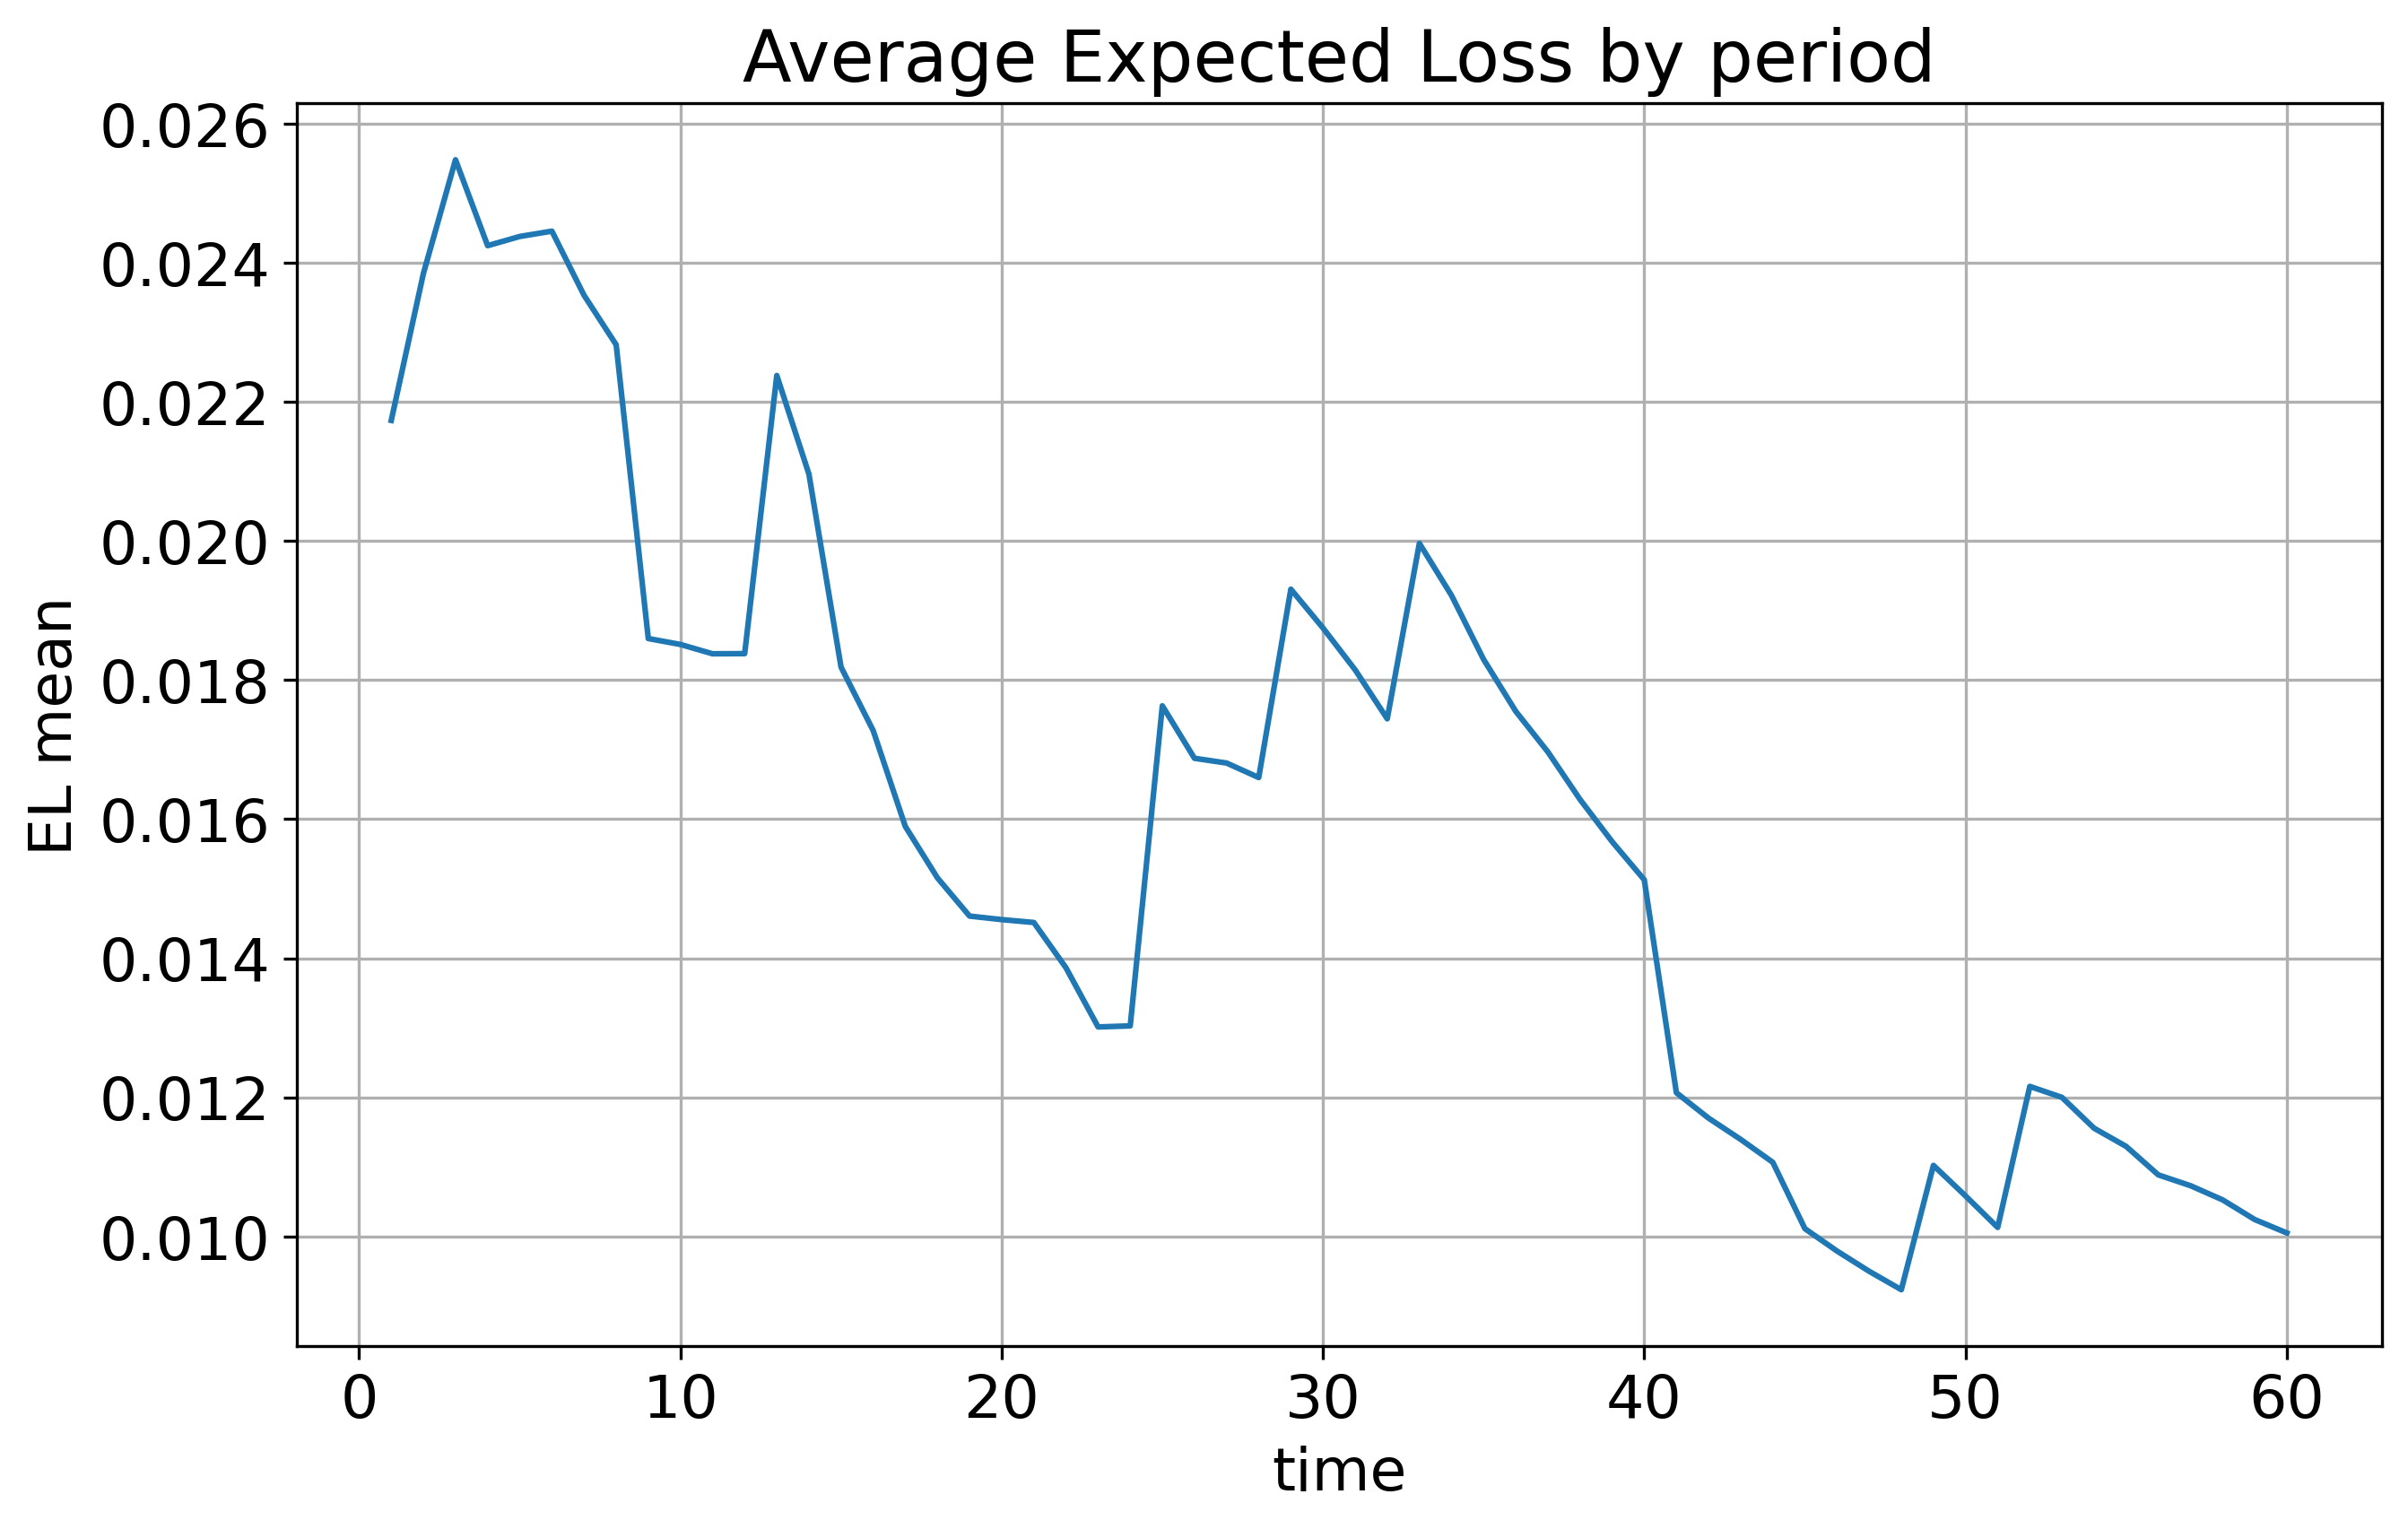

In [107]:
plt.figure(figsize=(10, 6))
plt.plot('time', 'EL', data=EL_1) 
plt.title("Average Expected Loss by period")
plt.xlabel('time')
plt.ylabel('EL mean')
plt.grid(True)
plt.show

The expected loss is about 2% of the outstanding loan balance for all the loans. We can see that at the beginning the EL is higher and it will decrease towards at end of the lifetime of the loan. This can be explained by a higher LTV - higher default risk at the start, but as borrowers start making more contributions to principal and less to interest, the EL and credit risk associated will be lower. In addition, we can observe that periods of uncertainty and economic downturns (27 to 40), may lead to an increase in unemployment and defaults on loans, resulting in higher EL for those periods.

## 5. Climate change

### 5-A. 
How does climate change impact borrower income? Collect a time series from 2001 to 2015 of one climate feature. Build a linear regression model explaining the income growth rates from 1C (by year only) using the climate features making suitable assumptions.

Now we export new dataset, that contains information about the max_tem_change in U.S. from 2001 to 2015

For this exercise we will use a dataset that contains information about the max average temperature in California but this time will assume is the max average temperature in U.S. 

The temperature change was calculated using 2000 as a baseline.

The data soruce:
https://crt-climate-explorer.nemac.org/climate_graphs/?county=Los+Angeles+County&city=Los+Angeles%2C+CA&fips=06037&lat=34.0522342&lon=-118.2436849&id=tmax

In [108]:
df_Temp = pd.read_csv('Final_temp.csv', low_memory=False)

In [109]:
df_Temp

time_year  rcp85_weighted_mean  Temperature_change 
0        2001                 73.2                -1.21
1        2002                 73.7                -0.54
2        2003                 74.4                 0.40
3        2004                 73.7                -0.54
4        2005                 74.1                 0.00
..        ...                  ...                  ...
10       2011                 75.0                 1.21
11       2012                 75.0                 1.21
12       2013                 74.6                 0.67
13       2014                 74.6                 0.67
14       2015                 75.1                 1.35

[15 rows x 3 columns]

In [110]:
df_Temp = df_Temp.drop(columns = ['rcp85_weighted_mean'])

In [111]:
df_Temp = df_Temp.rename(columns ={'Temperature_change ':'Temp_change'})

In [112]:
df_Temp['Temp_change'].describe()

count    15.000000
mean      0.349333
std       0.706323
min      -1.210000
25%       0.135000
50%       0.400000
75%       0.670000
max       1.350000
Name: Temp_change, dtype: float64

The average change in temperature is 0.34% during the period from 2000 and 2015

In [113]:
#Merge df that included income growth and df_temp  by 'time_year'

climate_change = pd.merge(merged_copy, df_Temp, on=['time_year'])

print ("DONE")

DONE


In [114]:
climate_copy = climate_change.copy()

In [115]:
climate_copy

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0          4    25         -2          25       119       NaN      61031.10   
1          4    26         -2          25       119       NaN      60882.42   
2          4    27         -2          25       119       NaN      60729.80   
3          4    28         -2          25       119       NaN      60576.14   
4       1806    25         22          24       142       NaN     282391.72   
...      ...   ...        ...         ...       ...       ...           ...   
61409   9290    10          1           6       121       NaN     102504.52   
61410  40487     9         -4           2        56       NaN      56732.17   
61411  40487    10         -4           2        56       NaN      56650.96   
61412  40487    11         -4           2        56       NaN      56539.33   
61413  40487    12         -4           2        56       NaN      56453.02   

        LTV_time  interest_rate_time  rate_time  ...  default_time  \
0      33.911009              10.500       5.90  ...             0   
1      34.007232              10.500       5.90  ...             0   
2      34.335349              10.500       5.90  ...             0   
3      34.672545              10.875       5.90  ...             0   
4      85.876675               7.300       4.34  ...             0   
...          ...                 ...        ...  ...           ...   
61409  69.336016              10.750       6.03  ...             0   
61410  49.642992              10.500       5.25  ...             0   
61411  47.476334              10.500       5.25  ...             0   
61412  46.196380              10.500       5.25  ...             0   
61413  45.278753              10.500       5.25  ...             0   

       payoff_time  status_time  lgd_time  recovery_res  time_year  \
0                0            0       NaN           NaN       2007   
1                0            0       NaN           NaN       2007   
2                0            0       NaN           NaN       2007   
3                0            0       NaN           NaN       2007   
4                0            0       NaN           NaN       2007   
...            ...          ...       ...           ...        ...   
61409            1            2       NaN           NaN       2003   
61410            0            0       NaN           NaN       2003   
61411            0            0       NaN           NaN       2003   
61412            0            0       NaN           NaN       2003   
61413            0            0       NaN           NaN       2003   

       Income_Growth  FICO_orig_time_S  LTV_orig_time_S  Temp_change  
0             -0.001         -1.205200         0.303498         0.67  
1             -0.001         -1.205200         0.303498         0.67  
2             -0.001         -1.205200         0.303498         0.67  
3             -0.001         -1.205200         0.303498         0.67  
4             -0.001         -0.564527         1.104648         0.67  
...              ...               ...              ...          ...  
61409          0.096         -1.065923         1.104648         0.40  
61410          0.018         -0.829153        -0.360871         0.40  
61411          0.018         -0.829153        -0.360871         0.40  
61412          0.018         -0.829153        -0.360871         0.40  
61413          0.018         -0.829153        -0.360871         0.40  

[61414 rows x 33 columns]

In [116]:
temp_mean = climate_copy.groupby('time_year')['Temp_change'].mean().reset_index(drop=False)

<function matplotlib.pyplot.show(close=None, block=None)>

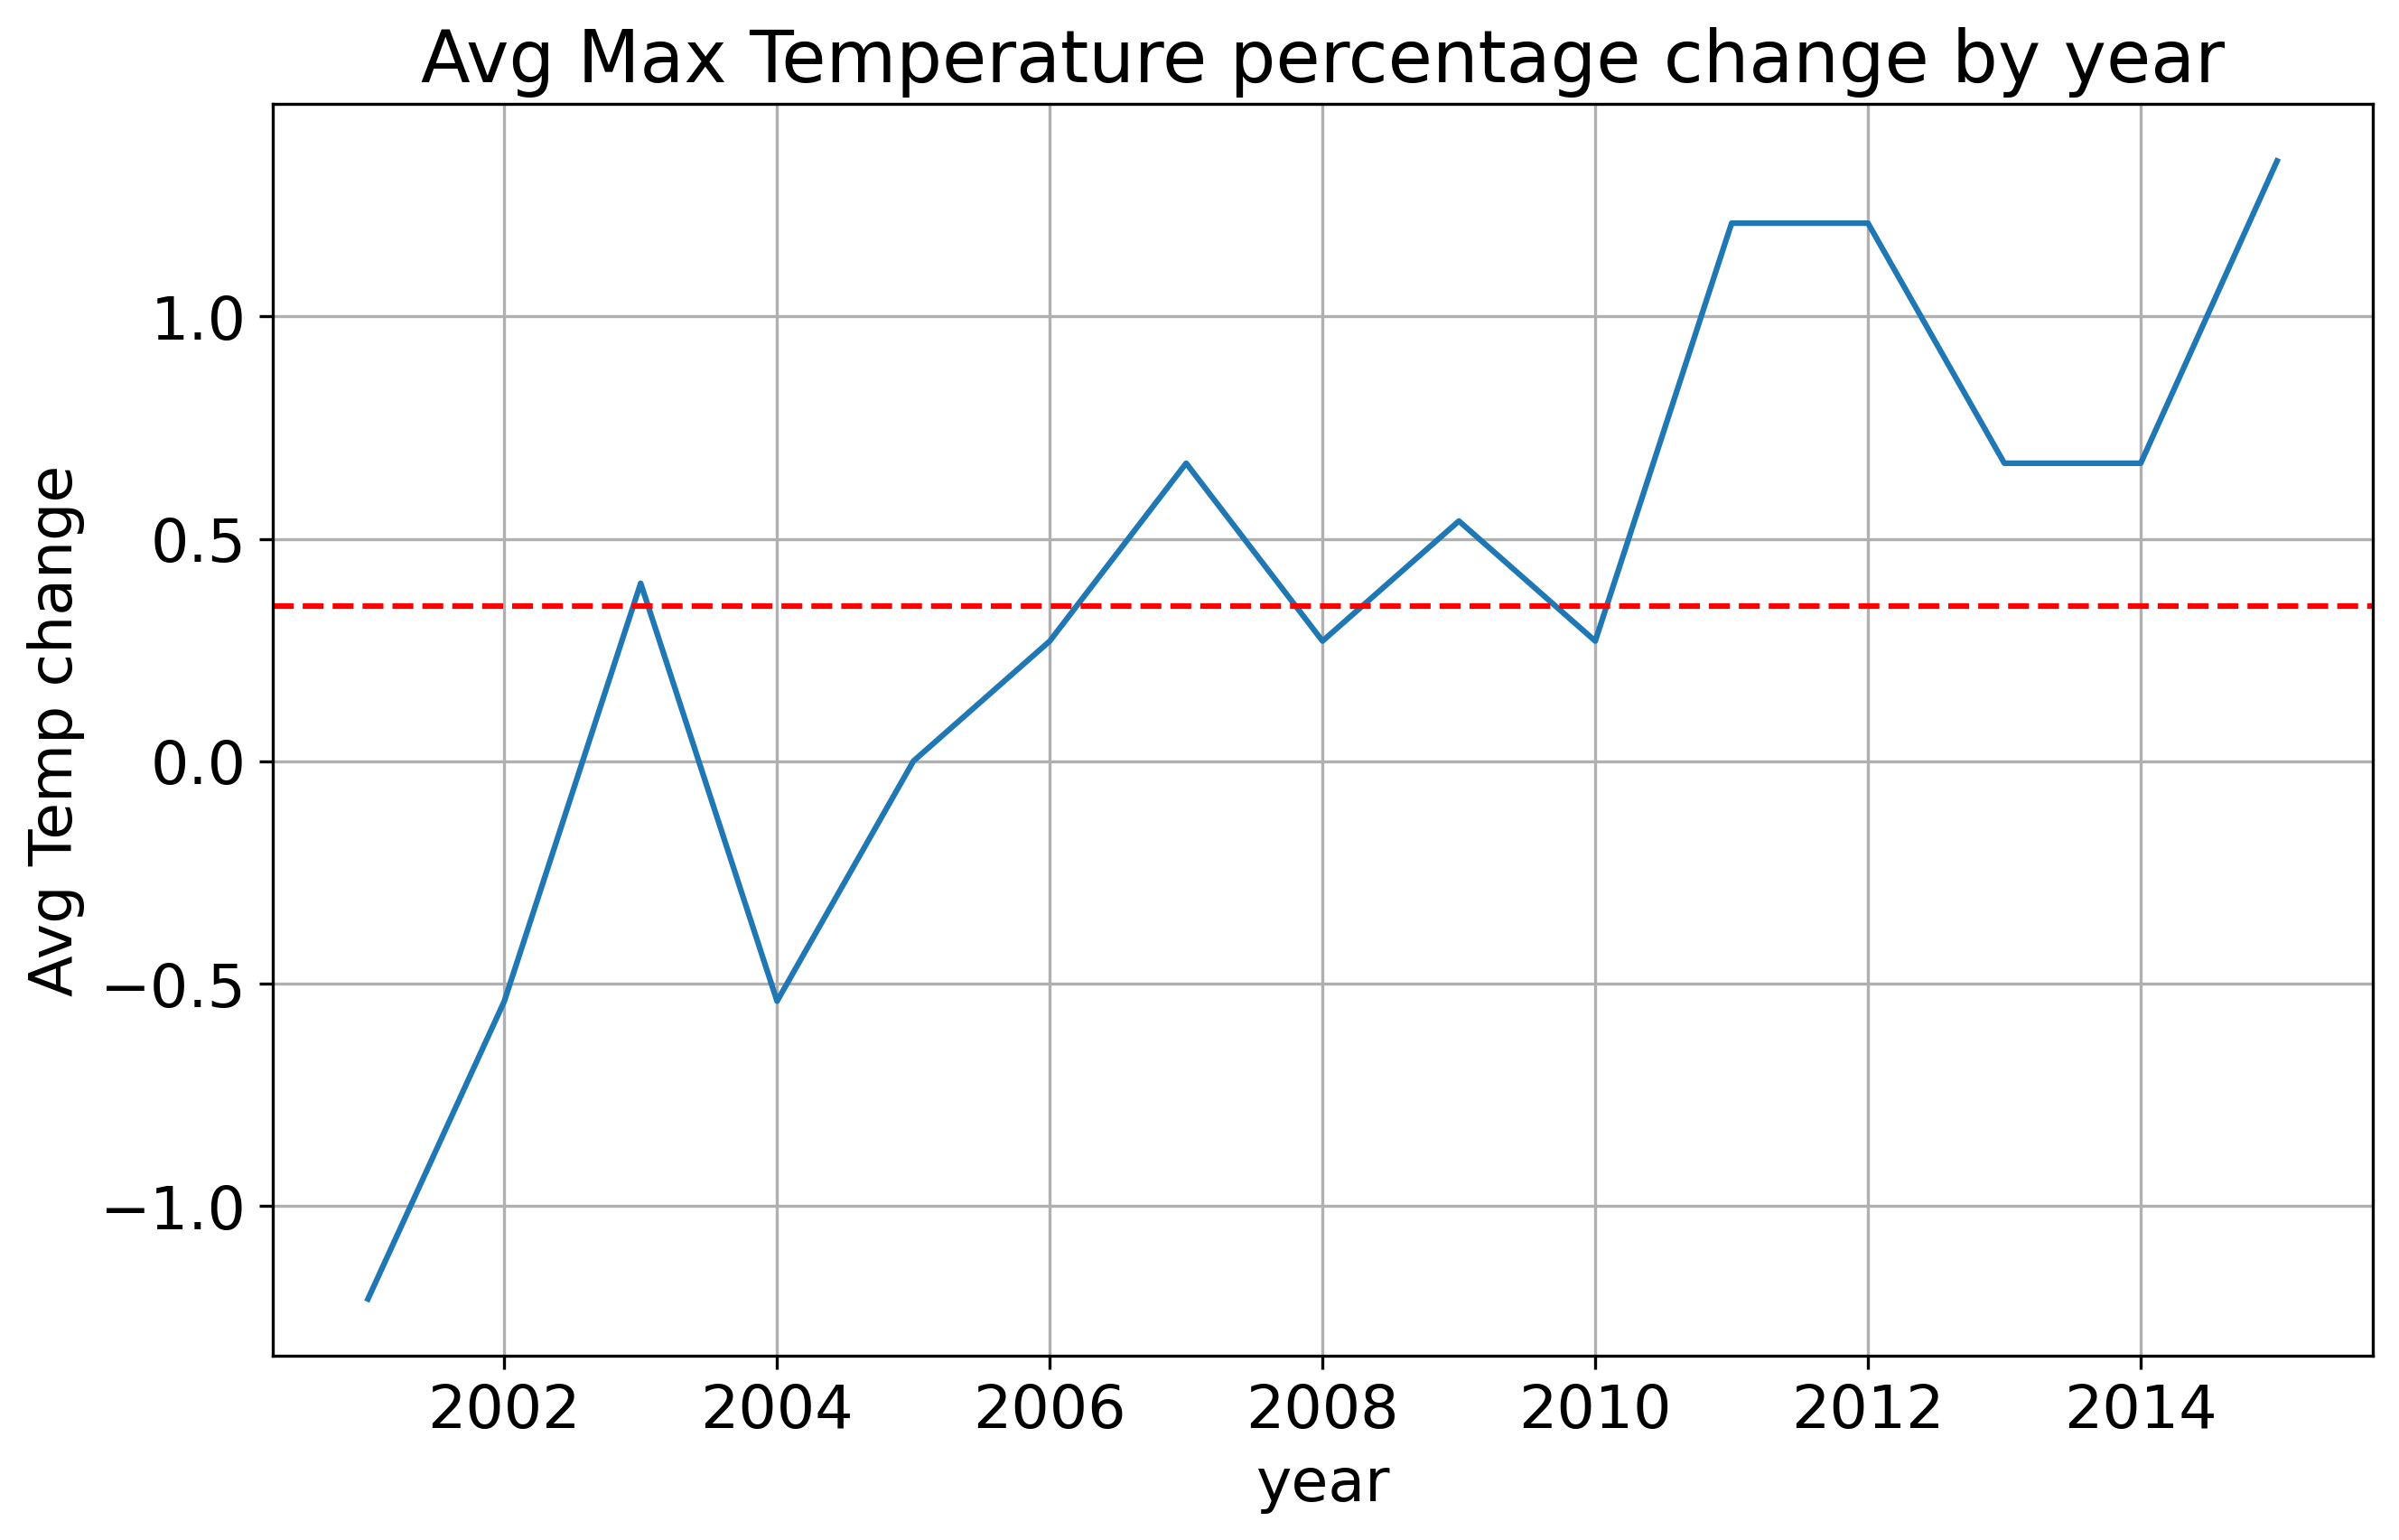

In [117]:
overall_avg_temp = temp_mean['Temp_change'].mean()

plt.figure(figsize=(10, 6))
plt.plot('time_year', 'Temp_change', data=temp_mean) 
plt.axhline(overall_avg_temp, color='red', linestyle='--', label='mean')
plt.title("Avg Max Temperature percentage change by year")
plt.xlabel('year')
plt.ylabel('Avg Temp change')
plt.grid(True)
plt.show

This chard show us average change in temperature in time, which clearly show us a rising in the temperature. With an average increse of 3%.

In [118]:
# relationship between response variable and continous variable
correlation = climate_copy[['Temp_change','Income_Growth']].corr()
print(correlation)

               Temp_change  Income_Growth
Temp_change       1.000000       0.109249
Income_Growth     0.109249       1.000000


### Linear regression model to predic income growth given model - A

In [119]:
model_ols = smf.ols(formula='Income_Growth~Temp_change', data=climate_copy).fit()

In [120]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Income_Growth   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     741.8
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          2.23e-162
Time:                        14:17:20   Log-Likelihood:             1.0370e+05
No. Observations:               61414   AIC:                        -2.074e+05
Df Residuals:                   61412   BIC:                        -2.074e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0109      0.000     35.221      0.000       0.010       0.012
Temp_change     0.0119      0.000     27.236      0.000       0.011       0.013
==============================================================================
Omnibus:                      300.411   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.275
Skew:                           0.050   Prob(JB):                     1.81e-90
Kurtosis:                       3.389   Cond. No.                         3.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
temp_model=pd.DataFrame(model_ols.predict(climate_copy), columns=['Income_impact'])
data10=pd.merge(climate_copy,temp_model, right_index=True, left_index=True)


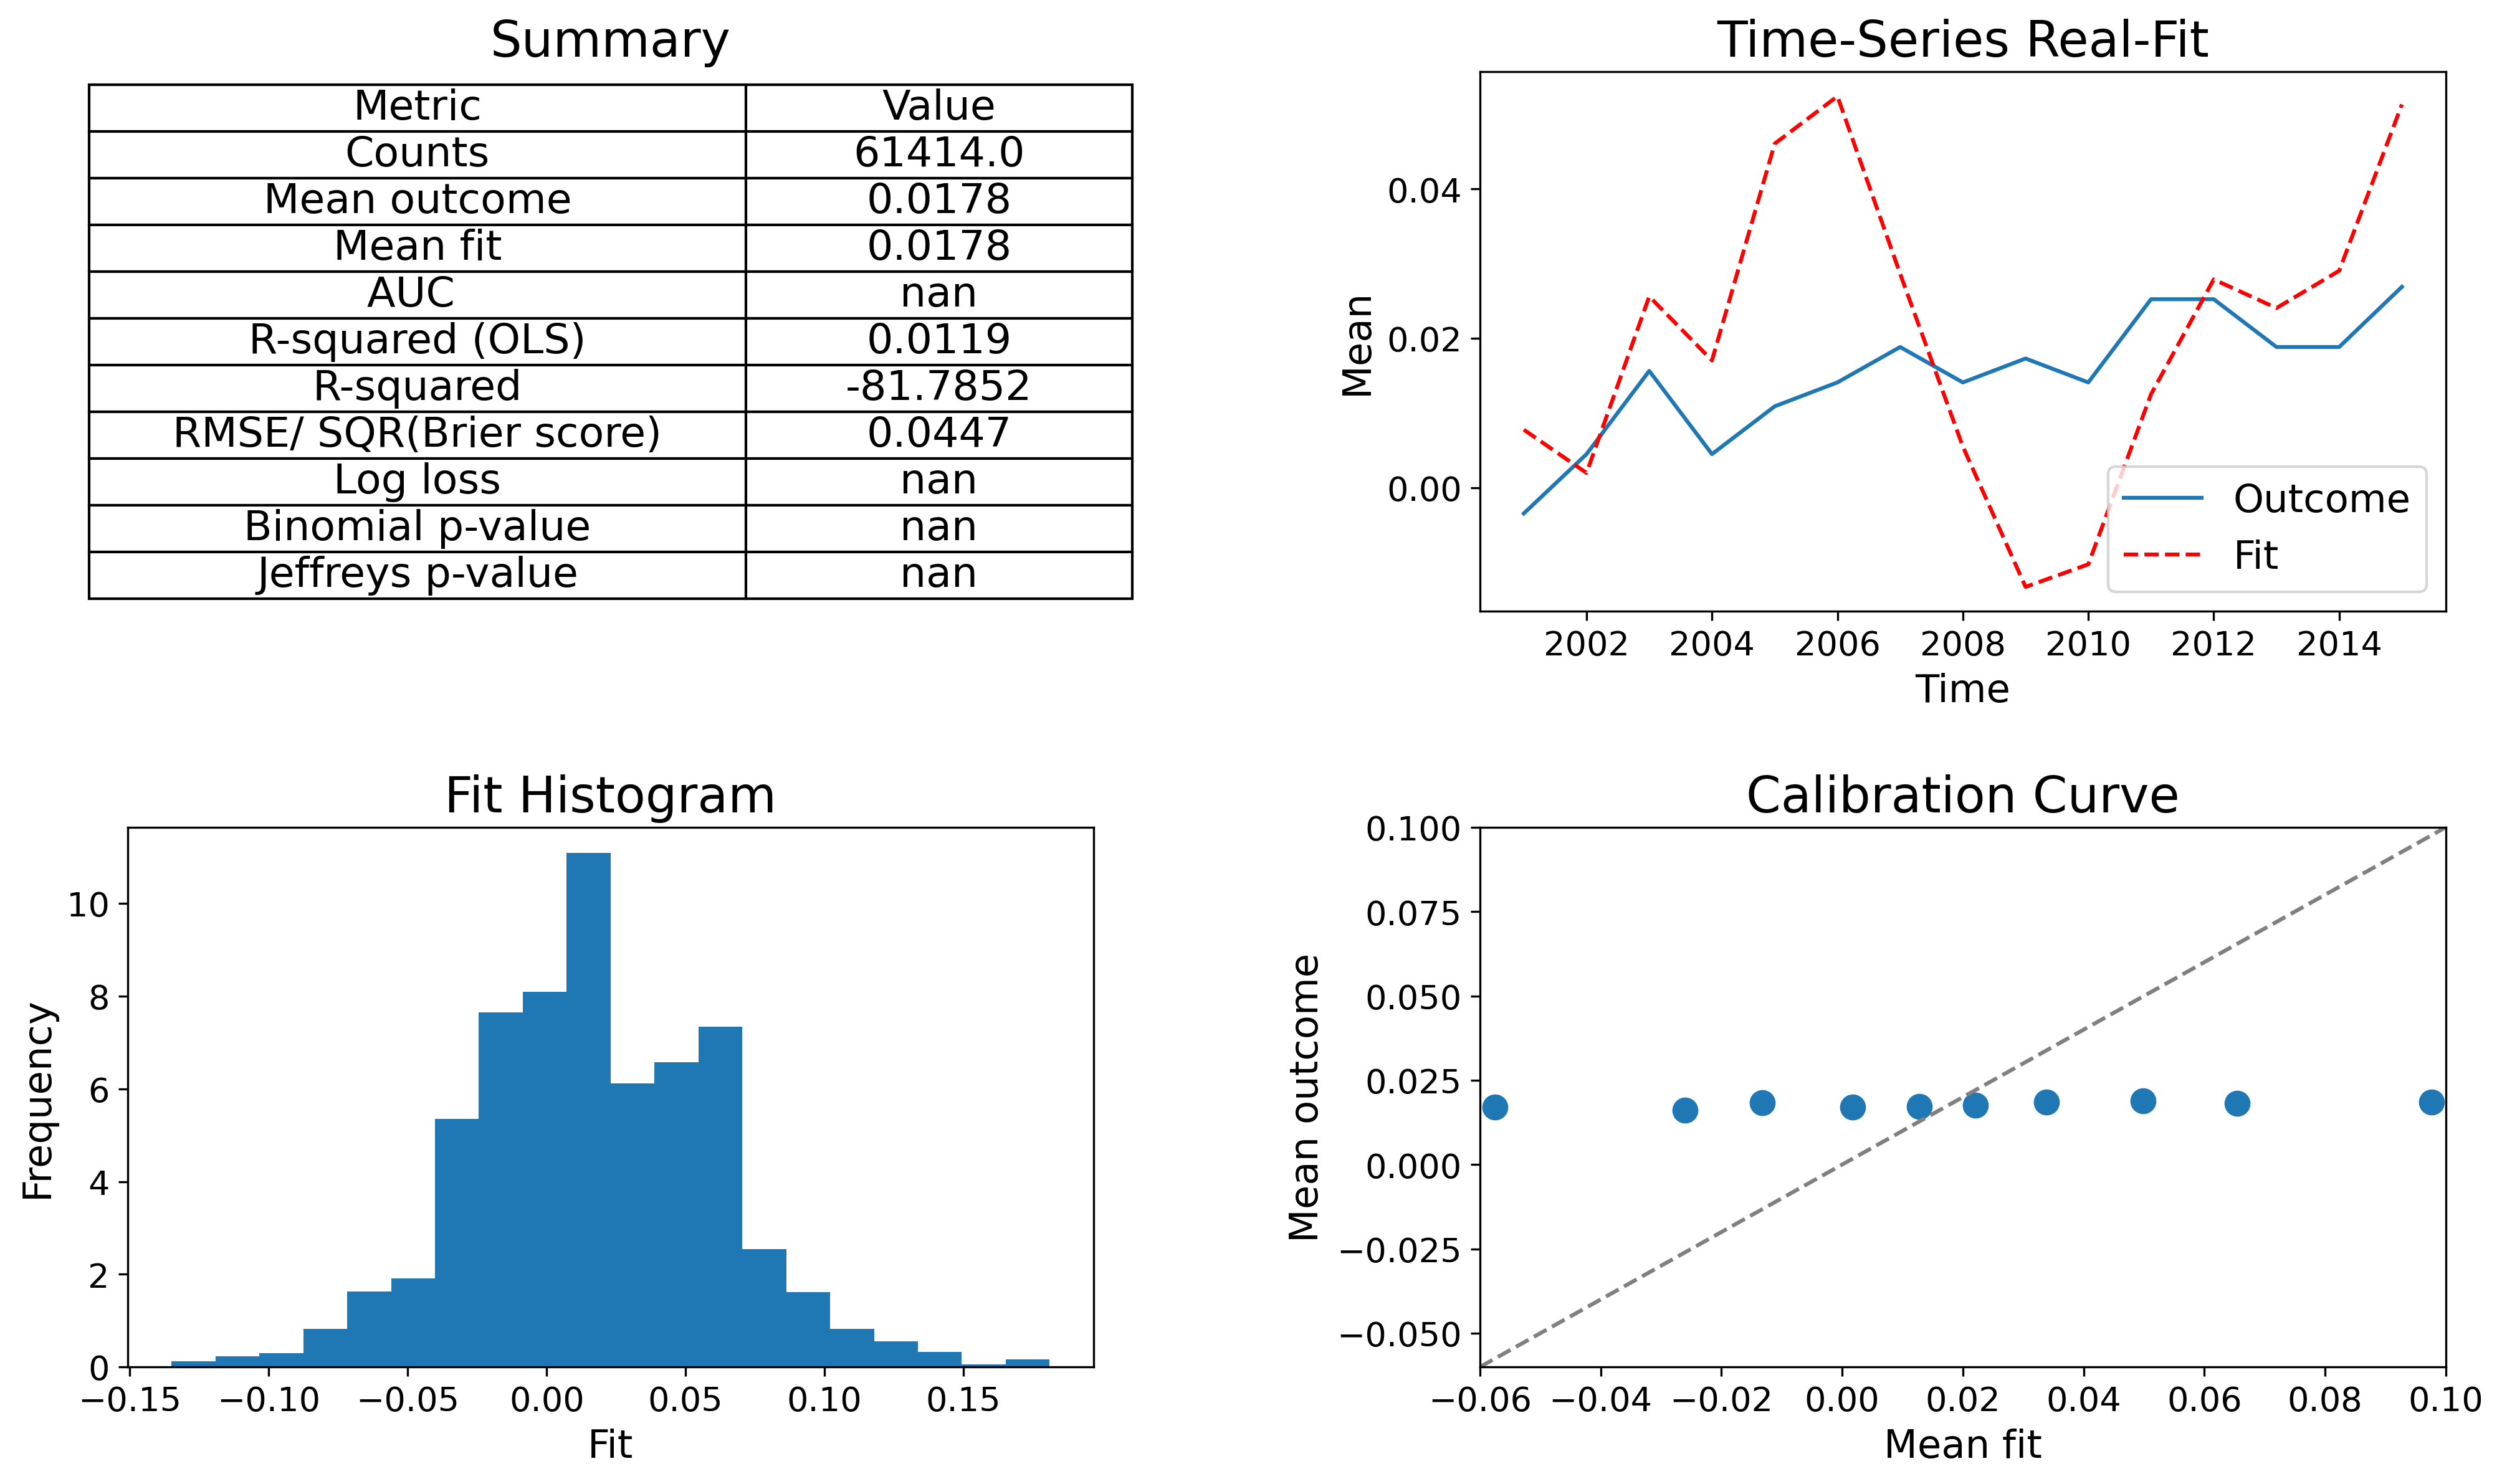

In [122]:
validation(data10.Income_Growth, data10.Income_impact, data10.time_year)

In [123]:
data10

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0          4    25         -2          25       119       NaN      61031.10   
1          4    26         -2          25       119       NaN      60882.42   
2          4    27         -2          25       119       NaN      60729.80   
3          4    28         -2          25       119       NaN      60576.14   
4       1806    25         22          24       142       NaN     282391.72   
...      ...   ...        ...         ...       ...       ...           ...   
61409   9290    10          1           6       121       NaN     102504.52   
61410  40487     9         -4           2        56       NaN      56732.17   
61411  40487    10         -4           2        56       NaN      56650.96   
61412  40487    11         -4           2        56       NaN      56539.33   
61413  40487    12         -4           2        56       NaN      56453.02   

        LTV_time  interest_rate_time  rate_time  ...  payoff_time  \
0      33.911009              10.500       5.90  ...            0   
1      34.007232              10.500       5.90  ...            0   
2      34.335349              10.500       5.90  ...            0   
3      34.672545              10.875       5.90  ...            0   
4      85.876675               7.300       4.34  ...            0   
...          ...                 ...        ...  ...          ...   
61409  69.336016              10.750       6.03  ...            1   
61410  49.642992              10.500       5.25  ...            0   
61411  47.476334              10.500       5.25  ...            0   
61412  46.196380              10.500       5.25  ...            0   
61413  45.278753              10.500       5.25  ...            0   

       status_time  lgd_time  recovery_res  time_year  Income_Growth  \
0                0       NaN           NaN       2007         -0.001   
1                0       NaN           NaN       2007         -0.001   
2                0       NaN           NaN       2007         -0.001   
3                0       NaN           NaN       2007         -0.001   
4                0       NaN           NaN       2007         -0.001   
...            ...       ...           ...        ...            ...   
61409            2       NaN           NaN       2003          0.096   
61410            0       NaN           NaN       2003          0.018   
61411            0       NaN           NaN       2003          0.018   
61412            0       NaN           NaN       2003          0.018   
61413            0       NaN           NaN       2003          0.018   

       FICO_orig_time_S  LTV_orig_time_S  Temp_change  Income_impact  
0             -1.205200         0.303498         0.67       0.018845  
1             -1.205200         0.303498         0.67       0.018845  
2             -1.205200         0.303498         0.67       0.018845  
3             -1.205200         0.303498         0.67       0.018845  
4             -0.564527         1.104648         0.67       0.018845  
...                 ...              ...          ...            ...  
61409         -1.065923         1.104648         0.40       0.015644  
61410         -0.829153        -0.360871         0.40       0.015644  
61411         -0.829153        -0.360871         0.40       0.015644  
61412         -0.829153        -0.360871         0.40       0.015644  
61413         -0.829153        -0.360871         0.40       0.015644  

[61414 rows x 34 columns]

From this proposed model, we can conclude that it does not produce accurate results when trying to predict income growth given average temperatures. However, it does tell us about the positive relationship that exists between income and rising temperatures. Implying that economic/income growth is linked with rising temperatures (caused by economic activity) in a country like the U.S. (this could change in the future). However, the story might be different in low-income countries, which are the first affected by climate change.
On the other hand, a better model could be produced by developing variables able to transfer the risk/impact associated with climate change into aspects like income growth. For instance, evaluating the relationship between income inequality and rising temperatures might provide a better understanding of the real risk that climate change brings to people's income. 

### 5-B. 

Collect a prediction of future values for your climate feature from 5A from 2015 onward.

For this task we have used the future prediction based on an RCP8.5 scenerio, which assumes that no significant efforts to reduce greenhouse emission (growing economica activity) would be made, consequently temperatures will continue to increase. it compraise a time period from 2015 to 2045


data source: https://crt-climate-explorer.nemac.org/climate_graphs/?county=Los+Angeles+County&city=Los+Angeles%2C+CA&fips=06037&lat=34.0522342&lon=-118.2436849&id=tmax

In [124]:
temp_forecast = pd.read_csv('final_projection_temp.csv', low_memory=False)

In [125]:
temp_forecast = temp_forecast.drop(columns = ['rcp85_weighted_mean'])

In [126]:
print(temp_forecast.columns)

Index(['time_year', 'Temperature percentage change '], dtype='object')


In [127]:
temp_forecast = temp_forecast.rename(columns ={'Temperature percentage change ' : 'Temp_change'})

In [128]:
temp_forecast['Temp_change'].describe()

count    31.000000
mean      2.768065
std       1.059574
min       0.940000
25%       1.890000
50%       2.700000
75%       3.710000
max       4.860000
Name: Temp_change, dtype: float64

In [129]:
temp_forecast

time_year  Temp_change
0        2015         1.35
1        2016         0.94
2        2017         1.48
3        2018         1.89
4        2019         1.35
..        ...          ...
26       2041         3.91
27       2042         4.59
28       2043         3.91
29       2044         3.78
30       2045         4.86

[31 rows x 2 columns]

According to this forescast, the average max temperatures are expected to increase average a 2.7% per year.

### 5-C
Consider the PD and LGD over the lifetime of a 30 year mortgage loan (starting from the end of the data in 2015 until 2045). Calculate the PD and LGD term structure (by time) for a mortgage loan of a representative borrower and loan feature predictions of 5B using the model that you have developed in 5A.

### Last period = current observation period

We want to look at data into the future, to do that we subset data with observation at period 60. This allow us to look into the data from today to the long maturity (life time for loan).

**1. Create our skelleton dataset for 1 loan:**
Here we are gonna used the last period = 60 as our current observation peridos.

In [130]:
data_lifetime = merged_copy.query('time==60').copy()
data_lifetime = data_lifetime.reset_index(drop=True)

In [131]:
data_lifetime

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0        4    60         -2          25       119       NaN      52686.35   
1     9509    60         19          21       139       NaN     166779.26   
2    10168    60         20          23       141       NaN     112717.65   
3    12944    60         16          29       136       NaN     274248.05   
4    13879    60         23          23       141       NaN     195336.51   
..     ...   ...        ...         ...       ...       ...           ...   
812  47447    60         52          52       143       NaN      44498.28   
813  49971    60         25          52       145       NaN      35763.49   
814  48199    60         24          52       145       NaN      64575.90   
815  49827    60         24          52       144       NaN     126856.02   
816  49885    60         28          52       148       NaN     184986.86   

       LTV_time  interest_rate_time  rate_time  ...  hpi_orig_time  \
0     34.898842              10.500       5.90  ...          97.99   
1     74.748911               2.625       4.24  ...         191.42   
2     66.837238               2.625       4.50  ...         199.21   
3     52.737594               2.875       3.86  ...         167.91   
4     93.183075               2.625       4.39  ...         221.91   
..          ...                 ...        ...  ...            ...   
812   59.956616               6.500       1.87  ...         161.13   
813   77.517650               7.750       5.15  ...         226.29   
814   87.492795               9.990       4.86  ...         223.75   
815  116.821341              10.250       4.86  ...         223.75   
816  121.981099               5.120       4.65  ...         219.67   

     default_time  payoff_time  status_time  lgd_time  recovery_res  \
0               0            0            0       NaN           NaN   
1               0            0            0       NaN           NaN   
2               0            0            0       NaN           NaN   
3               0            0            0       NaN           NaN   
4               0            0            0       NaN           NaN   
..            ...          ...          ...       ...           ...   
812             0            0            0       NaN           NaN   
813             0            0            0       NaN           NaN   
814             0            0            0       NaN           NaN   
815             0            0            0       NaN           NaN   
816             0            0            0       NaN           NaN   

     time_year  Income_Growth  FICO_orig_time_S  LTV_orig_time_S  
0         2015          0.093         -1.205200         0.303498  
1         2015          0.093          1.078939         0.127635  
2         2015          0.093         -0.467033         0.127635  
3         2015          0.093          0.271134         0.127635  
4         2015          0.093          0.702891         0.127635  
..         ...            ...               ...              ...  
812       2015         -0.003         -0.285973        -0.360871  
813       2015         -0.003         -0.272046        -0.360871  
814       2015          0.063         -1.428043         0.127635  
815       2015          0.063         -2.194065         1.368442  
816       2015          0.094         -0.689876         2.081662  

[817 rows x 32 columns]

In [132]:
data_lifetime['mat_time'].describe()

count    817.000000
mean     142.254590
std       19.338416
min       67.000000
25%      139.000000
50%      143.000000
75%      147.000000
max      229.000000
Name: mat_time, dtype: float64

### Time to maturity
**1.** We then calculate how many periods we have until maturity time.
**2.** We need to find a borrower with a TMM = 120

In [133]:
data_lifetime.loc[:,'TTM'] = data_lifetime.loc[:,'mat_time']-data_lifetime.loc[:,'time']

In [134]:
data_lifetime['TTM'].describe()

count    817.000000
mean      82.254590
std       19.338416
min        7.000000
25%       79.000000
50%       83.000000
75%       87.000000
max      169.000000
Name: TTM, dtype: float64

In [135]:
data_lifetime.query('TTM==120')

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
88   22838    60         20          22       180       NaN     406550.75   
260  30966    60         23          26       180       NaN     377892.85   

      LTV_time  interest_rate_time  rate_time  ...  default_time  payoff_time  \
88   65.655748               3.816       4.50  ...             0            0   
260  78.240031               2.000       4.39  ...             0            0   

     status_time  lgd_time  recovery_res  time_year  Income_Growth  \
88             0       NaN           NaN       2015          0.052   
260            0       NaN           NaN       2015          0.068   

     FICO_orig_time_S  LTV_orig_time_S  TTM  
88           0.452193        -1.298804  120  
260          0.062218        -0.282710  120  

[2 rows x 33 columns]

**2.** I'm going to select borrowe with id 22838 so that we can recreate his mortgate until time to maturity = 120 queartes or 30 years.

In [136]:
data_lifetime2 = data_lifetime.query('id==22838')

In [137]:
data_lifetime2

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
88  22838    60         20          22       180       NaN     406550.75   

     LTV_time  interest_rate_time  rate_time  ...  default_time  payoff_time  \
88  65.655748               3.816        4.5  ...             0            0   

    status_time  lgd_time  recovery_res  time_year  Income_Growth  \
88            0       NaN           NaN       2015          0.052   

    FICO_orig_time_S  LTV_orig_time_S  TTM  
88          0.452193        -1.298804  120  

[1 rows x 33 columns]

### Reshaping data
**1.** Now we are going to replicate each loan as many time as we have times to maturity. e.g. (TTM=120, Replicate 120 time). **Then we add some variables like age and age2**

In [138]:
data_lifetime2 = data_lifetime2.loc[np.repeat(data_lifetime2.index.values, data_lifetime2.TTM)]

In [139]:
data_lifetime2 = data_lifetime2.reset_index(drop=True)

In [140]:
data_lifetime2

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0    22838    60         20          22       180       NaN     406550.75   
1    22838    60         20          22       180       NaN     406550.75   
2    22838    60         20          22       180       NaN     406550.75   
3    22838    60         20          22       180       NaN     406550.75   
4    22838    60         20          22       180       NaN     406550.75   
..     ...   ...        ...         ...       ...       ...           ...   
115  22838    60         20          22       180       NaN     406550.75   
116  22838    60         20          22       180       NaN     406550.75   
117  22838    60         20          22       180       NaN     406550.75   
118  22838    60         20          22       180       NaN     406550.75   
119  22838    60         20          22       180       NaN     406550.75   

      LTV_time  interest_rate_time  rate_time  ...  default_time  payoff_time  \
0    65.655748               3.816        4.5  ...             0            0   
1    65.655748               3.816        4.5  ...             0            0   
2    65.655748               3.816        4.5  ...             0            0   
3    65.655748               3.816        4.5  ...             0            0   
4    65.655748               3.816        4.5  ...             0            0   
..         ...                 ...        ...  ...           ...          ...   
115  65.655748               3.816        4.5  ...             0            0   
116  65.655748               3.816        4.5  ...             0            0   
117  65.655748               3.816        4.5  ...             0            0   
118  65.655748               3.816        4.5  ...             0            0   
119  65.655748               3.816        4.5  ...             0            0   

     status_time  lgd_time  recovery_res  time_year  Income_Growth  \
0              0       NaN           NaN       2015          0.052   
1              0       NaN           NaN       2015          0.052   
2              0       NaN           NaN       2015          0.052   
3              0       NaN           NaN       2015          0.052   
4              0       NaN           NaN       2015          0.052   
..           ...       ...           ...        ...            ...   
115            0       NaN           NaN       2015          0.052   
116            0       NaN           NaN       2015          0.052   
117            0       NaN           NaN       2015          0.052   
118            0       NaN           NaN       2015          0.052   
119            0       NaN           NaN       2015          0.052   

     FICO_orig_time_S  LTV_orig_time_S  TTM  
0            0.452193        -1.298804  120  
1            0.452193        -1.298804  120  
2            0.452193        -1.298804  120  
3            0.452193        -1.298804  120  
4            0.452193        -1.298804  120  
..                ...              ...  ...  
115          0.452193        -1.298804  120  
116          0.452193        -1.298804  120  
117          0.452193        -1.298804  120  
118          0.452193        -1.298804  120  
119          0.452193        -1.298804  120  

[120 rows x 33 columns]

In [141]:
data_lifetime2.loc[:, 'time_tmp'] = data_lifetime2.groupby('id').cumcount()+1

data_lifetime2.loc[:, 'time'] = data_lifetime2.loc[:, 'time']+data_lifetime2.loc[:, 'time_tmp']

data_lifetime2.loc[:, 'age'] = data_lifetime2.loc[:, 'time']-data_lifetime2.loc[:, 'orig_time']
data_lifetime2.loc[:, 'age2'] = data_lifetime2.loc[:, 'age']*data_lifetime2.loc[:, 'age']

data_lifetime2 = data_lifetime2.rename(columns={'TTM':'TTM_0','balance_time':'balance_time_0'})

data_lifetime2.loc[:, 'TTM'] = data_lifetime2.loc[:, 'mat_time']-data_lifetime2.loc[:, 'time']

In [142]:
data_lifetime2

id  time  orig_time  first_time  mat_time  res_time  balance_time_0  \
0    22838    61         20          22       180       NaN       406550.75   
1    22838    62         20          22       180       NaN       406550.75   
2    22838    63         20          22       180       NaN       406550.75   
3    22838    64         20          22       180       NaN       406550.75   
4    22838    65         20          22       180       NaN       406550.75   
..     ...   ...        ...         ...       ...       ...             ...   
115  22838   176         20          22       180       NaN       406550.75   
116  22838   177         20          22       180       NaN       406550.75   
117  22838   178         20          22       180       NaN       406550.75   
118  22838   179         20          22       180       NaN       406550.75   
119  22838   180         20          22       180       NaN       406550.75   

      LTV_time  interest_rate_time  rate_time  ...  recovery_res  time_year  \
0    65.655748               3.816        4.5  ...           NaN       2015   
1    65.655748               3.816        4.5  ...           NaN       2015   
2    65.655748               3.816        4.5  ...           NaN       2015   
3    65.655748               3.816        4.5  ...           NaN       2015   
4    65.655748               3.816        4.5  ...           NaN       2015   
..         ...                 ...        ...  ...           ...        ...   
115  65.655748               3.816        4.5  ...           NaN       2015   
116  65.655748               3.816        4.5  ...           NaN       2015   
117  65.655748               3.816        4.5  ...           NaN       2015   
118  65.655748               3.816        4.5  ...           NaN       2015   
119  65.655748               3.816        4.5  ...           NaN       2015   

     Income_Growth  FICO_orig_time_S  LTV_orig_time_S  TTM_0  time_tmp  age  \
0            0.052          0.452193        -1.298804    120         1   41   
1            0.052          0.452193        -1.298804    120         2   42   
2            0.052          0.452193        -1.298804    120         3   43   
3            0.052          0.452193        -1.298804    120         4   44   
4            0.052          0.452193        -1.298804    120         5   45   
..             ...               ...              ...    ...       ...  ...   
115          0.052          0.452193        -1.298804    120       116  156   
116          0.052          0.452193        -1.298804    120       117  157   
117          0.052          0.452193        -1.298804    120       118  158   
118          0.052          0.452193        -1.298804    120       119  159   
119          0.052          0.452193        -1.298804    120       120  160   

      age2  TTM  
0     1681  119  
1     1764  118  
2     1849  117  
3     1936  116  
4     2025  115  
..     ...  ...  
115  24336    4  
116  24649    3  
117  24964    2  
118  25281    1  
119  25600    0  

[120 rows x 37 columns]

In [143]:
# Define a function to map 'time' values to 'time_year'

def time_to_year(time):
    return 2015 + (time - 61) // 4

# Create a new funtion call time_year

data_lifetime2.loc[:,'time_year_0'] = data_lifetime2['time'].apply(time_to_year)

In [144]:
data_lifetime2 =data_lifetime2.drop(columns =['time_year'])

In [145]:
data_lifetime2 = data_lifetime2.rename(columns={'time_year_0': 'time_year'})
data_lifetime2

id  time  orig_time  first_time  mat_time  res_time  balance_time_0  \
0    22838    61         20          22       180       NaN       406550.75   
1    22838    62         20          22       180       NaN       406550.75   
2    22838    63         20          22       180       NaN       406550.75   
3    22838    64         20          22       180       NaN       406550.75   
4    22838    65         20          22       180       NaN       406550.75   
..     ...   ...        ...         ...       ...       ...             ...   
115  22838   176         20          22       180       NaN       406550.75   
116  22838   177         20          22       180       NaN       406550.75   
117  22838   178         20          22       180       NaN       406550.75   
118  22838   179         20          22       180       NaN       406550.75   
119  22838   180         20          22       180       NaN       406550.75   

      LTV_time  interest_rate_time  rate_time  ...  recovery_res  \
0    65.655748               3.816        4.5  ...           NaN   
1    65.655748               3.816        4.5  ...           NaN   
2    65.655748               3.816        4.5  ...           NaN   
3    65.655748               3.816        4.5  ...           NaN   
4    65.655748               3.816        4.5  ...           NaN   
..         ...                 ...        ...  ...           ...   
115  65.655748               3.816        4.5  ...           NaN   
116  65.655748               3.816        4.5  ...           NaN   
117  65.655748               3.816        4.5  ...           NaN   
118  65.655748               3.816        4.5  ...           NaN   
119  65.655748               3.816        4.5  ...           NaN   

     Income_Growth  FICO_orig_time_S  LTV_orig_time_S  TTM_0  time_tmp  age  \
0            0.052          0.452193        -1.298804    120         1   41   
1            0.052          0.452193        -1.298804    120         2   42   
2            0.052          0.452193        -1.298804    120         3   43   
3            0.052          0.452193        -1.298804    120         4   44   
4            0.052          0.452193        -1.298804    120         5   45   
..             ...               ...              ...    ...       ...  ...   
115          0.052          0.452193        -1.298804    120       116  156   
116          0.052          0.452193        -1.298804    120       117  157   
117          0.052          0.452193        -1.298804    120       118  158   
118          0.052          0.452193        -1.298804    120       119  159   
119          0.052          0.452193        -1.298804    120       120  160   

      age2  TTM  time_year  
0     1681  119       2015  
1     1764  118       2015  
2     1849  117       2015  
3     1936  116       2015  
4     2025  115       2016  
..     ...  ...        ...  
115  24336    4       2043  
116  24649    3       2044  
117  24964    2       2044  
118  25281    1       2044  
119  25600    0       2044  

[120 rows x 37 columns]

In [146]:
data_lifetime3 = data_lifetime2.copy()

In [147]:
data_lifetime3

id  time  orig_time  first_time  mat_time  res_time  balance_time_0  \
0    22838    61         20          22       180       NaN       406550.75   
1    22838    62         20          22       180       NaN       406550.75   
2    22838    63         20          22       180       NaN       406550.75   
3    22838    64         20          22       180       NaN       406550.75   
4    22838    65         20          22       180       NaN       406550.75   
..     ...   ...        ...         ...       ...       ...             ...   
115  22838   176         20          22       180       NaN       406550.75   
116  22838   177         20          22       180       NaN       406550.75   
117  22838   178         20          22       180       NaN       406550.75   
118  22838   179         20          22       180       NaN       406550.75   
119  22838   180         20          22       180       NaN       406550.75   

      LTV_time  interest_rate_time  rate_time  ...  recovery_res  \
0    65.655748               3.816        4.5  ...           NaN   
1    65.655748               3.816        4.5  ...           NaN   
2    65.655748               3.816        4.5  ...           NaN   
3    65.655748               3.816        4.5  ...           NaN   
4    65.655748               3.816        4.5  ...           NaN   
..         ...                 ...        ...  ...           ...   
115  65.655748               3.816        4.5  ...           NaN   
116  65.655748               3.816        4.5  ...           NaN   
117  65.655748               3.816        4.5  ...           NaN   
118  65.655748               3.816        4.5  ...           NaN   
119  65.655748               3.816        4.5  ...           NaN   

     Income_Growth  FICO_orig_time_S  LTV_orig_time_S  TTM_0  time_tmp  age  \
0            0.052          0.452193        -1.298804    120         1   41   
1            0.052          0.452193        -1.298804    120         2   42   
2            0.052          0.452193        -1.298804    120         3   43   
3            0.052          0.452193        -1.298804    120         4   44   
4            0.052          0.452193        -1.298804    120         5   45   
..             ...               ...              ...    ...       ...  ...   
115          0.052          0.452193        -1.298804    120       116  156   
116          0.052          0.452193        -1.298804    120       117  157   
117          0.052          0.452193        -1.298804    120       118  158   
118          0.052          0.452193        -1.298804    120       119  159   
119          0.052          0.452193        -1.298804    120       120  160   

      age2  TTM  time_year  
0     1681  119       2015  
1     1764  118       2015  
2     1849  117       2015  
3     1936  116       2015  
4     2025  115       2016  
..     ...  ...        ...  
115  24336    4       2043  
116  24649    3       2044  
117  24964    2       2044  
118  25281    1       2044  
119  25600    0       2044  

[120 rows x 37 columns]

In [148]:
#Merge df that included income growth and temperature predicrion  by 'time_year'

data_lifetime3 = pd.merge(data_lifetime3, temp_forecast, on=['time_year'])

#Calculate temp2

data_lifetime3.loc[:,'temp2'] = data_lifetime3.loc[:,'Temp_change']*data_lifetime3.loc[:,'Temp_change']


print ("DONE")

DONE


In [149]:
data_lifetime3

id  time  orig_time  first_time  mat_time  res_time  balance_time_0  \
0    22838    61         20          22       180       NaN       406550.75   
1    22838    62         20          22       180       NaN       406550.75   
2    22838    63         20          22       180       NaN       406550.75   
3    22838    64         20          22       180       NaN       406550.75   
4    22838    65         20          22       180       NaN       406550.75   
..     ...   ...        ...         ...       ...       ...             ...   
115  22838   176         20          22       180       NaN       406550.75   
116  22838   177         20          22       180       NaN       406550.75   
117  22838   178         20          22       180       NaN       406550.75   
118  22838   179         20          22       180       NaN       406550.75   
119  22838   180         20          22       180       NaN       406550.75   

      LTV_time  interest_rate_time  rate_time  ...  FICO_orig_time_S  \
0    65.655748               3.816        4.5  ...          0.452193   
1    65.655748               3.816        4.5  ...          0.452193   
2    65.655748               3.816        4.5  ...          0.452193   
3    65.655748               3.816        4.5  ...          0.452193   
4    65.655748               3.816        4.5  ...          0.452193   
..         ...                 ...        ...  ...               ...   
115  65.655748               3.816        4.5  ...          0.452193   
116  65.655748               3.816        4.5  ...          0.452193   
117  65.655748               3.816        4.5  ...          0.452193   
118  65.655748               3.816        4.5  ...          0.452193   
119  65.655748               3.816        4.5  ...          0.452193   

     LTV_orig_time_S  TTM_0  time_tmp  age   age2  TTM  time_year  \
0          -1.298804    120         1   41   1681  119       2015   
1          -1.298804    120         2   42   1764  118       2015   
2          -1.298804    120         3   43   1849  117       2015   
3          -1.298804    120         4   44   1936  116       2015   
4          -1.298804    120         5   45   2025  115       2016   
..               ...    ...       ...  ...    ...  ...        ...   
115        -1.298804    120       116  156  24336    4       2043   
116        -1.298804    120       117  157  24649    3       2044   
117        -1.298804    120       118  158  24964    2       2044   
118        -1.298804    120       119  159  25281    1       2044   
119        -1.298804    120       120  160  25600    0       2044   

     Temp_change    temp2  
0           1.35   1.8225  
1           1.35   1.8225  
2           1.35   1.8225  
3           1.35   1.8225  
4           0.94   0.8836  
..           ...      ...  
115         3.91  15.2881  
116         3.78  14.2884  
117         3.78  14.2884  
118         3.78  14.2884  
119         3.78  14.2884  

[120 rows x 39 columns]

### Time-varying model PD

**1.** First, we calculte temp2 can be useful for capturing non-linear relationship between temp_change and default_time.

In [150]:
climate_copy1 = climate_copy.copy()

In [151]:
# we calcualete temp2 fpr the PD time varying model
climate_copy1.loc[:,'temp2'] = climate_copy1.loc[:,'Temp_change']*climate_copy1.loc[:,'Temp_change']
#climate_copy1 = climate_copy1[['time','time_year','Temp_change', 'temp2','default_time', 'LTV_time', 'FICO_orig_time', 'gdp_time' ]].dropna()

In [152]:
climate_copy1

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0          4    25         -2          25       119       NaN      61031.10   
1          4    26         -2          25       119       NaN      60882.42   
2          4    27         -2          25       119       NaN      60729.80   
3          4    28         -2          25       119       NaN      60576.14   
4       1806    25         22          24       142       NaN     282391.72   
...      ...   ...        ...         ...       ...       ...           ...   
61409   9290    10          1           6       121       NaN     102504.52   
61410  40487     9         -4           2        56       NaN      56732.17   
61411  40487    10         -4           2        56       NaN      56650.96   
61412  40487    11         -4           2        56       NaN      56539.33   
61413  40487    12         -4           2        56       NaN      56453.02   

        LTV_time  interest_rate_time  rate_time  ...  payoff_time  \
0      33.911009              10.500       5.90  ...            0   
1      34.007232              10.500       5.90  ...            0   
2      34.335349              10.500       5.90  ...            0   
3      34.672545              10.875       5.90  ...            0   
4      85.876675               7.300       4.34  ...            0   
...          ...                 ...        ...  ...          ...   
61409  69.336016              10.750       6.03  ...            1   
61410  49.642992              10.500       5.25  ...            0   
61411  47.476334              10.500       5.25  ...            0   
61412  46.196380              10.500       5.25  ...            0   
61413  45.278753              10.500       5.25  ...            0   

       status_time  lgd_time  recovery_res  time_year  Income_Growth  \
0                0       NaN           NaN       2007         -0.001   
1                0       NaN           NaN       2007         -0.001   
2                0       NaN           NaN       2007         -0.001   
3                0       NaN           NaN       2007         -0.001   
4                0       NaN           NaN       2007         -0.001   
...            ...       ...           ...        ...            ...   
61409            2       NaN           NaN       2003          0.096   
61410            0       NaN           NaN       2003          0.018   
61411            0       NaN           NaN       2003          0.018   
61412            0       NaN           NaN       2003          0.018   
61413            0       NaN           NaN       2003          0.018   

       FICO_orig_time_S  LTV_orig_time_S  Temp_change   temp2  
0             -1.205200         0.303498         0.67  0.4489  
1             -1.205200         0.303498         0.67  0.4489  
2             -1.205200         0.303498         0.67  0.4489  
3             -1.205200         0.303498         0.67  0.4489  
4             -0.564527         1.104648         0.67  0.4489  
...                 ...              ...          ...     ...  
61409         -1.065923         1.104648         0.40  0.1600  
61410         -0.829153        -0.360871         0.40  0.1600  
61411         -0.829153        -0.360871         0.40  0.1600  
61412         -0.829153        -0.360871         0.40  0.1600  
61413         -0.829153        -0.360871         0.40  0.1600  

[61414 rows x 34 columns]

**2.** Now we fit our logitic regression model for predicting PD.

In [153]:
model_temp1 = smf.glm(formula='default_time~Temp_change+temp2', family=sm.families.Binomial(), data=climate_copy1).fit()

In [154]:
model_temp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           default_time   No. Observations:                61414
Model:                            GLM   Df Residuals:                    61411
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7094.3
Date:                Sun, 29 Oct 2023   Deviance:                       14189.
Time:                        14:17:21   Pearson chi2:                 6.14e+04
No. Iterations:                     7   Pseudo R-squ. (CS):          0.0004687
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.6325      0.052    -70.206      0.000      -3.734      -3.531
Temp_change     0.2763      0.150      1.844      0.065      -0.017       0.570
temp2          -0.4229      0.110     -3.842      0.000      -0.639      -0.207
===============================================================================
"""

In [155]:
pd_temp =pd.DataFrame(model_temp1.predict(climate_copy1), columns=['PD_temp'])
data11=pd.merge(climate_copy1,pd_temp, right_index=True, left_index=True)

**3.** Now we validate the accuracy of the model.

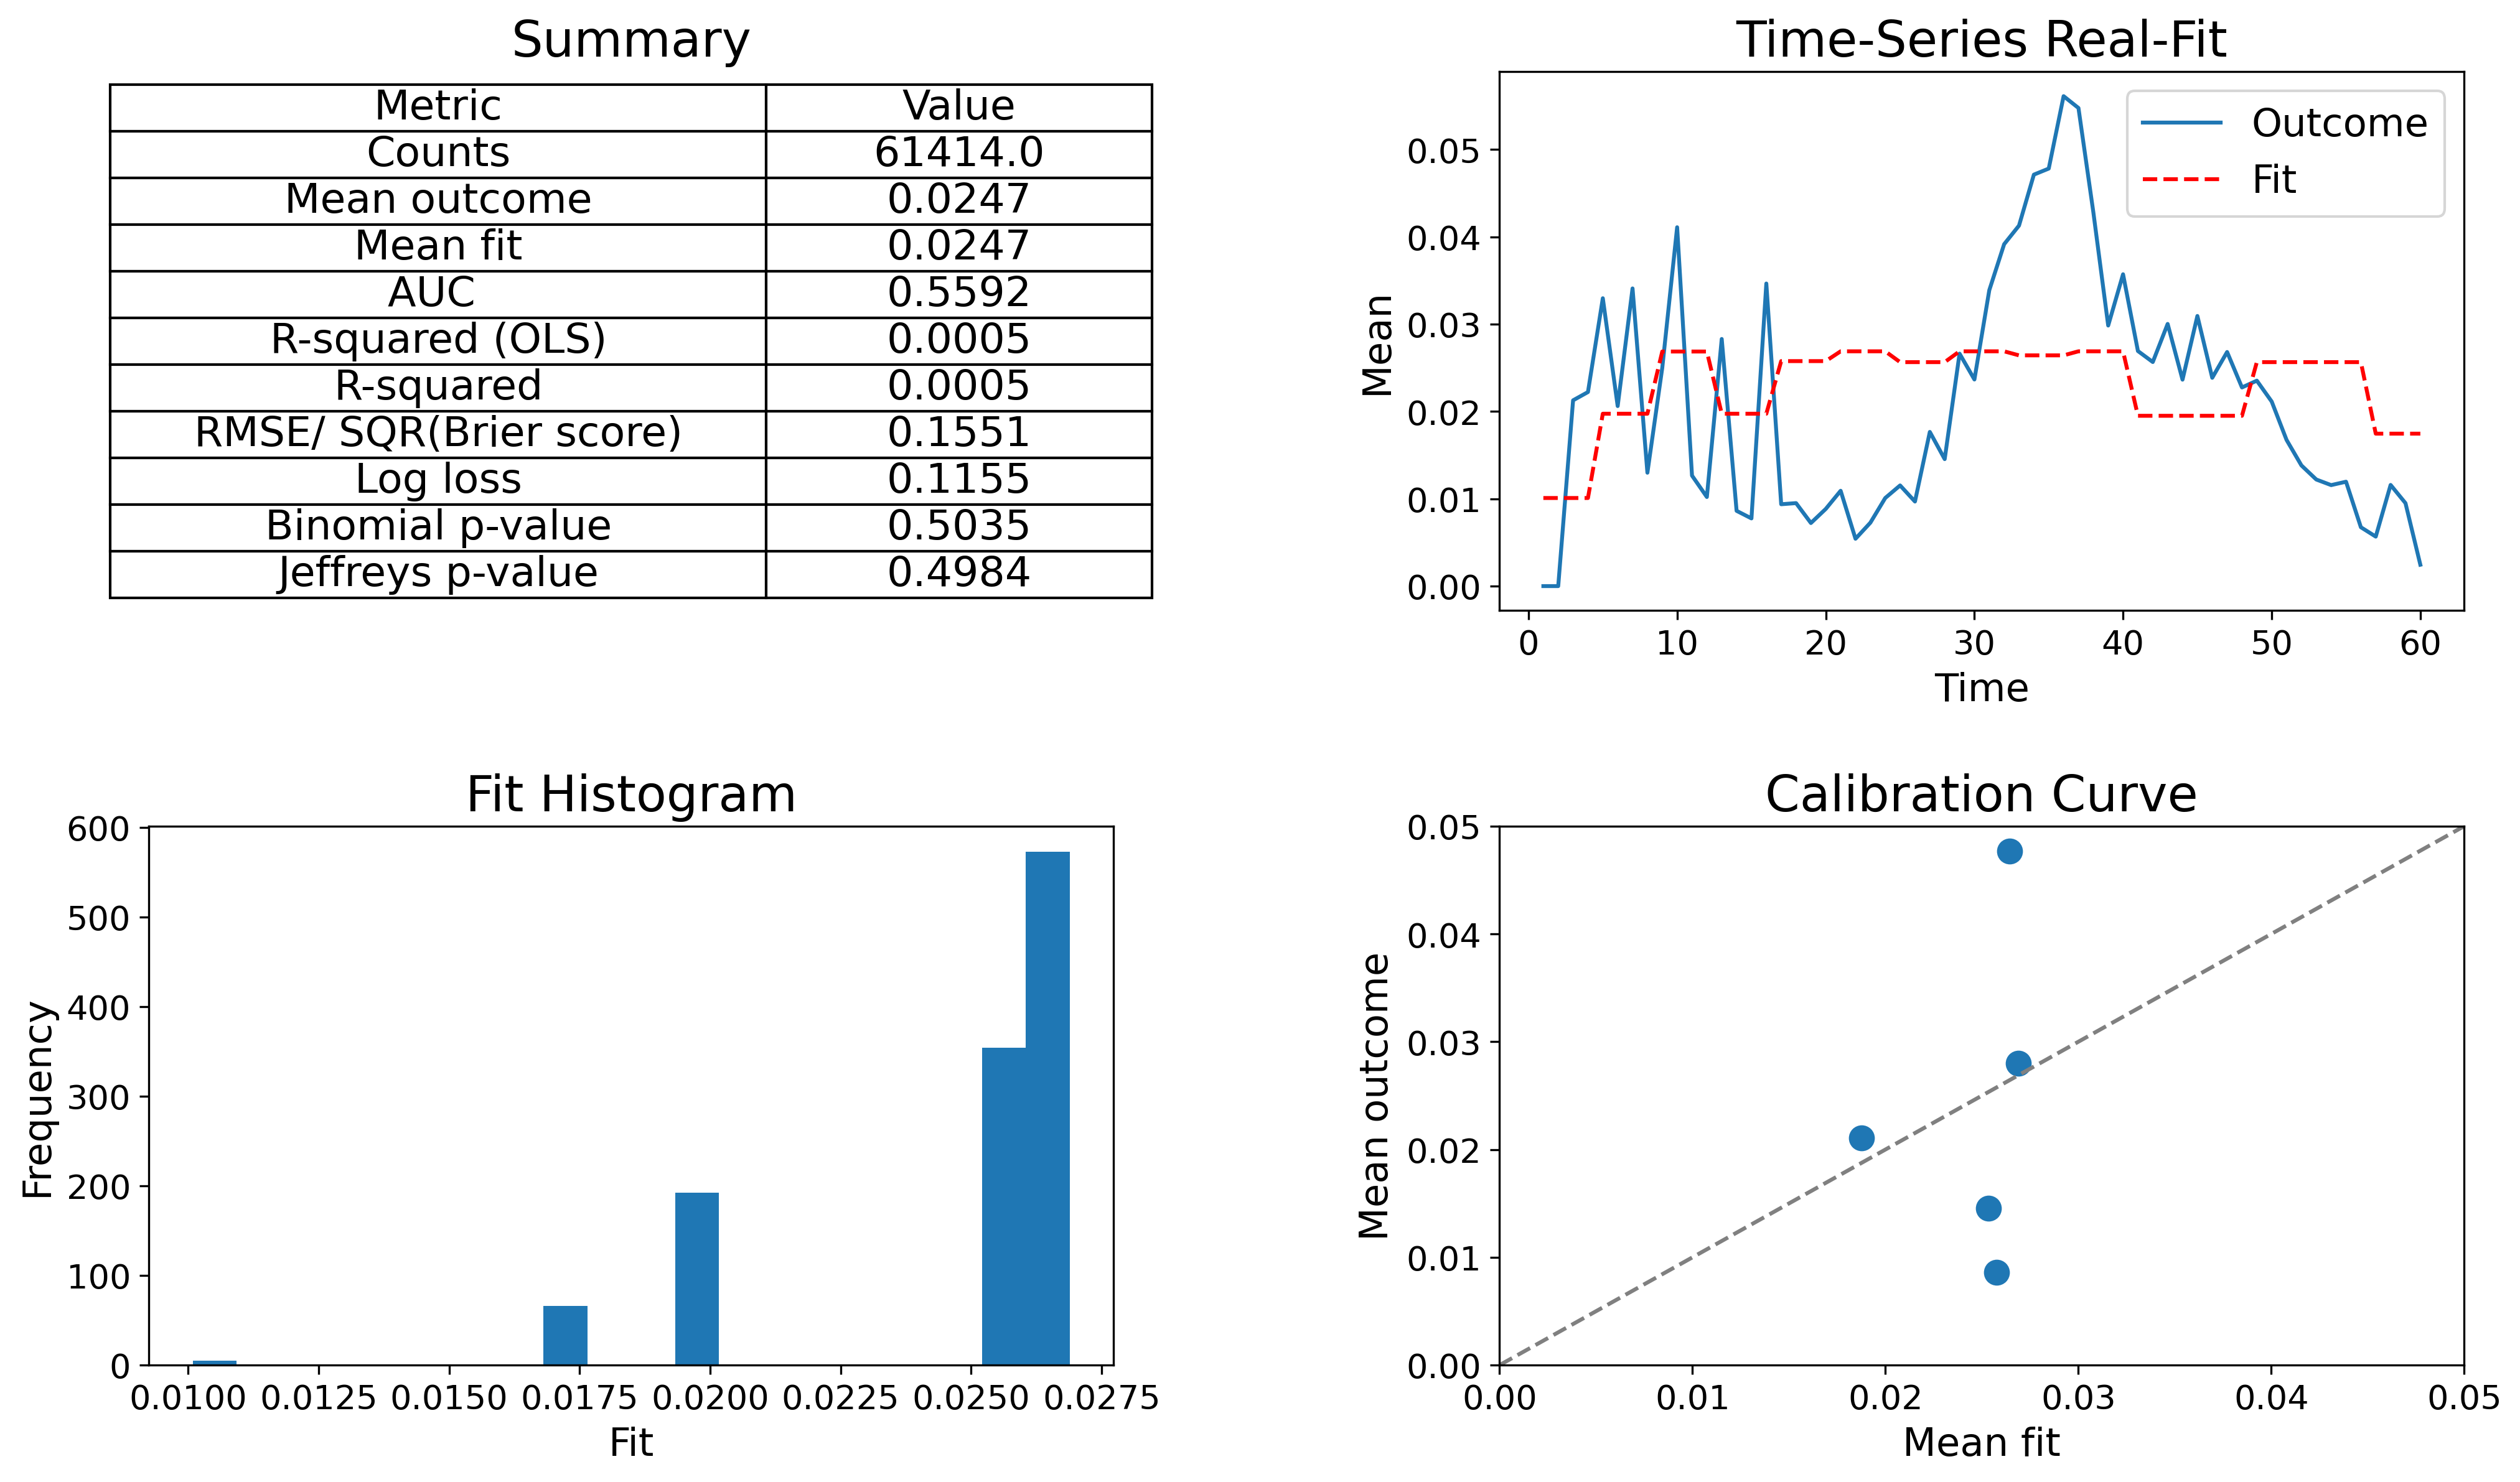

In [156]:
validation(data11.PD_temp, data11.default_time, data11.time)

After validating the results and the model’s ability to predict PD as a result of temperature change, we can conclude that even after showing some significance (AUC =0.5592) there is still plenty of room for improvement as in many cases it under or over-predicts the results of PD.

**4.** Now we predict the future PD for the loan for borrower (22838) from 2015 to 2045.

In [157]:
pd_temp2 = pd.DataFrame(model_temp1.predict(data_lifetime3), columns=['PD_temp2'])

data_lifetime3=pd.merge(data_lifetime3, pd_temp2, right_index=True, left_index=True)

### Borrower 22838 PD prediction from 2015 - 2045 

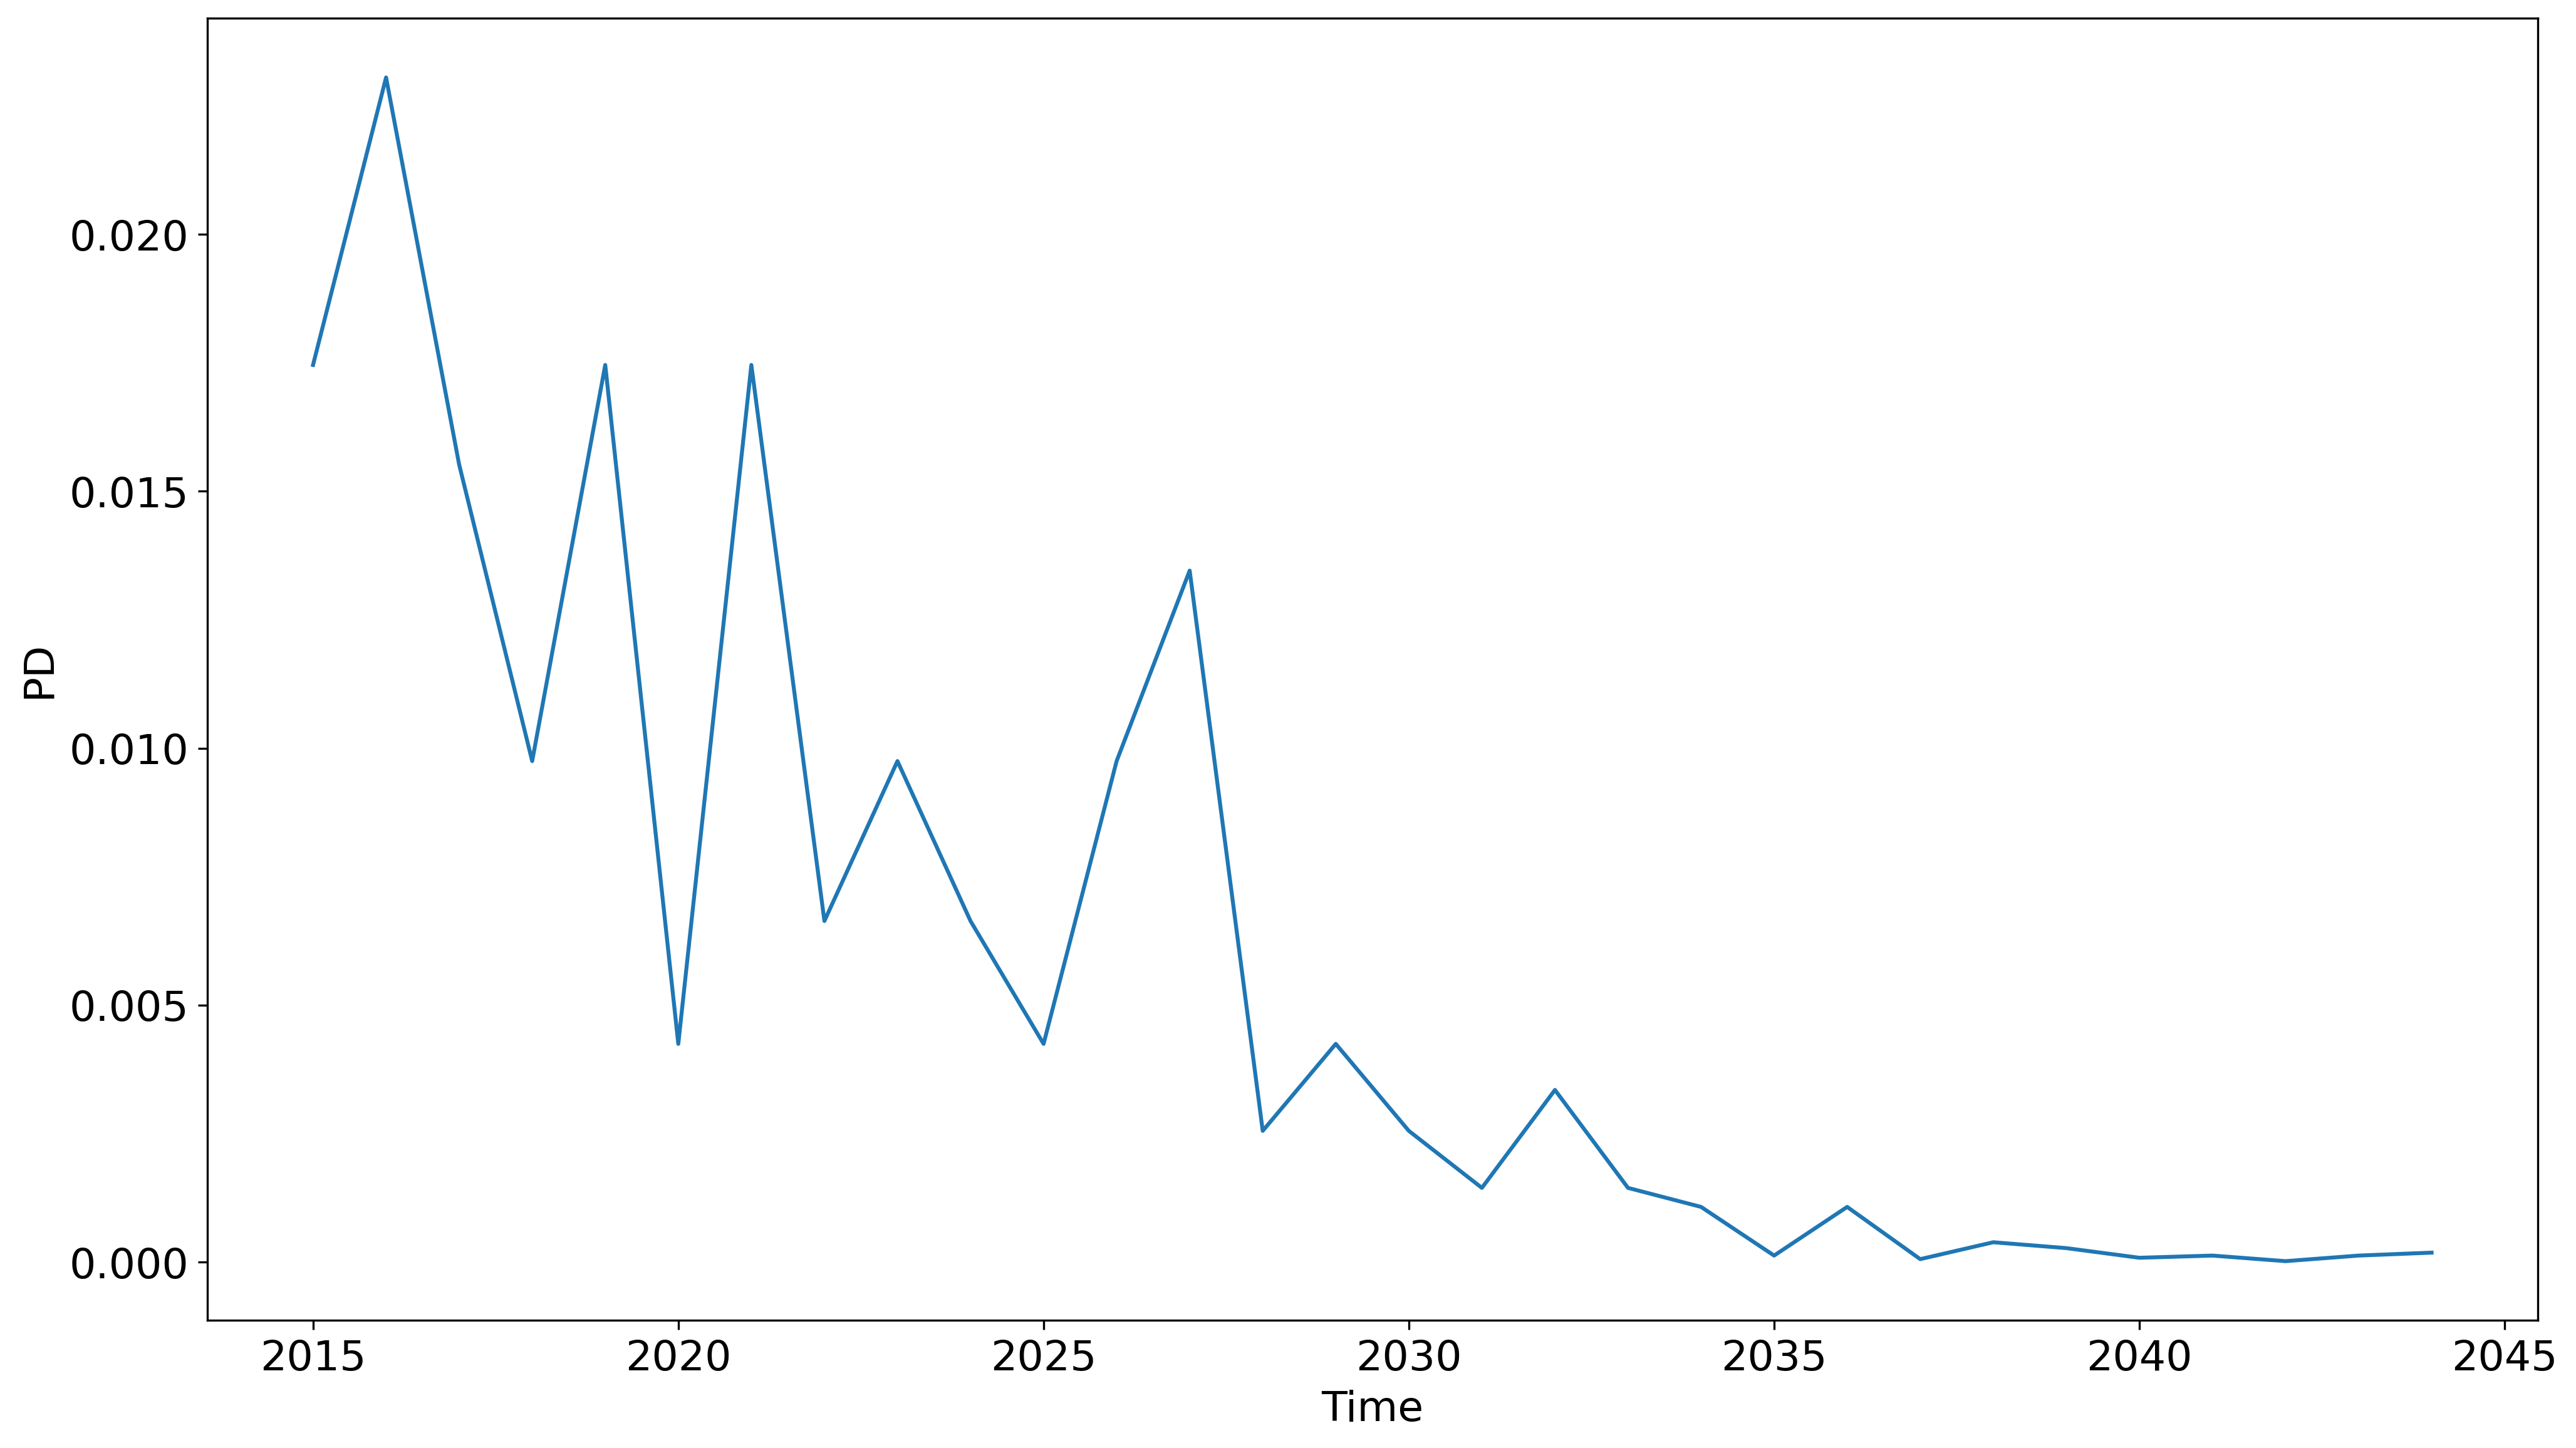

In [158]:
plt.plot('time_year', 'PD_temp2', data=data_lifetime3)
plt.ylabel('PD')
plt.xlabel('Time')
plt.show()

As we mentioned before in 5A, the model developed to predict the impact of climate change on income using average max temperatures does not transfer the risk associated with a worsening climate condition into the people's income growth. This can be seen in the graph above, assuming the government do not make any major economic transformation to cope with the rise of temperatures, it is expected that the economy to keep growing and PD levels will be similar behaviour in the next years (if temperature is taken is the only predictor variable.

### Time-varying model LGD

**1.** First we filter down loan that defaul time is 1, which mean that have defualt.

In [160]:
Climate2 = data11.query('default_time==1')

In [162]:
Climate2

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
10      5910    28         21          23       141      42.0      91304.53   
36     44583    26         25          25       143      32.0      96937.51   
45      2097    27         19          22       140      31.0      91587.79   
76      5805    27         19          22       139      37.0     200000.00   
129    13428    26         18          22       138      28.0      99899.33   
...      ...   ...        ...         ...       ...       ...           ...   
61247   8762    12          7           9       128      20.0      91900.37   
61308   8146     9          3           3       119      14.0      91119.55   
61318   8556    10          6           6       123      17.0      79599.28   
61341   8401    10          3           3       121      14.0     115842.28   
61355   8693    11          7          10       128      23.0     183257.89   

        LTV_time  interest_rate_time  rate_time  ...  status_time  lgd_time  \
10     75.161401                7.75       3.94  ...            1  0.629607   
36     80.205740                6.55       5.15  ...            1  0.343072   
45     76.537172                7.50       4.24  ...            1  0.593024   
76     68.859211                7.19       4.24  ...            1  1.265595   
129    70.590975                8.00       4.14  ...            1  0.046777   
...          ...                 ...        ...  ...          ...       ...   
61247  60.361081                7.49       5.07  ...            1  0.000000   
61308  67.775365               10.75       5.12  ...            1  0.812312   
61318  70.566697               12.80       4.60  ...            1  0.000000   
61341  77.217316               11.94       5.12  ...            1  0.040967   
61355  77.927341                7.75       5.07  ...            1  0.000000   

       recovery_res  time_year  Income_Growth  FICO_orig_time_S  \
10         33818.55       2007         -0.001         -0.912719   
36         63680.93       2007         -0.001         -1.149489   
45         37273.99       2007         -0.014         -1.567319   
76        -53118.93       2007         -0.014          0.410410   
129        95226.36       2007         -0.014         -0.648093   
...             ...        ...            ...               ...   
61247      91900.37       2003          0.039         -1.497681   
61308      17102.01       2003         -0.010         -1.929439   
61318      79599.28       2003          0.057         -2.987942   
61341     111096.56       2003          0.034         -0.731659   
61355     183257.89       2003         -0.033         -0.829153   

       LTV_orig_time_S  Temp_change   temp2   PD_temp  
10            0.127635         0.67  0.4489  0.025650  
36            0.127635         0.67  0.4489  0.025650  
45            1.104648         0.67  0.4489  0.025650  
76            0.127635         0.67  0.4489  0.025650  
129           0.625912         0.67  0.4489  0.025650  
...                ...          ...     ...       ...  
61247        -0.732136         0.40  0.1600  0.026866  
61308         0.127635         0.40  0.1600  0.026866  
61318         0.127635         0.40  0.1600  0.026866  
61341         1.593155         0.40  0.1600  0.026866  
61355         1.104648         0.40  0.1600  0.026866  

[1516 rows x 35 columns]

**2.** Now we build the LGD model

In [163]:
# Resolution bias
Climate2 = resolutionbias(Climate2, 'lgd_time', 'res_time', 'time')

In [164]:
#drop nan
climate_clean = Climate2[['lgd_time', 'Temp_change', 'temp2', 'gdp_time']].dropna()

In [180]:
#LGD linear regression model
model_temp2 = smf.ols(formula='lgd_time~Temp_change', data=climate_clean).fit()


In [181]:
model_temp2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lgd_time   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     16.90
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           4.15e-05
Time:                        14:51:06   Log-Likelihood:                -405.34
No. Observations:                1516   AIC:                             814.7
Df Residuals:                    1514   BIC:                             825.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5909      0.014     41.330      0.000       0.563       0.619
Temp_change     0.0890      0.022      4.111      0.000       0.047       0.131
==============================================================================
Omnibus:                       14.497   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.441
Skew:                          -0.198   Prob(JB):                     0.000444
Kurtosis:                       3.297   Cond. No.                         3.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
fitted_temp2 = pd.DataFrame(model_temp2.predict(climate_copy1),columns=['LGD_temp'])
data12 = pd.merge(data11,fitted_temp2, right_index=True, left_index=True)

**3.** Finnaly, we predict the future values for the borrower for periods (2015-2045).

In [184]:
lgd_temp2 = pd.DataFrame(model_temp2.predict(data_lifetime3), columns=['LGD_temp2'])

data_lifetime4=pd.merge(data_lifetime3, lgd_temp2, right_index=True, left_index=True)

In [185]:
data_lifetime4

id  time  orig_time  first_time  mat_time  res_time  balance_time_0  \
0    22838    61         20          22       180       NaN       406550.75   
1    22838    62         20          22       180       NaN       406550.75   
2    22838    63         20          22       180       NaN       406550.75   
3    22838    64         20          22       180       NaN       406550.75   
4    22838    65         20          22       180       NaN       406550.75   
..     ...   ...        ...         ...       ...       ...             ...   
115  22838   176         20          22       180       NaN       406550.75   
116  22838   177         20          22       180       NaN       406550.75   
117  22838   178         20          22       180       NaN       406550.75   
118  22838   179         20          22       180       NaN       406550.75   
119  22838   180         20          22       180       NaN       406550.75   

      LTV_time  interest_rate_time  rate_time  ...  TTM_0  time_tmp  age  \
0    65.655748               3.816        4.5  ...    120         1   41   
1    65.655748               3.816        4.5  ...    120         2   42   
2    65.655748               3.816        4.5  ...    120         3   43   
3    65.655748               3.816        4.5  ...    120         4   44   
4    65.655748               3.816        4.5  ...    120         5   45   
..         ...                 ...        ...  ...    ...       ...  ...   
115  65.655748               3.816        4.5  ...    120       116  156   
116  65.655748               3.816        4.5  ...    120       117  157   
117  65.655748               3.816        4.5  ...    120       118  158   
118  65.655748               3.816        4.5  ...    120       119  159   
119  65.655748               3.816        4.5  ...    120       120  160   

      age2  TTM  time_year  Temp_change    temp2  PD_temp2  LGD_temp2  
0     1681  119       2015         1.35   1.8225  0.017460   0.711022  
1     1764  118       2015         1.35   1.8225  0.017460   0.711022  
2     1849  117       2015         1.35   1.8225  0.017460   0.711022  
3     1936  116       2015         1.35   1.8225  0.017460   0.711022  
4     2025  115       2016         0.94   0.8836  0.023057   0.674538  
..     ...  ...        ...          ...      ...       ...        ...  
115  24336    4       2043         3.91  15.2881  0.000121   0.938828  
116  24649    3       2044         3.78  14.2884  0.000179   0.927260  
117  24964    2       2044         3.78  14.2884  0.000179   0.927260  
118  25281    1       2044         3.78  14.2884  0.000179   0.927260  
119  25600    0       2044         3.78  14.2884  0.000179   0.927260  

[120 rows x 41 columns]

### Borrower 22838 LGD prediction from 2015 - 2045 

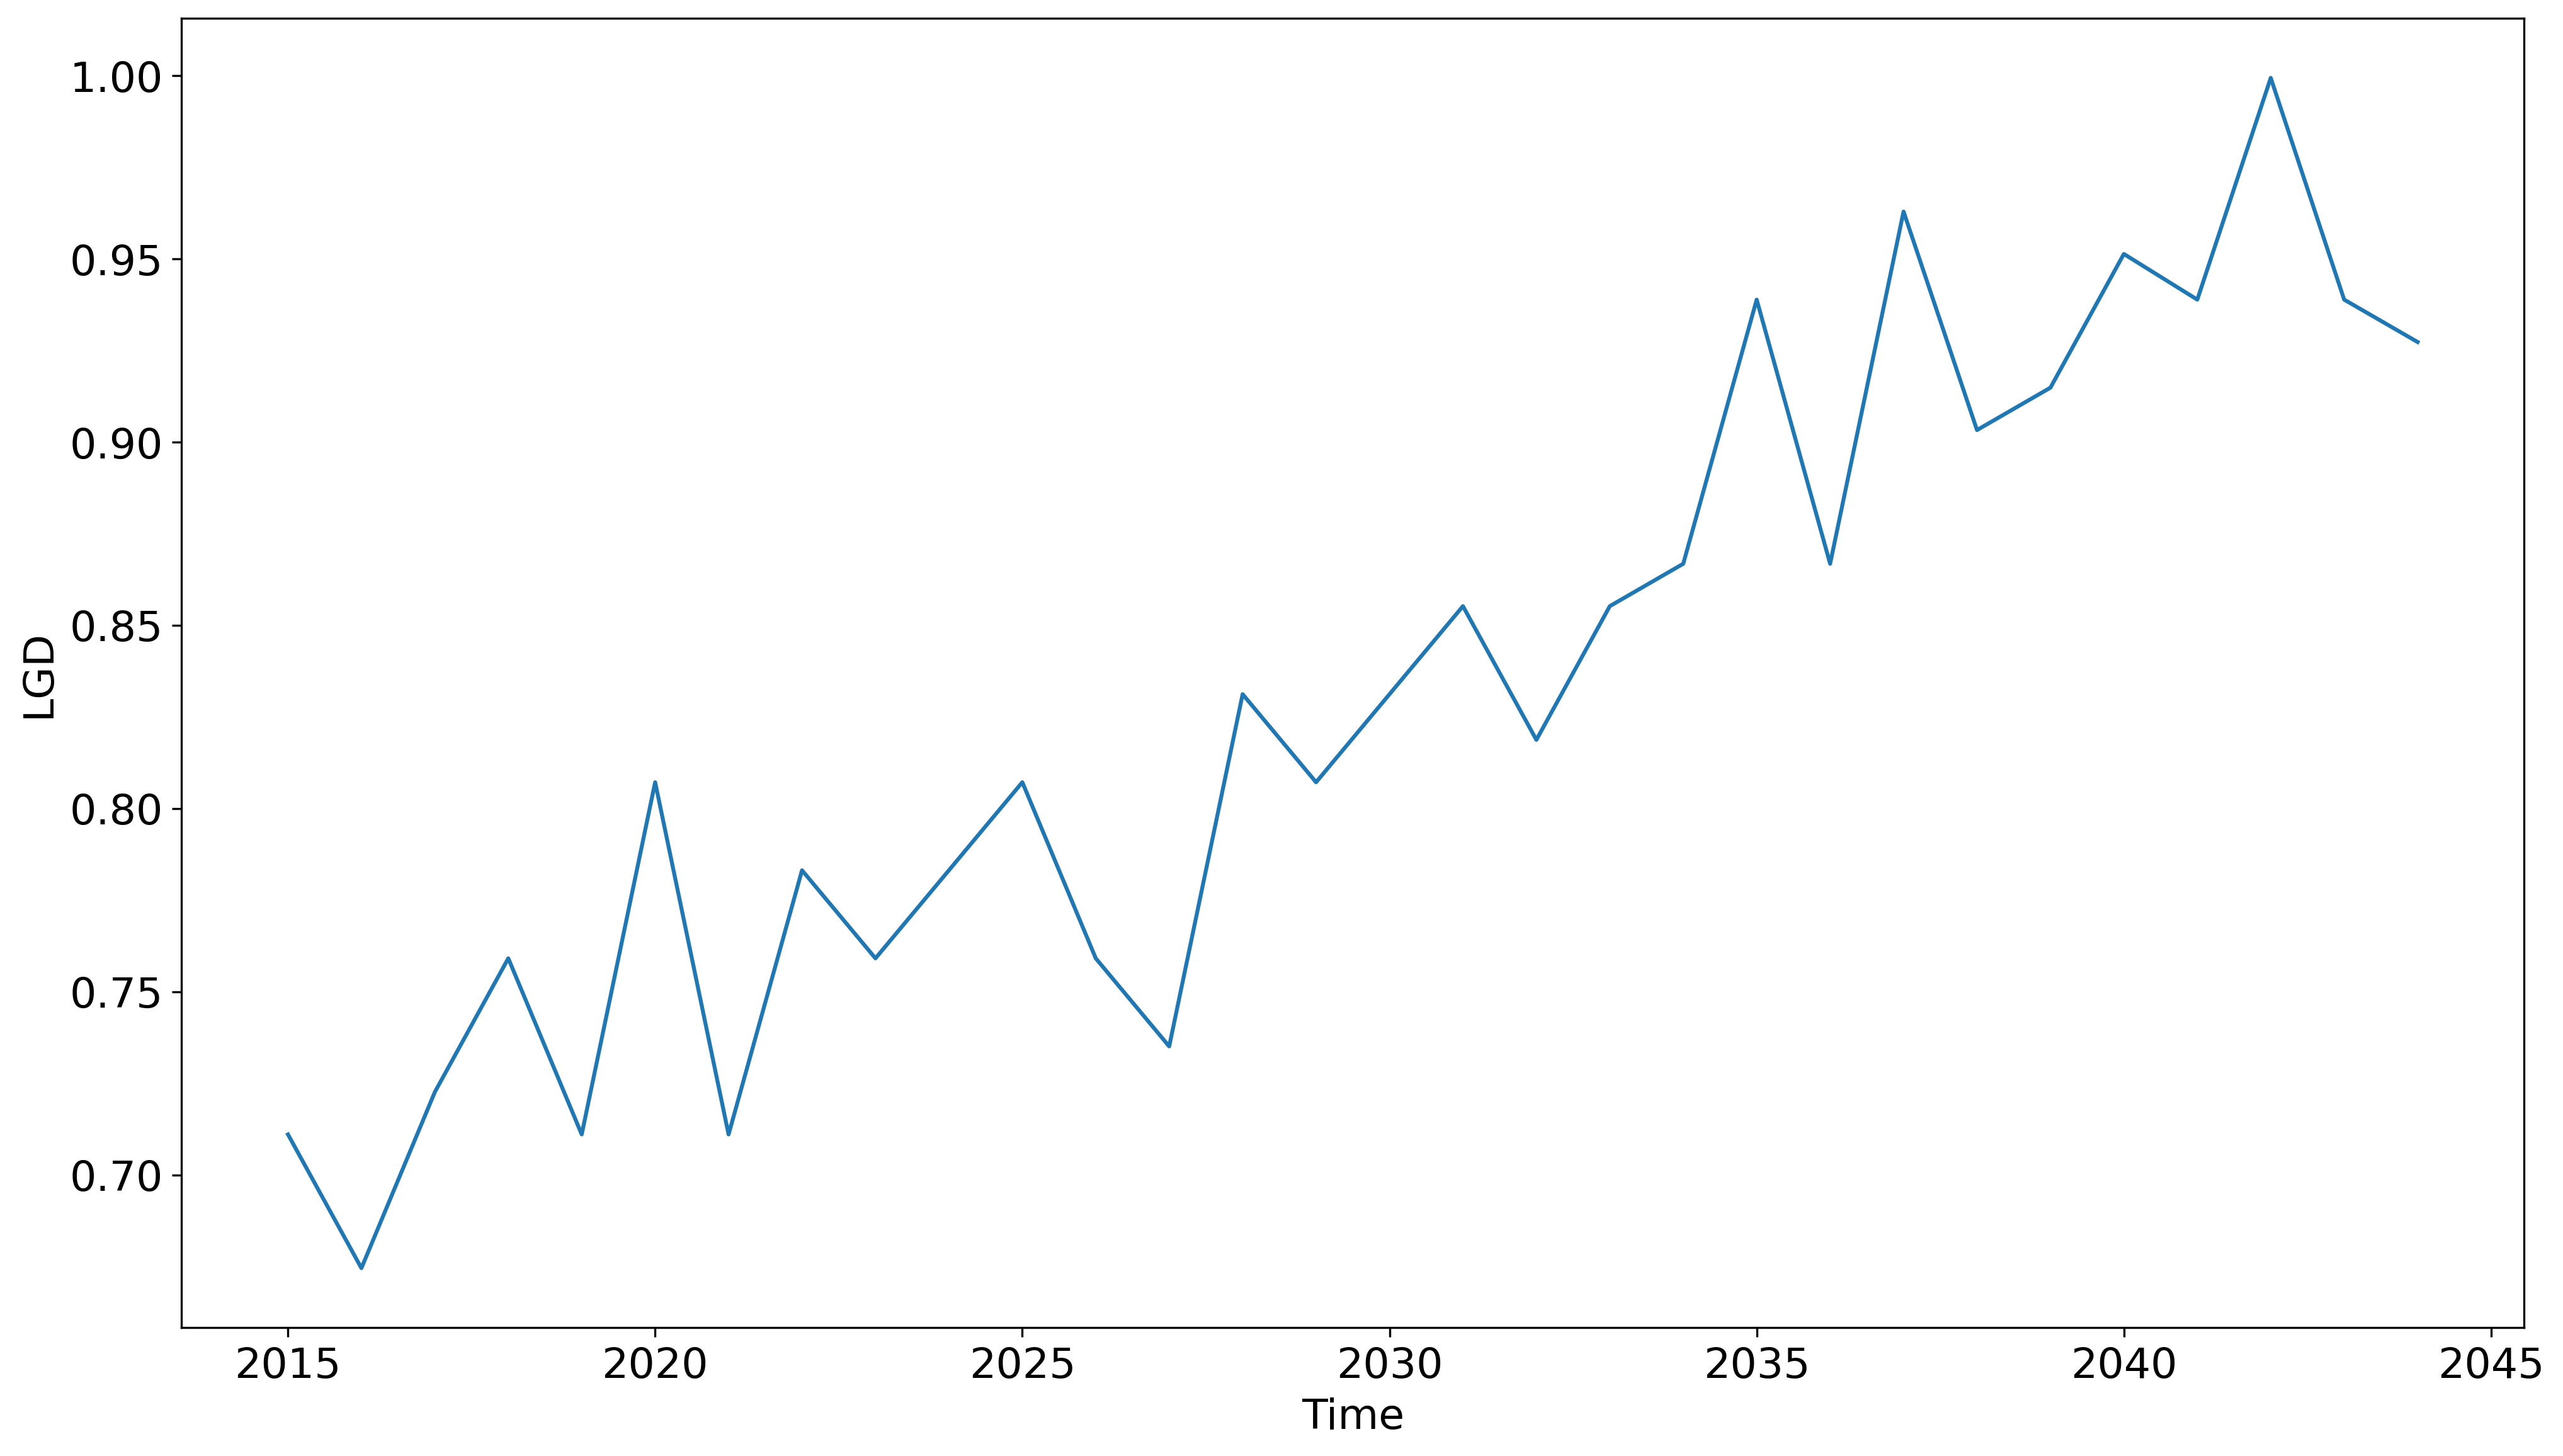

In [186]:
plt.plot('time_year', 'LGD_temp2', data=data_lifetime4)
plt.ylabel('LGD')
plt.xlabel('Time')
plt.show()

If we consider Temperatures as our only variable for predicting LGD, as a result, we get that LGD level would increase throughout the period 2015 and 2045. However, these results do not necessarily show the impact of rising temperatures on people's income or ability to repay loans. Instead, the increase in LGD levels can be explained in part by a growing economy - growing income growth and as discussed before a larger number of risk loans approved by the banks.

**Conclusion**
In conclusion, we can determine that predictor variables chosen 'avg max temperature change' do not transmit the potential impact of climate change on the people's economy. As discussed above, further investigation would be necessary to determine variables that transmit that risk into measurable terms, such as income inequality. It reveals the actual gap that exists between the high and low-income populations as a result of climate change and the potential challenges that this could bring to the banking industry.
